In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import itertools
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

import calendar
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scipy import signal
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from scipy.stats import boxcox
from scipy.stats import yeojohnson
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lars
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## Data Gathering

In [ ]:
#df = pd.read_excel('/content/drive/MyDrive/Data Science/TechPet /Notebooks/CBMPROD072921 (1).xlsx')

In [ ]:
#df = pd.read_excel('/content/drive/MyDrive/TechPet/Project 1/CBMPROD072921.xlsx')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Tech Pet/Data/CBMPROD072921.xlsx')

## Data Assessment

In [ ]:
# View first 5 rows of the data
df.head(5)

Autonum   APINO   RC  FORMATION    YR  JAN_GAS  JAN_WATER  JAN_DAYS  \
0        1  525109  421        NaN  1988        0          0         0   
1        2  525109  421        NaN  1989        0          0         0   
2        3  525109  421        NaN  1990        0          0         0   
3        4  525109  421        NaN  1991        0          0         0   
4        5  525109  421        NaN  1992        0          0         0   

   FEB_GAS  FEB_WATER  ...  NOV_GAS  NOV_WATER  NOV_DAYS  DEC_GAS  DEC_WATER  \
0        0          0  ...        0          0         0        0          0   
1        0          0  ...        0          0         0        0          0   
2        0          0  ...        0          0         0        0          0   
3        0          0  ...        0          0         0        0          0   
4        0          0  ...        0          0         0        0          0   

   DEC_DAYS  cumgas  cumwater  hold1  hold2  
0         0       0         0    NaN    NaN  
1         0       0         0    NaN    NaN  
2         0       0         0    NaN    NaN  
3         0       0         0    NaN    NaN  
4         0       0         0    NaN    NaN  

[5 rows x 45 columns]

In [ ]:
# View last 5 rows of the data
df.tail(5)

Autonum   APINO   RC  FORMATION    YR  JAN_GAS  JAN_WATER  JAN_DAYS  \
411600   411601  559796  123        NaN  2021        0          0        99   
411601   411602  559768  123        NaN  2021        0          0        99   
411602   411603  558634  123        NaN  2021        0          0        99   
411603   411604  552880  955        NaN  2021        0          0        99   
411604   411605  552881  955        NaN  2021        0          0        99   

        FEB_GAS  FEB_WATER  ...  NOV_GAS  NOV_WATER  NOV_DAYS  DEC_GAS  \
411600        0          0  ...        0          0        99        0   
411601        0          0  ...        0          0        99        0   
411602        0          0  ...        0          0        99        0   
411603        0          0  ...        0          0        99        0   
411604        0          0  ...        0          0        99        0   

        DEC_WATER  DEC_DAYS  cumgas  cumwater  hold1  hold2  
411600          0        99       0         0    NaN    NaN  
411601          0        99       0         0    NaN    NaN  
411602          0        99       0         0    NaN    NaN  
411603          0        99     503      3460    NaN    NaN  
411604          0        99       0         0    NaN    NaN  

[5 rows x 45 columns]

In [ ]:
# View 5 sample rows of the data
df.sample(5)

Autonum    APINO   RC  FORMATION    YR  JAN_GAS  JAN_WATER  JAN_DAYS  \
336336   336337  1926750  910        NaN  2015        0          0         0   
37655     37656   542546  910        NaN  2002        0          0        99   
238703   238704   553013  910        NaN  2011      444       2226        31   
260637   260638  3322232  345        NaN  2012      114          0        31   
64681     64682   540220  910        NaN  2004        0          0         0   

        FEB_GAS  FEB_WATER  ...  NOV_GAS  NOV_WATER  NOV_DAYS  DEC_GAS  \
336336        0          0  ...        0          0         0        0   
37655         0          0  ...        0          0         0        0   
238703      470       3106  ...      575       2308        30      532   
260637      104          0  ...        0          0        99        0   
64681         0          0  ...        0          0         0        0   

        DEC_WATER  DEC_DAYS  cumgas  cumwater  hold1  hold2  
336336          0         0       0         0    NaN    NaN  
37655           0         0       0         0    NaN    NaN  
238703       2067        31    6496     32439    NaN    NaN  
260637          0        99     489         0    NaN    NaN  
64681           0        99       0         0    NaN    NaN  

[5 rows x 45 columns]

In [ ]:
# print shape of the data
df.shape

(411605, 45)

**Observation:**
The dataset has 411605 rows and 45 columns

In [ ]:
# view information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411605 entries, 0 to 411604
Data columns (total 45 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Autonum    411605 non-null  int64  
 1   APINO      411605 non-null  int64  
 2   RC         411605 non-null  int64  
 3   FORMATION  0 non-null       float64
 4   YR         411605 non-null  int64  
 5   JAN_GAS    411605 non-null  int64  
 6   JAN_WATER  411605 non-null  int64  
 7   JAN_DAYS   411605 non-null  int64  
 8   FEB_GAS    411605 non-null  int64  
 9   FEB_WATER  411605 non-null  int64  
 10  FEB_DAYS   411605 non-null  int64  
 11  MAR_GAS    411605 non-null  int64  
 12  MAR_WATER  411605 non-null  int64  
 13  MAR_DAYS   411605 non-null  int64  
 14  APR_GAS    411605 non-null  int64  
 15  APR_WATER  411605 non-null  int64  
 16  APR_DAYS   411605 non-null  int64  
 17  MAY_GAS    411605 non-null  int64  
 18  MAY_WATER  411605 non-null  int64  
 19  MAY_DAYS   411605 non-n

**Observation:**
The columns - FORMATION, hold1 and hold2 have no non-null values.

In [ ]:
# print the sum of unique values in each column of the data
df.nunique()

Autonum      411605
APINO         30536
RC              393
FORMATION         0
YR               44
JAN_GAS       18036
JAN_WATER     22848
JAN_DAYS         34
FEB_GAS       17030
FEB_WATER     21707
FEB_DAYS         33
MAR_GAS       17942
MAR_WATER     22875
MAR_DAYS         35
APR_GAS       17634
APR_WATER     22416
APR_DAYS         34
MAY_GAS       17965
MAY_WATER     23039
MAY_DAYS         34
JUN_GAS       17653
JUN_WATER     22281
JUN_DAYS         33
JUL_GAS       17938
JUL_WATER     22662
JUL_DAYS         34
AUG_GAS       18000
AUG_WATER     22883
AUG_DAYS         34
SEP_GAS       17537
SEP_WATER     22356
SEP_DAYS         34
OCT_GAS       17910
OCT_WATER     23004
OCT_DAYS         33
NOV_GAS       17620
NOV_WATER     22461
NOV_DAYS         33
DEC_GAS       18033
DEC_WATER     22848
DEC_DAYS         34
cumgas        73069
cumwater      90973
hold1             0
hold2             0
dtype: int64

In [ ]:
# print 5 sample rows of a subset (January) of the dataframe
df[['JAN_DAYS','JAN_GAS','JAN_WATER','YR']].sample(5)

JAN_DAYS  JAN_GAS  JAN_WATER    YR
362025        31     4368       2882  2017
331407        31        1          0  2015
53477         99        0          0  2003
200881         0        0          0  2009
258904         0        0          0  2012

In [ ]:
# print 5 sample rows of a subset (Days) of the dataframe
df[['JAN_DAYS','NOV_DAYS']].sample(5)

JAN_DAYS  NOV_DAYS
274160         0         0
404356        31        99
74247         30        30
93254         99        30
178030        31        30

**Observation:**
There are invalid days(like 99) in columns like JAN-DAYS AND NOV_DAYS.

In [ ]:
# Print description of the numerical columns in the data
df.describe()

Autonum         APINO             RC  FORMATION             YR  \
count  411605.000000  4.116050e+05  411605.000000        0.0  411605.000000   
mean   205803.000000  1.204551e+06     413.877506        NaN    2009.764626   
std    118820.273112  1.003534e+06     363.553381        NaN       5.471805   
min         1.000000  5.074170e+05       1.000000        NaN    1978.000000   
25%    102902.000000  5.414850e+05     123.000000        NaN    2006.000000   
50%    205803.000000  5.531210e+05     193.000000        NaN    2010.000000   
75%    308704.000000  1.924806e+06     910.000000        NaN    2014.000000   
max    411605.000000  4.121295e+06     997.000000        NaN    2021.000000   

             JAN_GAS      JAN_WATER       JAN_DAYS        FEB_GAS  \
count  411605.000000  411605.000000  411605.000000  411605.000000   
mean     1393.452271    1990.614152      23.043520    1267.292341   
std      4238.483216    5693.563413      25.471708    3718.196025   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000      31.000000       0.000000   
75%      1144.000000    1404.000000      31.000000    1041.000000   
max    759234.000000  851952.000000      99.000000  236273.000000   

           FEB_WATER  ...        NOV_GAS      NOV_WATER       NOV_DAYS  \
count  411605.000000  ...  411605.000000  411605.000000  411605.000000   
mean     1844.107698  ...    1349.641314    1948.012087      23.897394   
std      5296.442624  ...    3896.434475    5745.334505      26.792551   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%         0.000000  ...       0.000000       0.000000       0.000000   
50%         0.000000  ...       0.000000       0.000000      30.000000   
75%      1314.000000  ...    1128.000000    1381.000000      30.000000   
max    518595.000000  ...  303135.000000  683683.000000      99.000000   

             DEC_GAS      DEC_WATER       DEC_DAYS        cumgas  \
count  411605.000000  411605.000000  411605.000000  4.116050e+05   
mean     1394.711187    1985.403615      24.238496  1.632541e+04   
std      4064.432675    5554.105398      26.696623  4.425819e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%         0.000000       0.000000       0.000000  0.000000e+00   
50%         0.000000       0.000000      31.000000  9.850000e+02   
75%      1148.000000    1403.000000      31.000000  1.434200e+04   
max    319101.000000  608347.000000      99.000000  3.126027e+06   

           cumwater  hold1  hold2  
count  4.116050e+05    0.0    0.0  
mean   2.364209e+04    NaN    NaN  
std    5.657665e+04    NaN    NaN  
min    0.000000e+00    NaN    NaN  
25%    0.000000e+00    NaN    NaN  
50%    2.530000e+02    NaN    NaN  
75%    2.341500e+04    NaN    NaN  
max    3.750893e+06    NaN    NaN  

[8 rows x 45 columns]

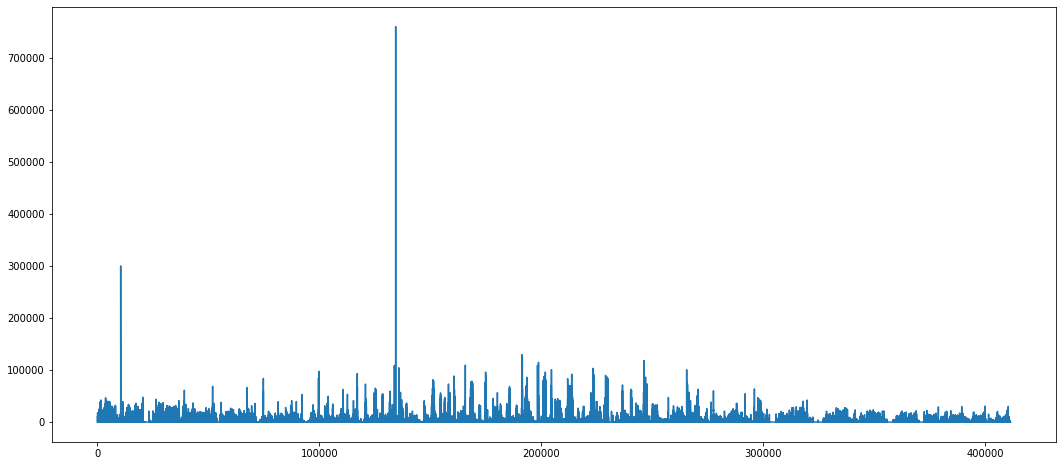

In [ ]:
df['JAN_GAS'].plot();

### Quality Issues
1. Formation, hold1 and hold2 has no null value.
2. Invalid days(like 99) in columns like Jan_Days, Nov_Days e.t.c
3. Presence of Outlier in the amount of Gas and Water Used for some months like January and February.

### Tidiness Issue
1. Change data from wide to long. Create a dataframe with a date column to using the year, month and day for each entry.

## Data Cleaning

In [ ]:
def wrangle_data(df):
    
    # Create a new dataframe
    data = pd.DataFrame()
    
    # copy old dataframe to a new dataframe
    original_df = df.copy()
    
    # create a dictionary for the months and the no of days
    months = {'JAN': 31, 'FEB': 28, 'MAR': 31, 'APR': 30, 'MAY': 31, 'JUN': 30, 'JUL': 31, 'AUG': 31, 'SEP': 30, 'OCT': 31, 'NOV': 30, 'DEC': 31}
    
    # store the column names in columns
    columns = original_df.columns 
    
    for month in list(months):
        if month is not 'FEB':
            month_specific_column = [column for column in columns if month in column]
            month_df = original_df[month_specific_column]
            
            # rename the columns in the month dataframe
            month_df_1 = month_df.rename(columns = {month_df.columns[0]: 'Gas', month_df.columns[1]: 'Water', month_df.columns[2]: 'Day'})

            month_df_1[['cumgas', 'cumwater', 'APINO', 'RC', 'YR']] = original_df[['cumgas', 'cumwater', 'APINO', 'RC', 'YR']] 

            # add a month column to the dataframe  
            month_df_1['Month'] = list(months).index(month) + 1
            
            # drop the rows with odd values in the dataframe (i.e. rows with invalid days)
            odd_rows = month_df_1.index[(month_df_1['Day'] == 0) | (month_df_1['Day'] > months[month])].tolist()
            month_df_2 = month_df_1.drop(odd_rows, axis = 0)
            
            # create a date dataframe using the year, month and day columns
            month_df_2['Date'] = month_df_2[['YR', 'Month', 'Day']].apply(lambda x: '-'.join(x.values.astype(str)), axis = "columns")
            month_df_2['Date'] = pd.to_datetime(month_df_2['Date'])
            
            # drop Year, Month and Day column
            month_df_3 = month_df_2.drop(["YR", "Month", "Day"],axis = 1)
            
            # concatenate month dataframe to dataframe 
            data = pd.concat([data, month_df_3])
            
        else:
            month_specific_column = [column for column in columns if month in column]
            month_df = original_df[month_specific_column]
            
            # rename the columns in the month dataframe
            month_df_1 = month_df.rename(columns = {month_df.columns[0]: 'Gas', month_df.columns[1]: 'Water', month_df.columns[2]: 'Day'})
            month_df_1[['cumgas', 'cumwater', 'APINO', 'RC', 'YR']] = original_df[['cumgas', 'cumwater', 'APINO', 'RC', 'YR']] 
            
            # add a month column to the dataframe  
            month_df_1['Month'] = list(months).index(month) + 1
            
            # add a leap year column to the dataframe
            month_df_1["leap"] = month_df_1["YR"].apply(lambda year: True if ((year%4) == 0) else False)
            
            # subset the leap years from the new df
            leap_years = month_df_1[month_df_1["leap"] == True]
            
            # get odd rows for the leap years
            odd_rows_leap = leap_years.index[(leap_years['Day'] == 0) | (leap_years['Day'] > (months[month] + 1))].tolist()# subset the non leap years from the new df
            non_leap_years = month_df_1[month_df_1["leap"] == False]
            
            # get odd rows specially for the non leap years
            odd_rows_non_leap = non_leap_years.index[(non_leap_years['Day'] == 0) | (non_leap_years['Day'] > months[month])].tolist()
            month_df_2 = month_df_1.drop(odd_rows_leap, axis = 0)
            month_df_3 = month_df_2.drop(odd_rows_non_leap, axis = 0)
            month_df_3 = month_df_3.drop('leap', axis = 1)
        
            month_df_3['Date'] = month_df_3[['YR', 'Month', 'Day']].apply(lambda x: '-'.join(x.values.astype(str)), axis = "columns")
            month_df_3['Date'] = pd.to_datetime(month_df_3['Date'])

            # drop Year, Month and Day column
            month_df_4 = month_df_3.drop(["YR", "Month", "Day"],axis = 1)
        
            data = pd.concat([data, month_df_4])
    
    return data

In [ ]:
# drop columns without any values - FORMATION, hold1 and hold2

df_1 = df.copy()
df_1 = df_1.drop(["FORMATION", "hold1", "hold2"], axis = 1 )

data = wrangle_data(df_1)

In [ ]:
# view the first 5 rows of the data

data_1 = data[['Date', 'Gas', 'Water', 'cumgas', 'cumwater', 'APINO', 'RC']]
data_1.reset_index(inplace = True, drop = True)
data_1.head()

Date   Gas  Water  cumgas  cumwater   APINO   RC
0 1982-01-31  4617      0   48248         0  525641  421
1 1983-01-31  3895      0   44772         0  525641  421
2 1984-01-31  1451      0   29030         0  525641  421
3 1985-01-31  3283      0   23403         0  525641  421
4 1986-01-31   947      0    1800         0  525641  421

In [ ]:
data_1.shape

(2672708, 7)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# print the columns in the data
data_1.columns

Index(['Date', 'Gas', 'Water', 'cumgas', 'cumwater', 'APINO', 'RC'], dtype='object')

In [ ]:
data_1.shape

(2672708, 7)

In [ ]:
# print the sum of unique values in the columns in the dataset
data_1.nunique()

Date        10020
Gas         41268
Water       48037
cumgas      73069
cumwater    90972
APINO       28994
RC            350
dtype: int64

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672708 entries, 0 to 2672707
Data columns (total 7 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   Gas       int64         
 2   Water     int64         
 3   cumgas    int64         
 4   cumwater  int64         
 5   APINO     int64         
 6   RC        int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 142.7 MB


In [ ]:
data_1.isna().sum()

Date        0
Gas         0
Water       0
cumgas      0
cumwater    0
APINO       0
RC          0
dtype: int64

In [ ]:
data_1.duplicated().sum()

0

#### What's the distribution of the RC values?

In [ ]:
data_1.RC.describe()  

count    2.672708e+06
mean     3.846499e+02
std      3.561651e+02
min      1.600000e+01
25%      1.230000e+02
50%      1.930000e+02
75%      8.200000e+02
max      9.940000e+02
Name: RC, dtype: float64

In [ ]:
bins_rc = np.arange(10,101,10)
bins_rc

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [ ]:
# plt.hist(data=data_1,x='RC',bins=bins_rc)
# plt.xlabel('RC')
# plt.ylabel('Count')
# plt.title('Distribution of RC values');

In [ ]:
data_1['RC'].value_counts()

123    917244
955    432550
43     232049
193    171667
910     95197
        ...  
33          2
528         2
908         1
225         1
518         1
Name: RC, Length: 350, dtype: int64

##### From the plot above, the RC value is mostly approximately equal to 50.

#### What's the Distribution of the Cumulative Gas and Cumulative Water


In [ ]:
data_1['cumgas'].describe()

count    2.672708e+06
mean     2.911382e+04
std      5.650351e+04
min      0.000000e+00
25%      2.972000e+03
50%      1.144200e+04
75%      3.163200e+04
max      3.126027e+06
Name: cumgas, dtype: float64

Text(0.5, 1.0, 'Distribution of Cummulative Gas values')

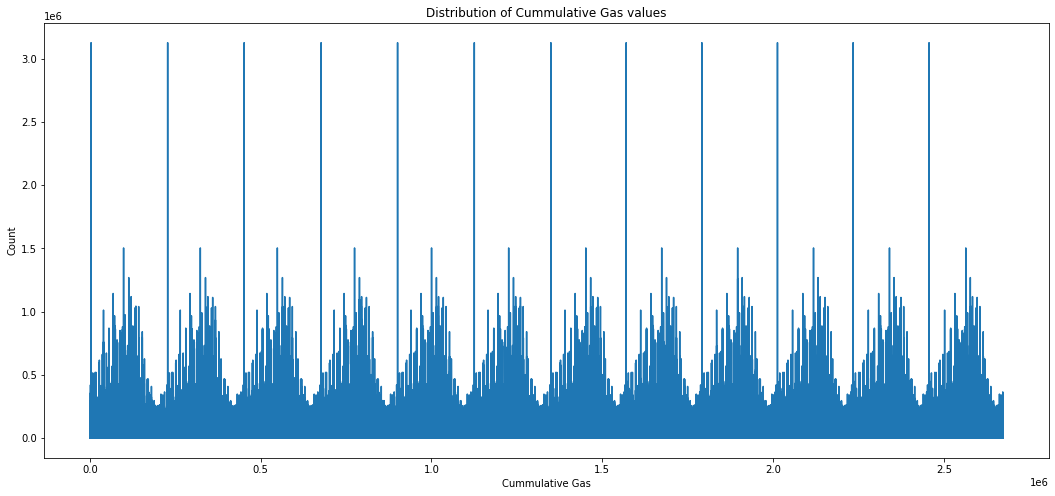

In [ ]:
data_1['cumgas'].plot()
plt.xlabel('Cummulative Gas')
plt.ylabel('Count')
plt.title('Distribution of Cummulative Gas values')

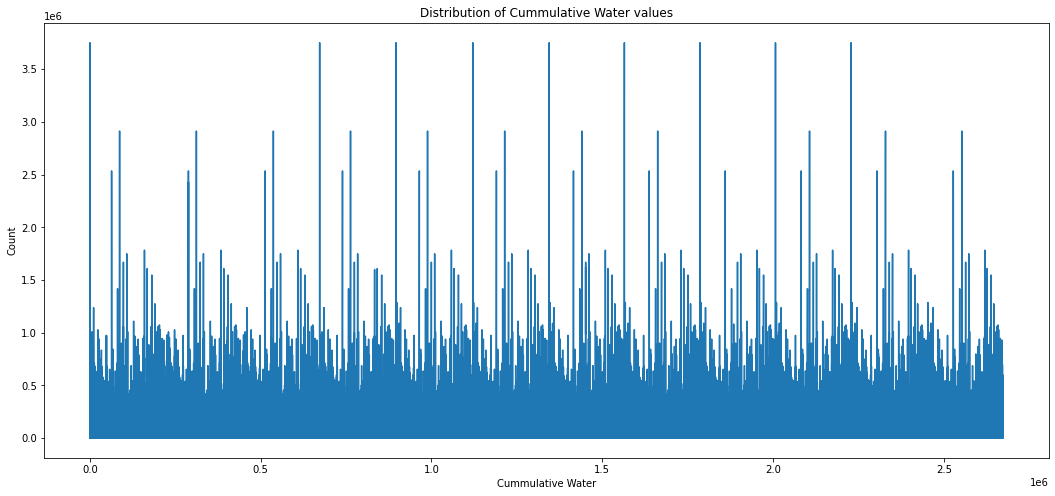

In [ ]:
data_1['cumwater'].plot()
plt.xlabel('Cummulative Water')
plt.ylabel('Count')
plt.title('Distribution of Cummulative Water values');

In [ ]:
dk = data_1.copy()
dk = dk.set_index(dk['Date'])
dk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2672708 entries, 1982-01-31 to 2020-12-12
Data columns (total 7 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   Gas       int64         
 2   Water     int64         
 3   cumgas    int64         
 4   cumwater  int64         
 5   APINO     int64         
 6   RC        int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 163.1 MB


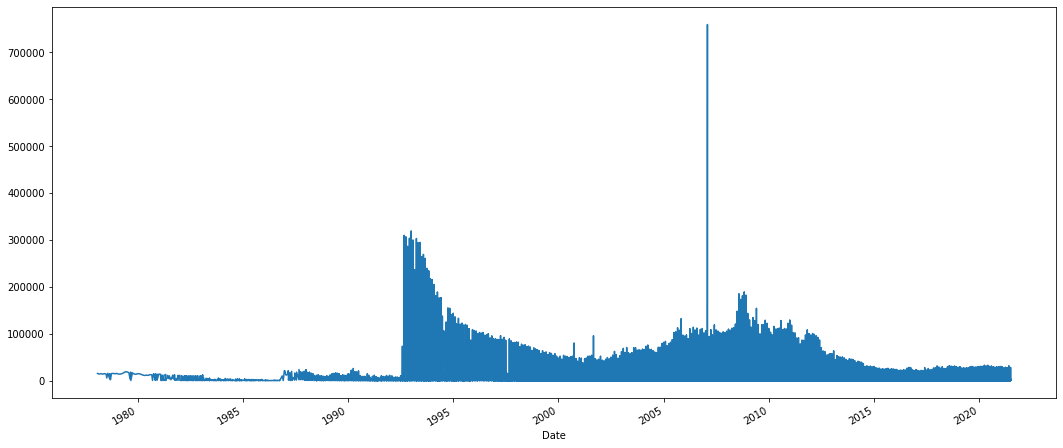

In [ ]:
dk['Gas'].plot()

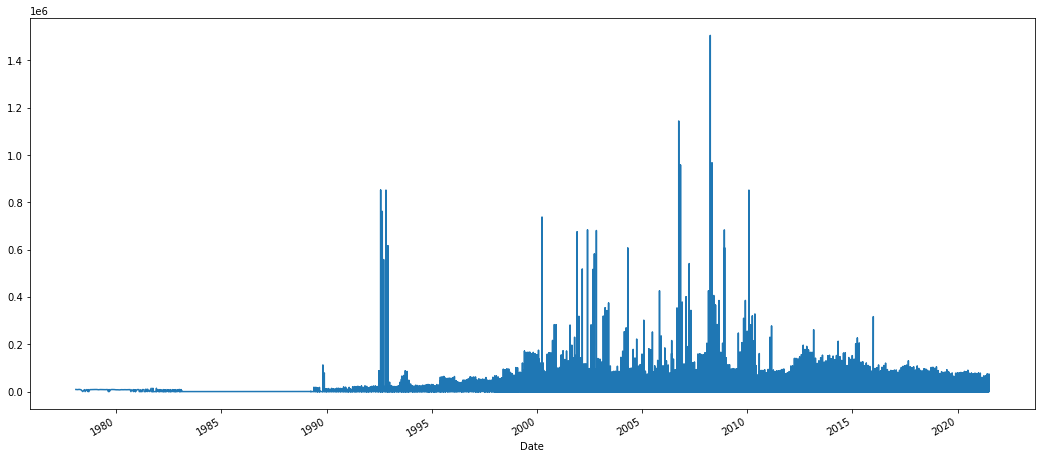

In [ ]:
dk['Water'].plot()

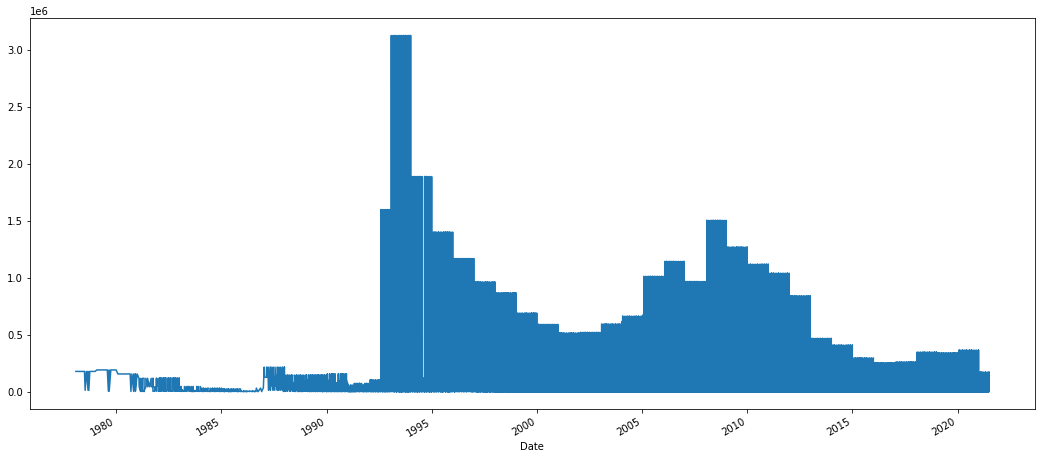

In [ ]:
dk['cumgas'].plot()

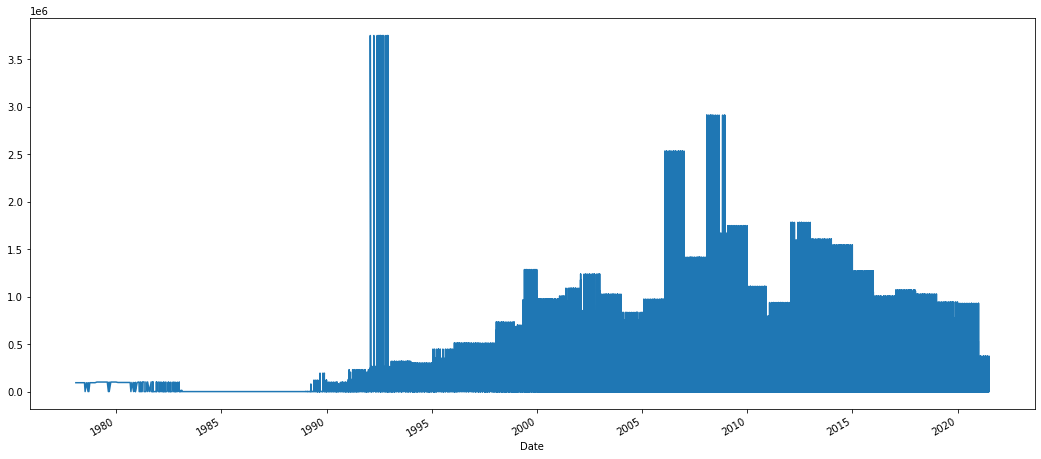

In [ ]:
dk['cumwater'].plot()

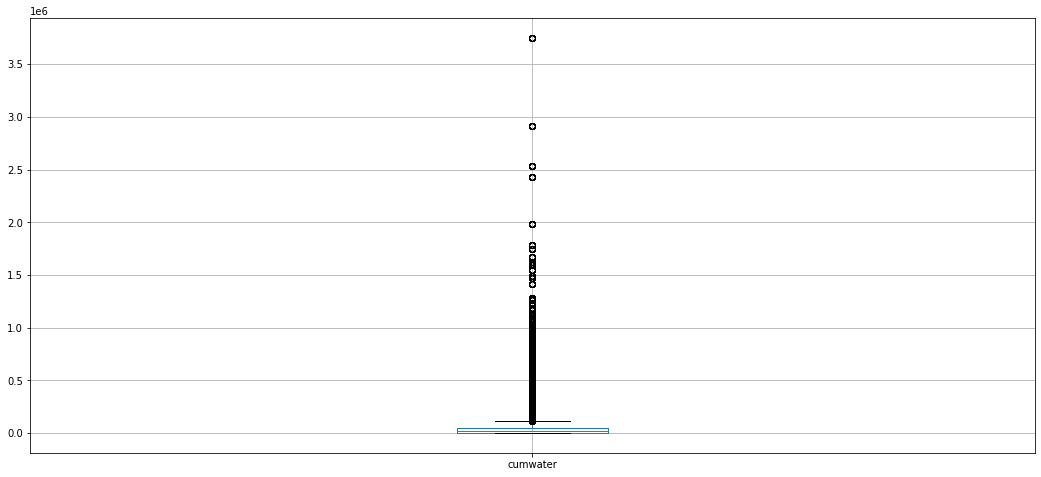

In [ ]:
data[['cumwater']].boxplot()

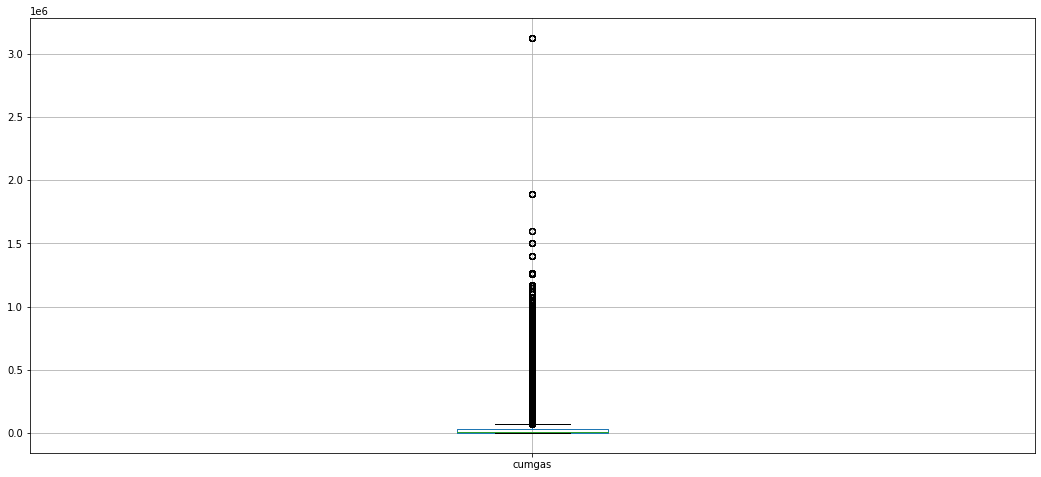

In [ ]:
data[['cumgas']].boxplot()

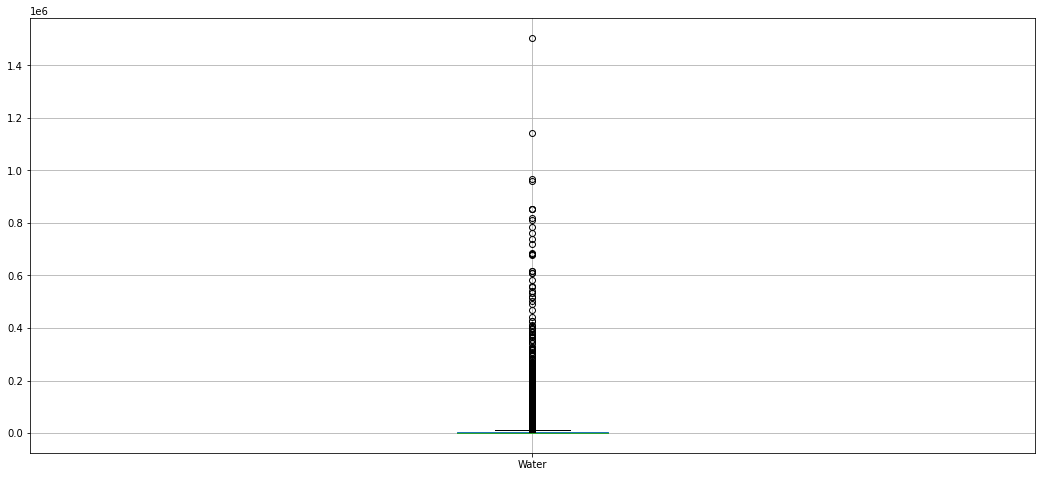

In [ ]:
data[['Water']].boxplot()

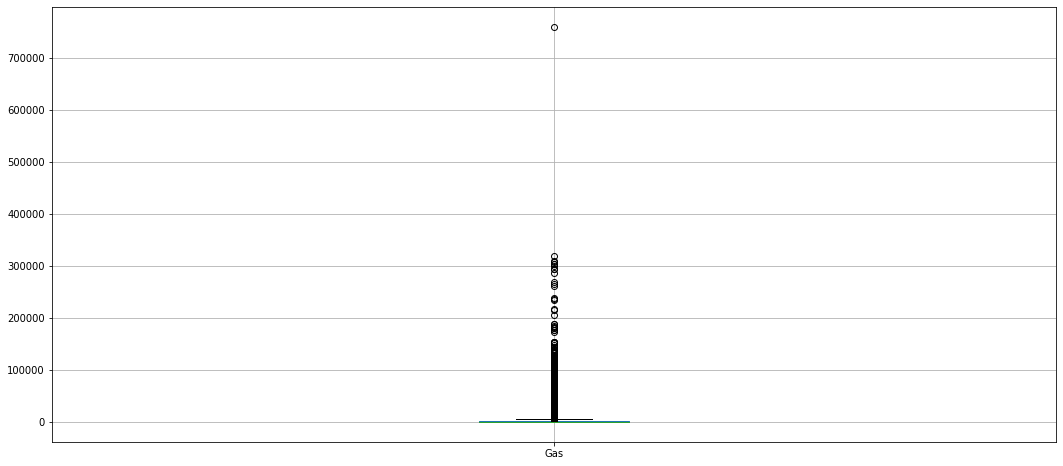

In [ ]:
data[['Gas']].boxplot()

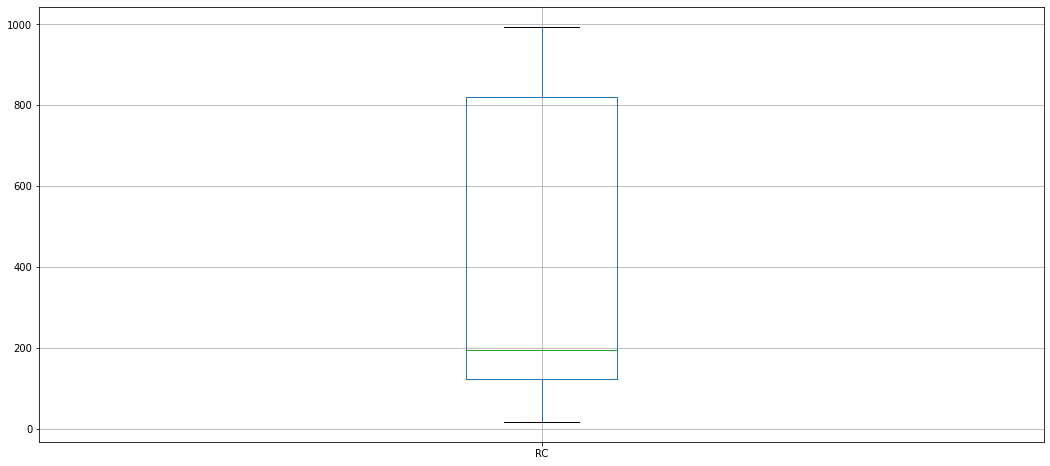

In [ ]:
data[['RC']].boxplot()

#### From the plot,there are outliers but the cummulative gas and water used has thier average values between 100000 to 300000

### Bivariate Analysis

#### What's the relationship between the features?

In [ ]:
data.corr()

Gas     Water    cumgas  cumwater     APINO        RC
Gas       1.000000  0.085618  0.932217  0.105386  0.105643 -0.060776
Water     0.085618  1.000000  0.072459  0.821701  0.006310  0.074930
cumgas    0.932217  0.072459  1.000000  0.112192  0.115405 -0.068516
cumwater  0.105386  0.821701  0.112192  1.000000  0.009175  0.085452
APINO     0.105643  0.006310  0.115405  0.009175  1.000000 -0.163783
RC       -0.060776  0.074930 -0.068516  0.085452 -0.163783  1.000000

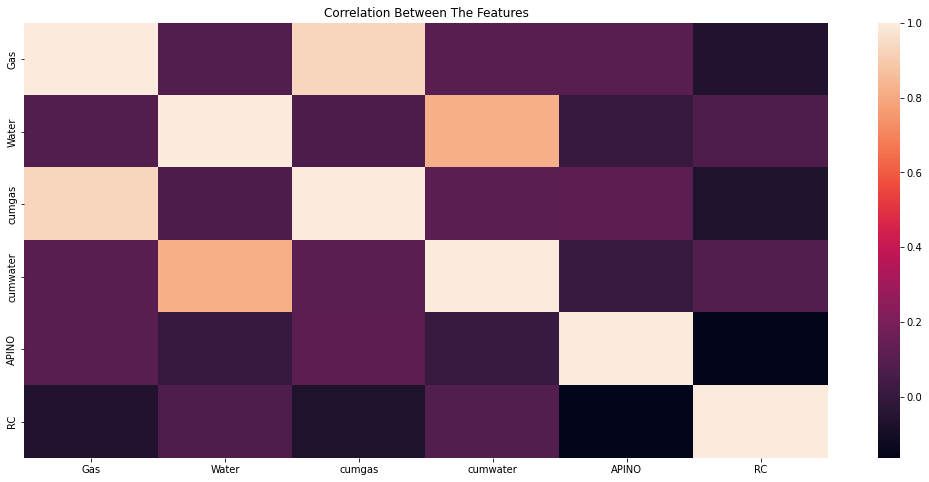

In [ ]:
sns.heatmap(data.corr())
plt.title('Correlation Between The Features');

From the heatmap it can be deduced that the cumwater and cumgas are dependent on water and gas respectively and there is a week correlation between other features.

In [ ]:
data.describe()

Gas         Water        cumgas      cumwater         APINO  \
count  2.672708e+06  2.672708e+06  2.672708e+06  2.672708e+06  2.672708e+06   
mean   2.512788e+03  3.635362e+03  2.911382e+04  3.934696e+04  1.215240e+06   
std    5.113928e+03  7.540316e+03  5.650351e+04  7.021296e+04  9.773447e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  5.074170e+05   
25%    2.160000e+02  0.000000e+00  2.972000e+03  1.250000e+03  5.420800e+05   
50%    9.560000e+02  1.092000e+03  1.144200e+04  1.519900e+04  5.543480e+05   
75%    2.694000e+03  4.154000e+03  3.163200e+04  4.691900e+04  1.924896e+06   
max    7.592340e+05  1.505515e+06  3.126027e+06  3.750893e+06  4.121068e+06   

                 RC  
count  2.672708e+06  
mean   3.846499e+02  
std    3.561651e+02  
min    1.600000e+01  
25%    1.230000e+02  
50%    1.930000e+02  
75%    8.200000e+02  
max    9.940000e+02

# Time Series Data Cleaning

In [ ]:
# drop multicollinear features
data_2 = data_1.drop(['cumwater', 'cumgas'], axis = 1)

# drop features not useful for time series analysis
data_3 = data_2.drop(['RC', 'APINO'], axis = 1)

# handle outliers by trimming the bottom and top 10% in Gas and Water column

data_4 = data_3.copy()
low_gas, high_gas = data_4['Gas'].quantile([0.1, 0.90])
mask_gas = data_4["Gas"].between(low_gas, high_gas)
data_4 = data_4[mask_gas]

low_water, high_water = data_4['Water'].quantile([0.1, 0.90])
mask_water = data_4["Water"].between(low_water, high_water)
data_4 = data_4[mask_water]

In [ ]:
data_4.shape

(1939755, 3)

In [ ]:
data_5 = data_4.copy()

data_5['Year'] = data_5['Date'].dt.year
data_5['Month'] = data_5['Date'].dt.month

data_5 = data_4.sort_values(by = 'Date', ignore_index = True)

data_5['Year'] = data_5['Date'].dt.year
data_5['Month'] = data_5['Date'].dt.month


In [ ]:
#data_5.to_csv('drive/MyDrive/TechPet/Project 1/data_cleaned.csv')
#data_5.to_csv('drive/MyDrive/Tech Pet/Data/data_cleaned.csv')

In [ ]:
# data_5 = pd.read_csv('drive/MyDrive/TechPet/Project 1/data_cleaned.csv')
data_5 = pd.read_csv('drive/MyDrive/Tech Pet/Data/data_cleaned.csv')

In [ ]:
data_5 = data_5.drop('Unnamed: 0', axis = 1)
data_5['Date'] = pd.to_datetime(data_5['Date'])

In [ ]:
# def wrangle_data_1(df):
#   data = pd.DataFrame()
#   years = list(df['Year'].unique())

#   for year in years:
#     df_year = df[df['Year'] == year]
#     months = df_year['Month'].nunique()
#     if (months != 12) and (year != 2021):
#       pass
#     else:
#       data = pd.concat([data, df_year])
      
#   return data     

In [ ]:
# resample data monthly
data_6 = data_5.groupby([data_5['Year'], data_5['Month']]).mean()

data_6 = data_6.reset_index()
data_6['Date'] = data_6[['Year', 'Month']].apply(lambda x: '-'.join(x.values.astype(str)), axis = "columns")

data_7 = data_6.set_index('Date')

## Cleaned Data Inspection

In [ ]:
df = data_5.copy()
df.head(3)

Date   Gas  Water  Year  Month
0 1978-07-11  5601      0  1978      7
1 1978-08-31  3670      0  1978      8
2 1978-09-14  1721      0  1978      9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939755 entries, 0 to 1939754
Data columns (total 5 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Gas     int64         
 2   Water   int64         
 3   Year    int64         
 4   Month   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 74.0 MB


In [ ]:
water_95 = df['Water'].quantile(.95)
print(water_95)

water_90 = df['Water'].quantile(.90)
print(water_90)

5736.0
4410.0


In [ ]:
gas_95 = df['Gas'].quantile(.95)
print(gas_95)

gas_90 = df['Gas'].quantile(.90)
print(gas_90)

4617.0
3668.0


In [ ]:
df.describe()

Gas         Water          Year         Month
count  1.939755e+06  1.939755e+06  1.939755e+06  1.939755e+06
mean   1.426986e+03  1.381475e+03  2.009490e+03  6.460899e+00
std    1.437047e+03  1.893459e+03  5.202636e+00  3.456816e+00
min    1.000000e+00  0.000000e+00  1.978000e+03  1.000000e+00
25%    3.210000e+02  0.000000e+00  2.006000e+03  3.000000e+00
50%    9.260000e+02  4.500000e+02  2.009000e+03  6.000000e+00
75%    2.101000e+03  2.170000e+03  2.013000e+03  9.000000e+00
max    6.136000e+03  7.758000e+03  2.021000e+03  1.200000e+01

In [ ]:
# Removing the zeros from the water series
low_water, high_water = data_7['Water'].quantile([0.2, 1])
mask_water = data_7["Water"].between(low_water, high_water,inclusive=True)
data_water_aggregate = data_7[mask_water]

In [ ]:
# Removing the zeros from the water series
low_water, high_water = data_5['Water'].quantile([0.39, 1])
mask_water = data_5["Water"].between(low_water, high_water,inclusive=True)
data_water = data_5[mask_water]

In [ ]:
df['Day'] = df['Date'].dt.day

### Inspect Gas

In [ ]:
max_index_gas = df.groupby([df['Month'],df['Year']])['Gas'].idxmax()
max_gas_days = df.loc[max_index_gas]
max_gas_days.head(6)

Date   Gas  Water  Year  Month  Day
34  1982-01-31  4617      0  1982      1   31
95  1983-01-31  3895      0  1983      1   31
148 1984-01-31  1451      0  1984      1   31
211 1985-01-31  3283      0  1985      1   31
269 1986-01-31   947      0  1986      1   31
329 1988-01-26  3108      0  1988      1   26

In [ ]:
thirty_day_month = (max_gas_days['Day'] == 30) & ((max_gas_days['Month'] == 4) | (max_gas_days['Month'] == 6) | (max_gas_days['Month'] == 9) | (max_gas_days['Month'] == 11))
last_day_feb_leap = (max_gas_days['Day'] == 29) & (max_gas_days['Month'] == 2) & (max_gas_days['Year'] % 4 == 0)
thirty_one_day_month = (max_gas_days['Day'] == 31) & ((max_gas_days['Month'] == 1) | (max_gas_days['Month'] == 3) | (max_gas_days['Month'] == 5) | (max_gas_days['Month'] == 7) | (max_gas_days['Month'] == 8) | (max_gas_days['Month'] == 10) | (max_gas_days['Month'] == 12))
last_day_feb = (max_gas_days['Day'] == 28) & (max_gas_days['Month'] == 2)
total_gas_month_end_max = len(max_gas_days[thirty_day_month]) + len(max_gas_days[last_day_feb_leap]) + len(max_gas_days[thirty_one_day_month]) + len(max_gas_days[last_day_feb])

In [ ]:
print(f'{round(total_gas_month_end_max/len(max_gas_days)*100, 3)}% of the maximum Gas vlaues are from the last day of the month')

83.061% of the maximum Gas vlaues are from the last day of the month


In [ ]:
df.head()

Date   Gas  Water  Year  Month  Day
0 1978-07-11  5601      0  1978      7   11
1 1978-08-31  3670      0  1978      8   31
2 1978-09-14  1721      0  1978      9   14
3 1979-08-19  3303      0  1979      8   19
4 1979-09-02   167      0  1979      9    2

In [ ]:
df.shape

(1939755, 6)

In [ ]:
import calendar
last_day_of_months =  pd.DataFrame()
years = list(df.Year.unique())

for year in years:
  df_year = df[df['Year'] == year]

  for month in range(1, 13):
    df_month = df_year[df_year['Month'] == month]

    last_day = calendar.monthrange(year, month)[1]
    last_day_of_month = df_month[df_month['Day'] == last_day]

    last_day_of_months = pd.concat([last_day_of_months, last_day_of_month])

In [ ]:
last_day_of_months.tail()

Date  Gas  Water  Year  Month  Day
1939750 2021-06-30  360   3473  2021      6   30
1939751 2021-06-30  698      0  2021      6   30
1939752 2021-06-30  988   4678  2021      6   30
1939753 2021-06-30  312      0  2021      6   30
1939754 2021-06-30  709   2956  2021      6   30

In [ ]:
rolling_sum = (last_day_of_months.set_index('Date')).resample('M', convention = 'end').sum()

In [ ]:
rolling_sum.tail()

Gas    Water     Year  Month     Day
Date                                                
2021-02-28  4175508  4484172  6503578   6436   90104
2021-03-31  4512538  4904748  6930009  10287  106299
2021-04-30  4266025  4910495  6847148  13552  101640
2021-05-31  4548476  5247422  7128067  17635  109337
2021-06-30  4183062  5066999  6713762  19932   99660

In [ ]:
non_last_day_of_months = df.loc[~df.Date.isin(last_day_of_months.Date)]

In [ ]:
non_last_day_of_months.tail()

Date  Gas  Water  Year  Month  Day
1936428 2021-06-29   86      3  2021      6   29
1936429 2021-06-29  206      0  2021      6   29
1936430 2021-06-29  187      0  2021      6   29
1936431 2021-06-29   31      0  2021      6   29
1936432 2021-06-29   18      0  2021      6   29

In [ ]:
df.shape[0] == last_day_of_months.shape[0] + non_last_day_of_months.shape[0]

True

In [ ]:
rolling_sum = (non_last_day_of_months.set_index('Date')).resample('M', convention = 'end').sum()
rolling_sum

Gas   Water     Year  Month    Day
Date                                             
1978-07-31    5601       0     1978      7     11
1978-08-31       0       0        0      0      0
1978-09-30    1721       0     1978      9     14
1978-10-31       0       0        0      0      0
1978-11-30       0       0        0      0      0
...            ...     ...      ...    ...    ...
2021-02-28  269878  188376  1485435   1470  15093
2021-03-31  243178  192488   931681   1383  10271
2021-04-30  339396  271765  1040815   2060  12303
2021-05-31  109154  130653   634594   1570   7433
2021-06-30   83965  115597   460788   1368   5046

[516 rows x 5 columns]

In [ ]:
#max_index_water = data_10.groupby([data_10['Month'],data_10['Year']])['Water'].idxmax()
#max_water_days = data_10.loc[max_index_water]

In [ ]:
#thirty_day_month = (max_water_days['Day'] == 30) & ((max_water_days['Month'] == 4) | (max_water_days['Month'] == 6) | (max_water_days['Month'] == 9) | (max_water_days['Month'] == 11))
#last_day_feb_leap = (max_water_days['Day'] == 29) & (max_water_days['Month'] == 2) & (max_water_days['Year'] % 4 == 0)
#thirty_one_day_month = (max_water_days['Day'] == 31) & ((max_water_days['Month'] == 1) | (max_water_days['Month'] == 3) | (max_water_days['Month'] == 5) | (max_water_days['Month'] == 7) | (max_water_days['Month'] == 8) | (max_water_days['Month'] == 10) | (max_water_days['Month'] == 12))
#last_day_feb = (max_water_days['Day'] == 28) & (max_water_days['Month'] == 2)
#total_water_month_end_max = len(max_water_days[thirty_day_month]) + len(max_water_days[last_day_feb_leap]) + len(max_water_days[thirty_one_day_month]) + len(max_water_days[last_day_feb])

In [ ]:
#non_max_gas_days = data_10.loc[~data_10.index.isin(max_index_gas)]

In [ ]:
#non_max_gas_days['Gas'].groupby([non_max_gas_days['Year'], non_max_gas_days['Month']]).rolling(12).sum()

In [ ]:
# resample dataframe monthly
#rolling_sum = (data_5.set_index('Date')).resample('M', convention = 'end').sum()

In [ ]:
data_5

Date   Gas  Water  Year  Month
0       1978-07-11  5601      0  1978      7
1       1978-08-31  3670      0  1978      8
2       1978-09-14  1721      0  1978      9
3       1979-08-19  3303      0  1979      8
4       1979-09-02   167      0  1979      9
...            ...   ...    ...   ...    ...
1939750 2021-06-30   360   3473  2021      6
1939751 2021-06-30   698      0  2021      6
1939752 2021-06-30   988   4678  2021      6
1939753 2021-06-30   312      0  2021      6
1939754 2021-06-30   709   2956  2021      6

[1939755 rows x 5 columns]

# Gas Time Series Analysis

In [ ]:
Gas_data = data_7.drop('Water', axis = 1)
Gas_data.head()

Year  Month     Gas
Date                       
1978-7  1978      7  5601.0
1978-8  1978      8  3670.0
1978-9  1978      9  1721.0
1979-8  1979      8  3303.0
1979-9  1979      9   167.0

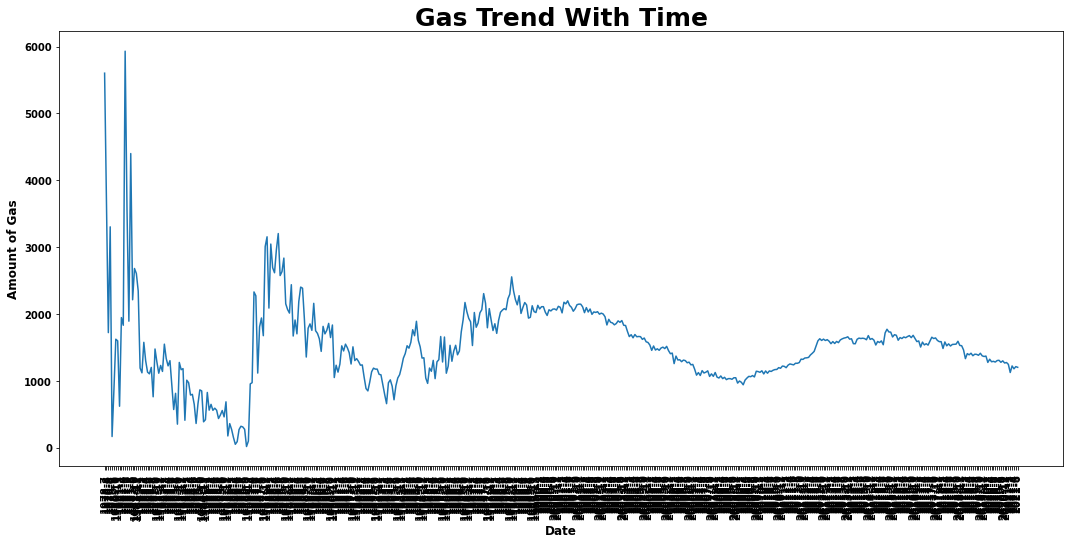

In [ ]:
# plot the GAS column

fig, ax = plt.subplots(figsize = (18,8))
ax.plot(Gas_data['Gas'])
plt.yticks(fontweight = 'bold')
plt.xticks( rotation = 'vertical', fontweight = 'bold')
plt.ylabel('Amount of Gas', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.title('Gas Trend With Time', fontsize = 25, fontweight = 'bold', loc = 'center')
plt.show()

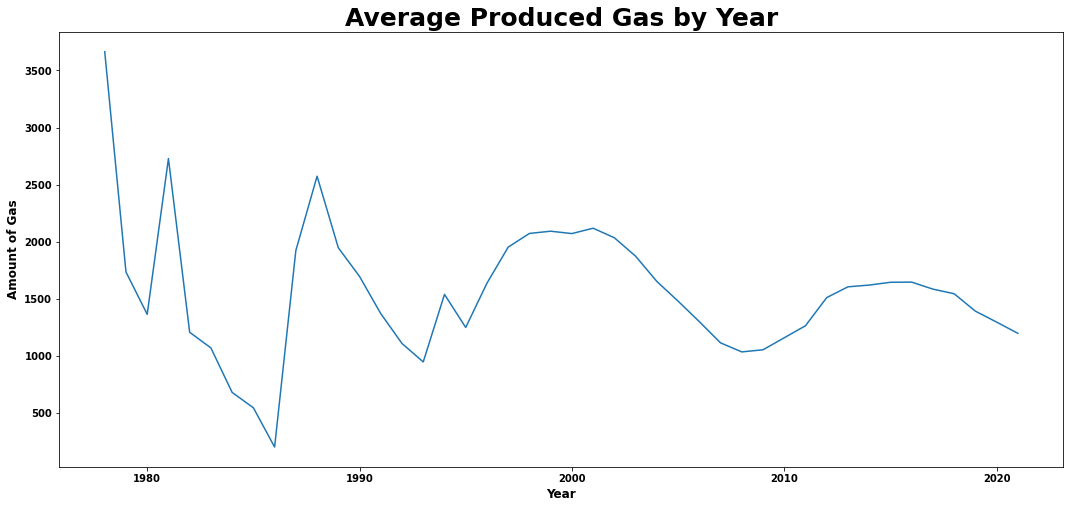

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(Gas_data.groupby('Year').mean()['Gas'])
plt.yticks(fontweight = 'bold')
plt.xticks(rotation = 0, fontweight = 'bold')
plt.ylabel('Amount of Gas', fontsize = 12, fontweight = 'bold')
plt.xlabel('Year', fontsize = 12, fontweight = 'bold')
plt.title('Average Produced Gas by Year', fontsize = 25, fontweight = 'bold', loc = 'center')
plt.show()

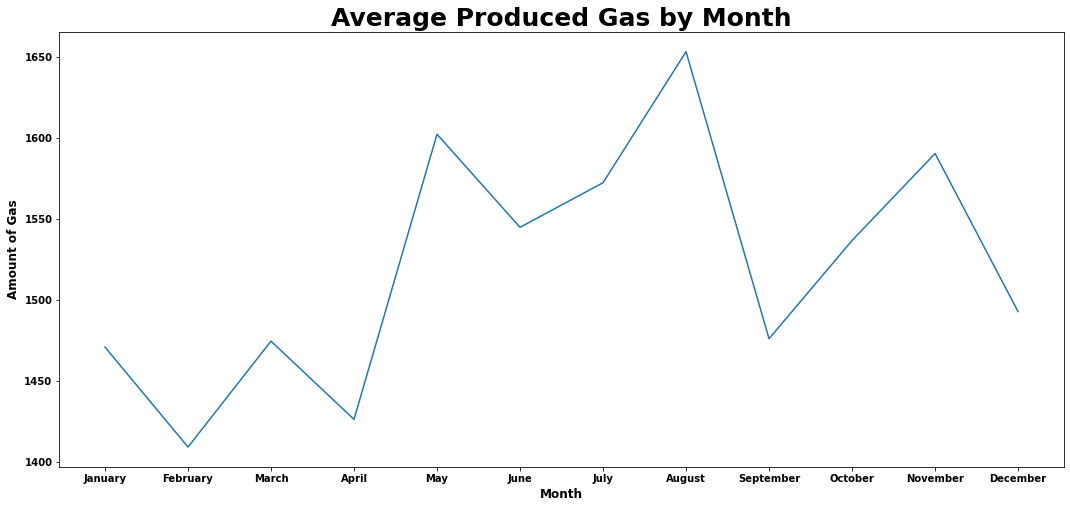

In [ ]:
month_name = list(calendar.month_name)[1:]
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(month_name, Gas_data.groupby('Month').mean()['Gas'])
plt.yticks(fontweight = 'bold')
plt.xticks(month_name,rotation = 0, fontweight = 'bold')
plt.ylabel('Amount of Gas', fontsize = 12, fontweight = 'bold')
plt.xlabel('Month', fontsize = 12, fontweight = 'bold')
plt.title('Average Produced Gas by Month', fontsize = 25, fontweight = 'bold', loc = 'center')
plt.show()

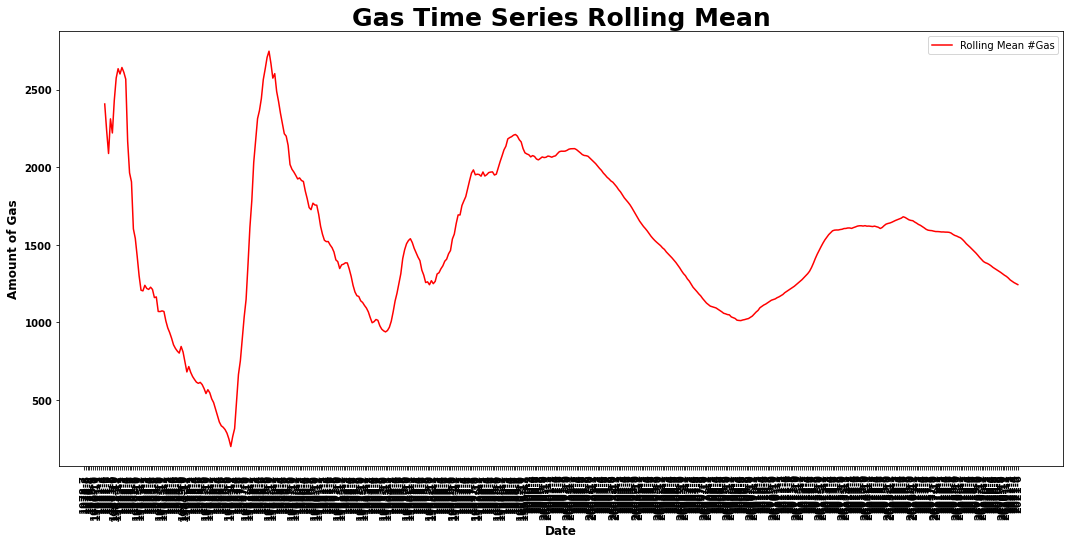

In [ ]:
# plot the rolling average of Gas using a window size of the no of months in a year

rolling_mean_gas = Gas_data['Gas'].rolling(12).mean()

fig, ax = plt.subplots(figsize = (18,8))
ax.plot(rolling_mean_gas, color = "red", label = "Rolling Mean #Gas")
plt.yticks(fontweight = 'bold')
plt.xticks(rotation = 'vertical', fontweight = 'bold')
plt.ylabel('Amount of Gas', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.title("Gas Time Series Rolling Mean", fontsize = 25, fontweight = 'bold')

plt.legend(loc = "best")
plt.show()

In [ ]:
def viz_years(mask,title,ax,df_to_use,index):
    sns.lineplot(x = df_to_use[mask].index,y = df_to_use[mask], label = 'Production',ax=ax, color = 'blue')

    z = np.polyfit(range(0,len(df_to_use[mask].index)), df_to_use[mask], 1)
    p = np.poly1d(z)
    sns.lineplot(x = range(0,len(df_to_use[mask].index)),y = p(range(0,len(df_to_use[mask].index))),color = 'red',linestyle ='--', linewidth = 3, label = 'Trendline', ax = ax)

    ax.set_xticks(range(0,len(df_to_use[mask].index),index))
    ax.set_xticklabels(df_to_use[mask].index,rotation=90)
    ax.set_ylabel('Amount of Gas', fontsize = 15, fontweight = 'bold')
    ax.set_xlabel('Date', fontsize = 15, fontweight = 'bold')
    ax.set_title(("{}").format(title), fontsize = 20, fontweight = 'bold')
    ax.legend(loc = 'best', fontsize = 14, title = 'Plot', title_fontsize= 15, markerfirst = True, fancybox = True)

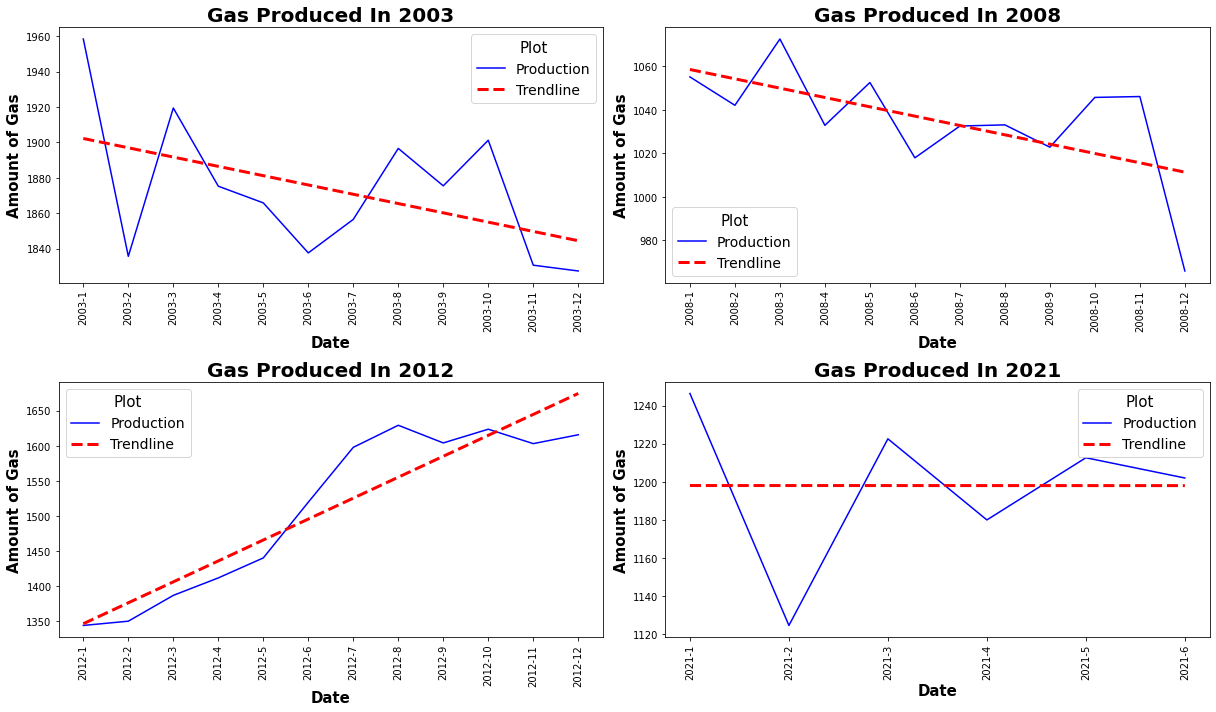

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (17, 10))
lags = {1:[2003,ax[0,0]], 2:[2008,ax[0,1]], 3:[2012,ax[1,0]], 4:[2021,ax[1,1]]}

for i in lags.keys():
  mask = (data_water_aggregate["Year"] == lags[i][0])
  viz_years(mask,('Gas Produced In {}').format(lags[i][0]), lags[i][1],data_water_aggregate['Gas'],1)
plt.tight_layout()

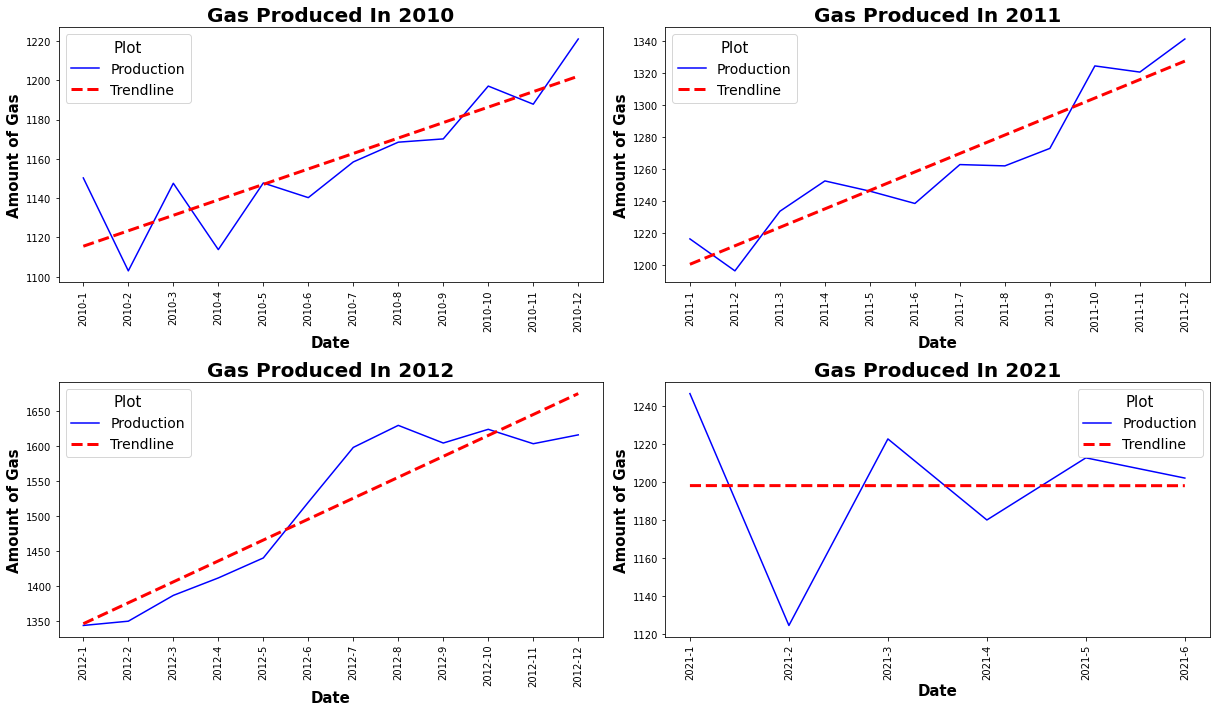

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (17, 10))
years = {1:[2010,ax[0,0]], 2:[2011,ax[0,1]], 3:[2012,ax[1,0]], 4:[2021,ax[1,1]]}

for i in years.keys():
  mask = (data_water_aggregate["Year"] == years[i][0])
  viz_years(mask,('Gas Produced In {}').format(years[i][0]), years[i][1],data_water_aggregate['Gas'],1)
plt.tight_layout()

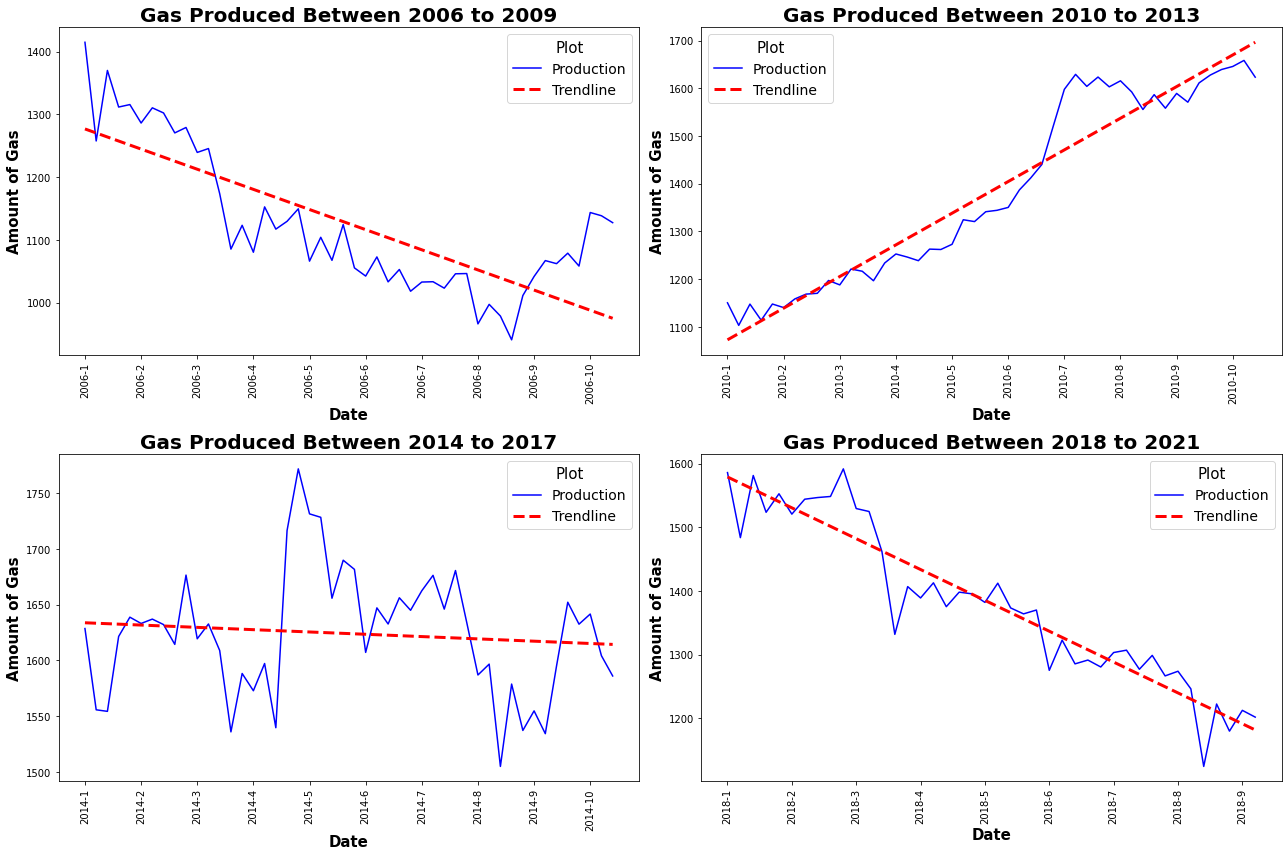

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (18, 12))
years = {1:[2006,2009,ax[0,0]], 2:[2010,2013,ax[0,1]], 3:[2014,2017,ax[1,0]], 4:[2018,2021,ax[1,1]]}
for i in years.keys():
  mask = (data_water_aggregate["Year"] >= years[i][0]) & (data_water_aggregate["Year"] <= years[i][1])
  viz_years(mask,('Gas Produced Between {} to {}').format(years[i][0],years[i][1]),years[i][2],data_water_aggregate['Gas'],5)
plt.tight_layout()

# Gas Series Feature Engineering

In [ ]:
# resample dataframe monthly
data_resampled = (data_5.set_index('Date')).resample('M', convention = 'end').mean().bfill(axis = 0)

# create Gas series
Gas_data = pd.DataFrame(data_resampled['Gas'], index = data_resampled.index)

In [ ]:
Gas_data.head()

Gas
Date              
1978-07-31  5601.0
1978-08-31  3670.0
1978-09-30  1721.0
1978-10-31  3303.0
1978-11-30  3303.0

**Test for Autocorrelation**:
Measure of how correlated time series data is at a given point in time with past values

In [ ]:
autocorrelation_lag1 = Gas_data["Gas"].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.8066257846348877


In [ ]:
autocorrelation_lag6 = Gas_data["Gas"].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag12 = Gas_data["Gas"].autocorr(lag=12)
print("Twelve Month Lag: ", autocorrelation_lag12)

autocorrelation_lag36 = Gas_data["Gas"].autocorr(lag=36)
print("Thirty Six Month Lag: ", autocorrelation_lag36)

Six Month Lag:  0.5883367576567525
Twelve Month Lag:  0.3042053810278582
Thirty Six Month Lag:  0.006359887349471712


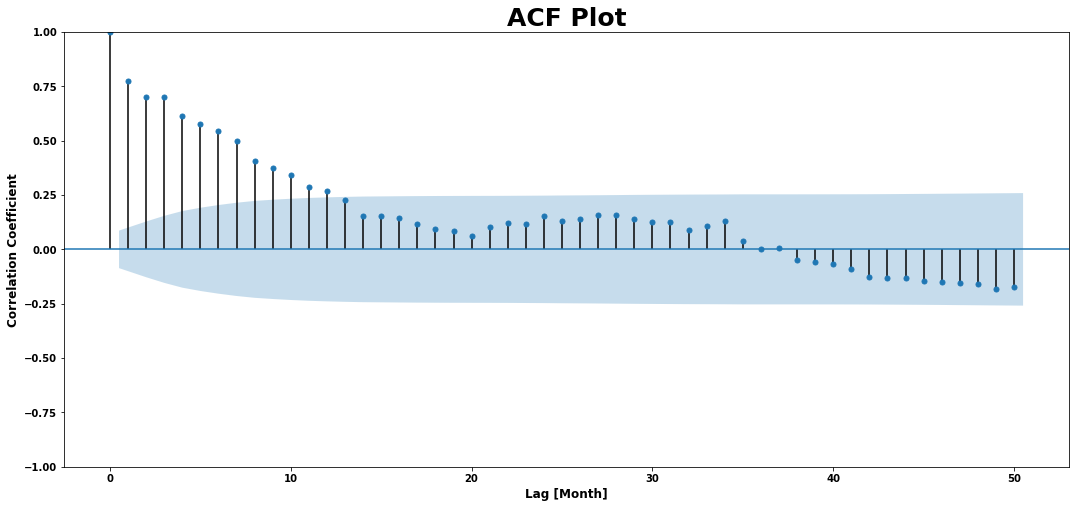

In [ ]:
# create an ACF plot of the Gas column to see how present values are correlated with the past

fig, ax = plt.subplots(figsize = (18, 8))
plot_acf(Gas_data["Gas"], ax = ax, lags= 50);

plt.xlabel("Lag [Month]", fontsize = 12, fontweight = 'bold')
plt.ylabel("Correlation Coefficient", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("ACF Plot", fontsize = 25, fontweight = 'bold')

plt.show()

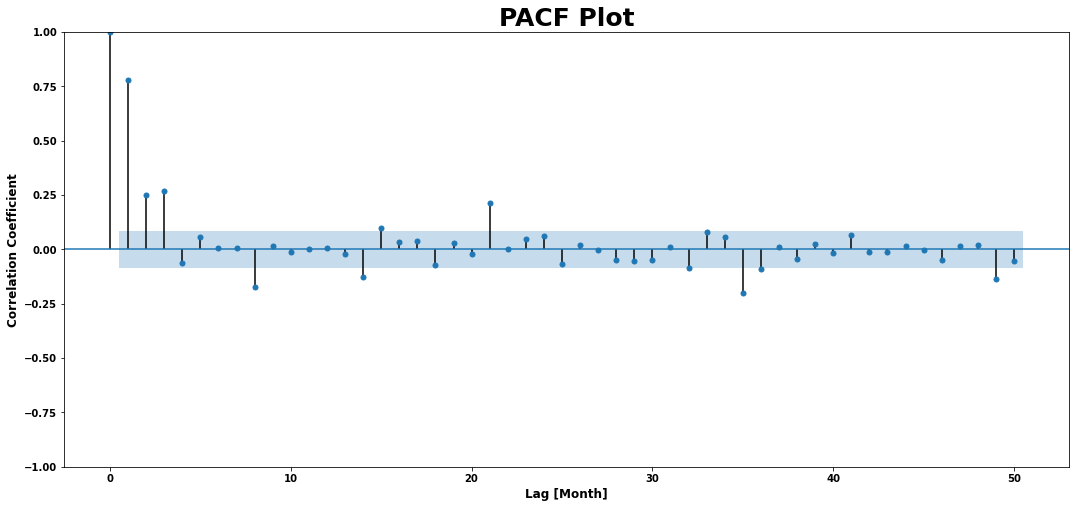

In [ ]:
# create an PACF plot of the Gas column to see how present values are correlated with the past

fig, ax = plt.subplots(figsize = (18, 8))
plot_pacf(Gas_data["Gas"], ax = ax, lags =50);

plt.xlabel("Lag [Month]", fontsize = 12, fontweight = 'bold')
plt.ylabel("Correlation Coefficient", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("PACF Plot", fontsize = 25, fontweight = 'bold')

plt.show()

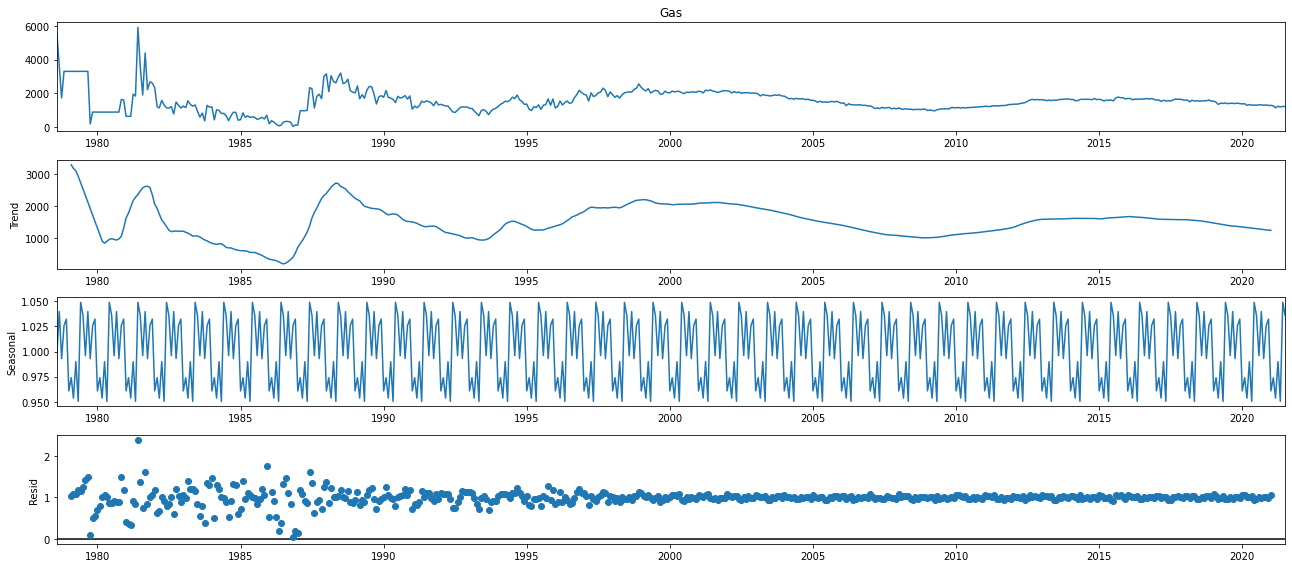

In [ ]:
df = Gas_data.copy()

# Seasonal decompose
decompose = seasonal_decompose(df['Gas'], model='multiplicative', period=12)

decompose.plot()

plt.show()

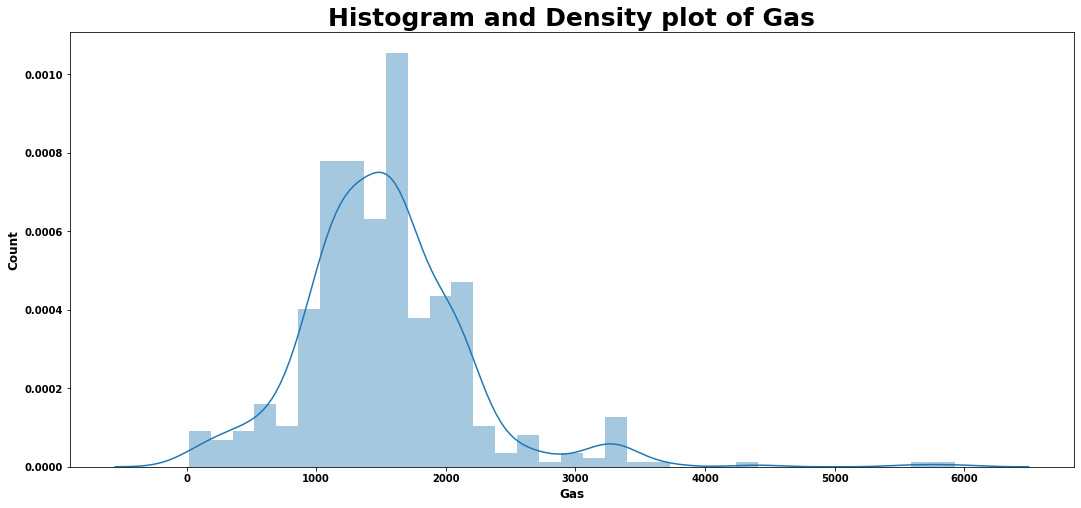

In [ ]:
# plot histogram and density plot of Gas Series

fig, ax = plt.subplots(figsize = (18, 8))
sns.distplot(Gas_data['Gas'])

plt.xlabel("Gas", fontsize = 12, fontweight = 'bold')
plt.ylabel("Count", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("Histogram and Density plot of Gas", fontsize = 25, fontweight = 'bold')

plt.show()

**Test for Stationarity**

In [ ]:
# ADF Test

result = adfuller(Gas_data['Gas'], autolag = 'AIC')
print(f'ADF Statistics: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p_value: {result[1]}')

for key, value in result[4].items():
  print('Critical Values:')
  print(f'   {key}, {value}')

ADF Statistics: -4.837736684985302
n_lags: 4.6031649171254154e-05
p_value: 4.6031649171254154e-05
Critical Values:
   1%, -3.443391504492468
Critical Values:
   5%, -2.8672917032172953
Critical Values:
   10%, -2.5698334393109095


Lambda: 0.608786


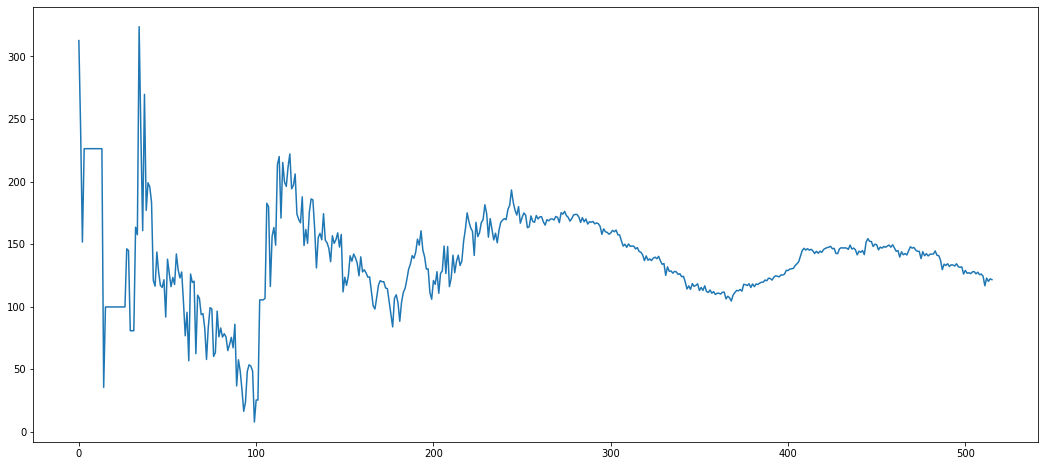

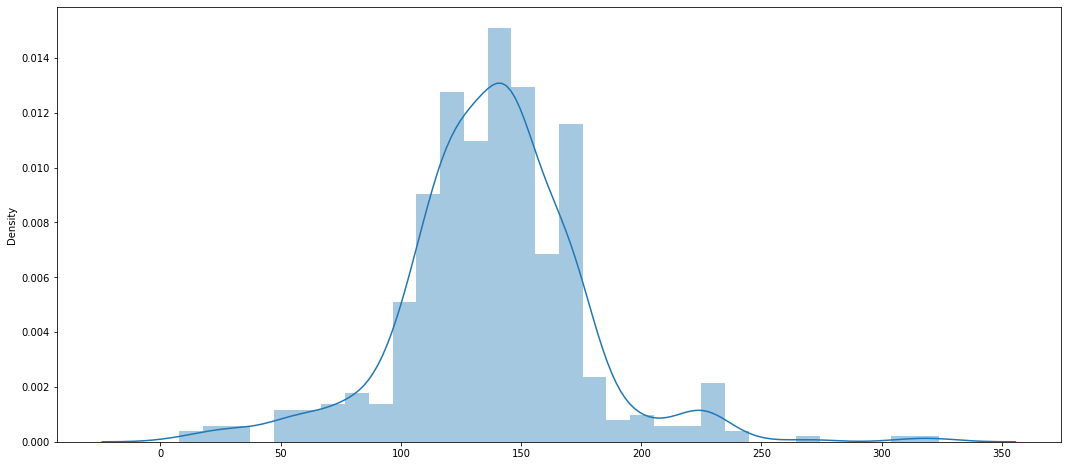

In [ ]:
# Box Cox Transform of Gas Series
# set the lambda parameter to None (default) and let the function find a statistically tuned value

boxcox_transform_gas, lam = boxcox(Gas_data['Gas'])
print('Lambda: %f' % lam)

# line plot of gas
plt.plot(boxcox_transform_gas)
plt.show()

# histogram and density plot of gas
sns.distplot(boxcox_transform_gas)
plt.show()

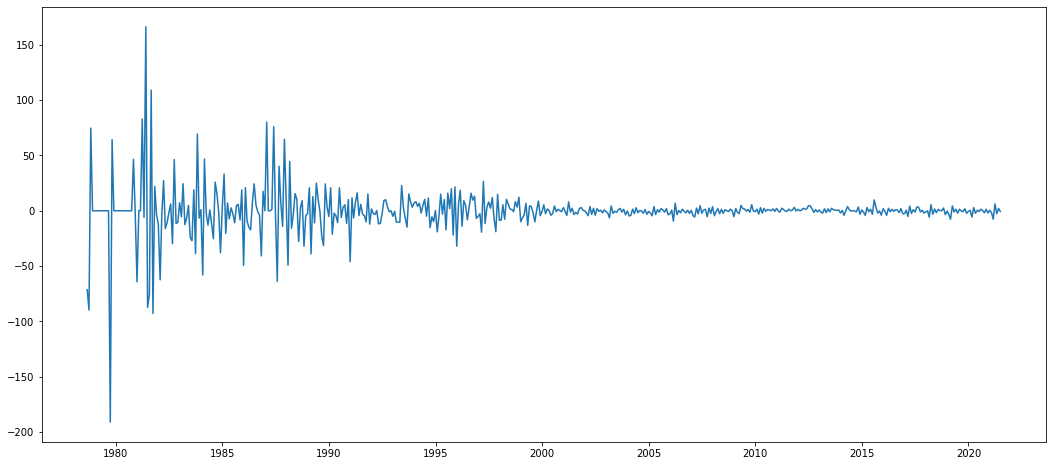

In [ ]:
# difference the dataset

Gas_transformed = pd.Series(boxcox_transform_gas, index = Gas_data.index)
Gas_diff = Gas_transformed.diff()
plt.plot(Gas_diff)
plt.show()

In [ ]:
# ADF Test for the square root transformed Gas series

result = adfuller(Gas_transformed, autolag = 'AIC')
print(f'ADF Statistics: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p_value: {result[1]}')

for key, value in result[4].items():
  print('Critical Values:')
  print(f'   {key}, {value}')

ADF Statistics: -4.504155180738617
n_lags: 0.00019326822398487174
p_value: 0.00019326822398487174
Critical Values:
   1%, -3.443391504492468
Critical Values:
   5%, -2.8672917032172953
Critical Values:
   10%, -2.5698334393109095


In [ ]:
# ADF Test for the differenced square root transformed Gas series

result = adfuller(Gas_diff.dropna(), autolag = 'AIC')
print(f'ADF Statistics: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p_value: {result[1]}')

for key, value in result[4].items():
  print('Critical Values:')
  print(f'   {key}, {value}')

ADF Statistics: -7.052729993396223
n_lags: 5.473373603603096e-10
p_value: 5.473373603603096e-10
Critical Values:
   1%, -3.4436298692815304
Critical Values:
   5%, -2.867396599893435
Critical Values:
   10%, -2.5698893429241916


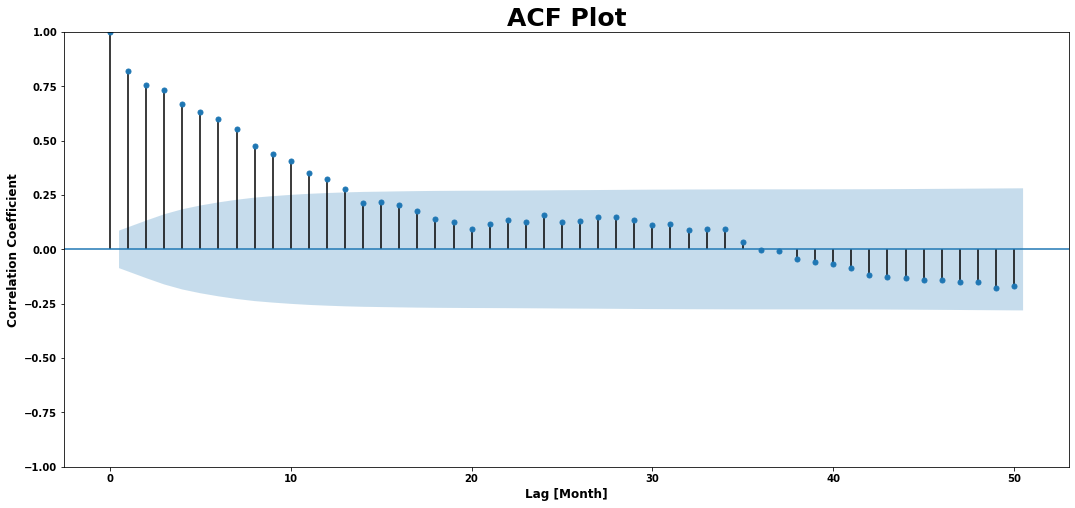

In [ ]:
# create an ACF plot of the square root transformed Gas series

fig, ax = plt.subplots(figsize = (18, 8))
plot_acf(boxcox_transform_gas, ax = ax, lags =50);

plt.xlabel("Lag [Month]", fontsize = 12, fontweight = 'bold')
plt.ylabel("Correlation Coefficient", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("ACF Plot", fontsize = 25, fontweight = 'bold')

plt.show()

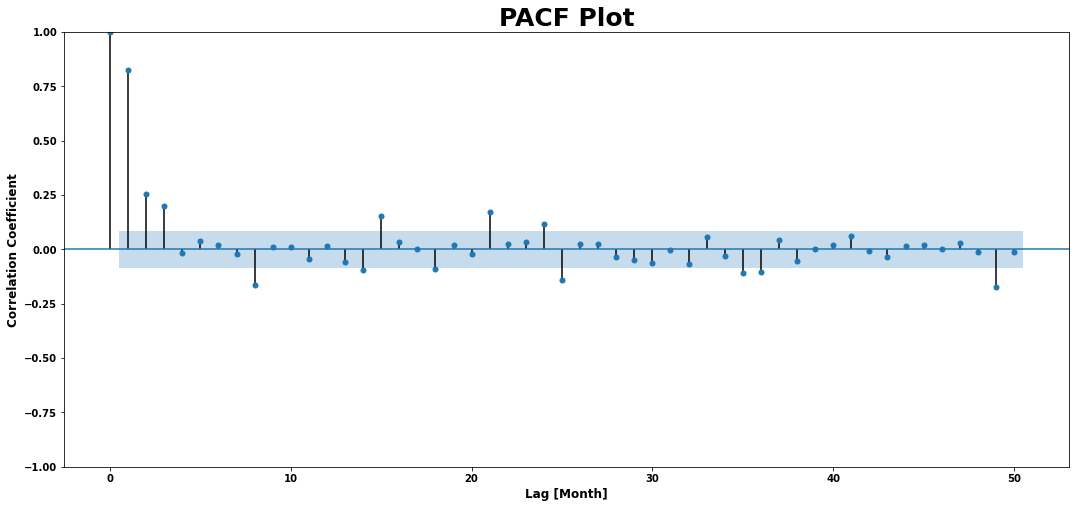

In [ ]:
# create a PACF plot of the square root transformed Gas series

fig, ax = plt.subplots(figsize = (18, 8))
plot_pacf(boxcox_transform_gas, ax = ax, lags =50);

plt.xlabel("Lag [Month]", fontsize = 12, fontweight = 'bold')
plt.ylabel("Correlation Coefficient", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("PACF Plot", fontsize = 25, fontweight = 'bold')

plt.show()

# Gas Modelling

In [ ]:
Gas_data['Gas'].head()

Date
1978-07-31    5601.0
1978-08-31    3670.0
1978-09-30    1721.0
1978-10-31    3303.0
1978-11-30    3303.0
Freq: M, Name: Gas, dtype: float64

In [ ]:
# Square root transform Gas Series
transformed_gas, lam = boxcox(Gas_data['Gas'])

# Create Series y for modelling
y = pd.Series(transformed_gas, index = Gas_data.index)


In [ ]:
print(lam)

0.6087856774117406


In [ ]:
y.head()

Date
1978-07-31    312.716437
1978-08-31    241.383654
1978-09-30    151.618727
1978-10-31    226.284879
1978-11-30    226.284879
Freq: M, dtype: float64

In [ ]:
cutoff_test = int(len(y) * 0.85)

y_train = y.iloc[:cutoff_test]
y_test = y.iloc[cutoff_test:]

In [ ]:
y_train.shape, y_test.shape

((438,), (78,))

In [ ]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Gas:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Gas: 137.95
Baseline MAE: 29.79


### AR Model

In [ ]:
# Create dictionary to store MAEs
dict_mae = dict()
# dict_mae_t = dict()

# Create a range for possible p values
p_params = [p for p in range(1, 75)]

# Iterate through possible values for `p`
for p in p_params:

  # Create key-value pair in dict
  dict_mae[p] = list()
  # dict_mae_t[p] = list()

  # Note start time
  start_time = time.time()
  
  # Train model
  model = AutoReg(y_train, lags = p, old_names = False).fit()

  # Calculate model training time
  elapsed_time = round(time.time() - start_time, 2)
  print(f"Trained AR {p} in {elapsed_time} seconds.")

  # Generate in-sample (training) predictions
  y_pred = model.predict().dropna()

  # Generate out-sample predictions
  y_pred_test = model.predict(y_test.index.min(), y_test.index.max())

  # Calculate training MAE
  training_mae = mean_absolute_error(y_train[p:], y_pred)

  # Calculate test MAE
  test_mae = mean_absolute_error(y_test, y_pred_test)
  
  # Append MAE to list in dictionary
  dict_mae[p].append(training_mae)

  dict_mae[p].append(test_mae)


print()
print(dict_mae)
# print(dict_mae_t)

Trained AR 1 in 0.01 seconds.
Trained AR 2 in 0.01 seconds.
Trained AR 3 in 0.01 seconds.
Trained AR 4 in 0.02 seconds.
Trained AR 5 in 0.01 seconds.
Trained AR 6 in 0.01 seconds.
Trained AR 7 in 0.01 seconds.
Trained AR 8 in 0.02 seconds.
Trained AR 9 in 0.01 seconds.
Trained AR 10 in 0.01 seconds.
Trained AR 11 in 0.01 seconds.
Trained AR 12 in 0.01 seconds.
Trained AR 13 in 0.01 seconds.
Trained AR 14 in 0.01 seconds.
Trained AR 15 in 0.01 seconds.
Trained AR 16 in 0.01 seconds.
Trained AR 17 in 0.01 seconds.
Trained AR 18 in 0.02 seconds.
Trained AR 19 in 0.01 seconds.
Trained AR 20 in 0.01 seconds.
Trained AR 21 in 0.02 seconds.
Trained AR 22 in 0.01 seconds.
Trained AR 23 in 0.05 seconds.
Trained AR 24 in 0.01 seconds.
Trained AR 25 in 0.01 seconds.
Trained AR 26 in 0.01 seconds.
Trained AR 27 in 0.01 seconds.
Trained AR 28 in 0.01 seconds.
Trained AR 29 in 0.02 seconds.
Trained AR 30 in 0.03 seconds.
Trained AR 31 in 0.03 seconds.
Trained AR 32 in 0.01 seconds.
Trained AR 33 in 

In [ ]:
ar_mae_a = pd.DataFrame(dict_mae).T
ar_mae_a.round(4)
ar_mae_a.rename(columns = {ar_mae_a.columns[0]: 'train_mae', ar_mae_a.columns[1]: 'test_mae',}, inplace = True)
ar_mae_a.head(8)

# ar_mae_df = pd.concat([pd.DataFrame(dict_mae), pd.DataFrame(dict_mae_t)]).T
# # 
# ar_mae_df

train_mae  test_mae
1  11.382845  8.078639
2  10.471147  7.691505
3   9.869919  6.966617
4   9.837000  7.149797
5   9.771903  7.143406
6   9.793965  7.109902
7   9.829126  7.151426
8   9.964910  7.636317

In [ ]:
fig = px.line(ar_mae_a, labels={"value": "Gas"})
fig.show();

In [ ]:
# create a line plot of the p values

# fig, ax = plt.subplots(figsize = (18, 8))
# plt.plot(ar_mae_df)

# plt.xlabel("p values", fontsize = 12, fontweight = 'bold')
# plt.ylabel("MAEs", fontsize = 12, fontweight = 'bold')
# plt.yticks(fontweight = 'bold')
# plt.xticks(fontweight = 'bold')
# plt.title("Line Plot", fontsize = 25, fontweight = 'bold')

# plt.show()

In [ ]:
ar_model = AutoReg(y_train, lags = 59, old_names = False).fit()

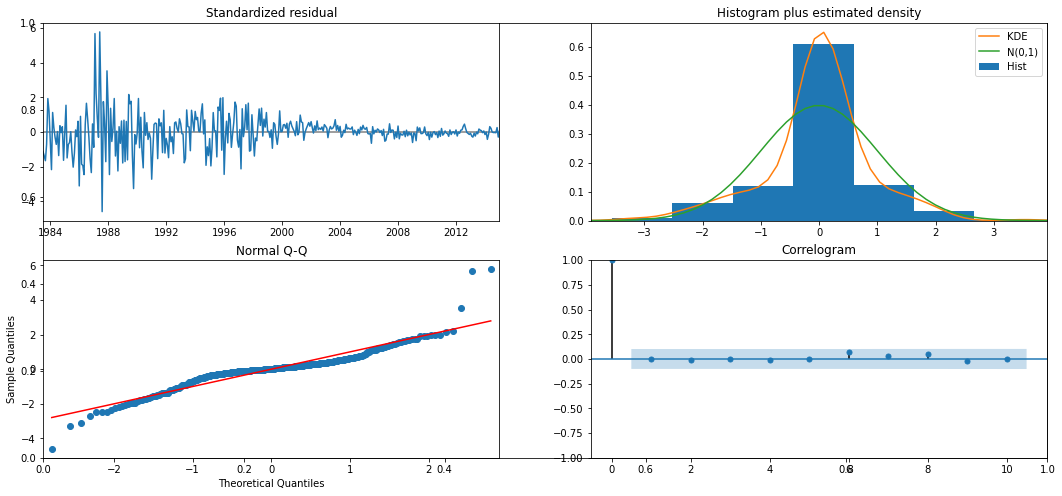

In [ ]:
fig, ax = plt.subplots(figsize = (18, 8))
ar_model.plot_diagnostics(fig=fig);

In [ ]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  438
Model:                    AutoReg(59)   Log Likelihood               -1455.081
Method:               Conditional MLE   S.D. of innovations             11.250
Date:                Thu, 18 Aug 2022   AIC                           3032.162
Time:                        07:47:38   BIC                           3272.352
Sample:                    06-30-1983   HQIC                          3127.480
                         - 12-31-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8723      4.359      3.412      0.001       6.329      23.415
y.L1           0.6592      0.051     12.933      0.000       0.559       0.759
y.L2           0.1132      0.061      1.867      0.062      -0.006       0.232
y.L3           0.1886      0.061      3.114      0.002       0.070       0.307
y.L4          -0.0241      0.060     -0.404      0.686      -0.141       0.093
y.L5           0.0153      0.059      0.258      0.796      -0.101       0.132
y.L6           0.1197      0.059      2.024      0.043       0.004       0.236
y.L7          -0.0623      0.058     -1.068      0.286      -0.177       0.052
y.L8          -0.0734      0.058     -1.258      0.209      -0.188       0.041
y.L9           0.0372      0.058      0.638      0.524      -0.077       0.151
y.L10          0.1223      0.058      2.116      0.034       0.009       0.236
y.L11         -0.1059      0.058     -1.840      0.066      -0.219       0.007
y.L12         -0.0328      0.058     -0.568      0.570      -0.146       0.080
y.L13         -0.0360      0.058     -0.625      0.532      -0.149       0.077
y.L14         -0.0699      0.058     -1.214      0.225      -0.183       0.043
y.L15          0.1494      0.058      2.593      0.010       0.036       0.262
y.L16         -0.0275      0.058     -0.476      0.634      -0.141       0.086
y.L17          0.0146      0.058      0.253      0.800      -0.099       0.128
y.L18         -0.0830      0.057     -1.444      0.149      -0.196       0.030
y.L19          0.0359      0.058      0.624      0.533      -0.077       0.149
y.L20         -0.0087      0.057     -0.152      0.879      -0.121       0.104
y.L21         -0.1565      0.057     -2.758      0.006      -0.268      -0.045
y.L22          0.0523      0.055      0.948      0.343      -0.056       0.160
y.L23          0.0752      0.053      1.416      0.157      -0.029       0.179
y.L24          0.1895      0.053      3.567      0.000       0.085       0.294
y.L25         -0.1751      0.048     -3.639      0.000      -0.269      -0.081
y.L26         -0.0208      0.049     -0.429      0.668      -0.116       0.074
y.L27         -0.0085      0.048     -0.179      0.858      -0.102       0.085
y.L28          0.0365      0.046      0.799      0.424      -0.053       0.126
y.L29          0.0448      0.046      0.982      0.326      -0.045       0.134
y.L30         -0.0519      0.045     -1.147      0.251      -0.141       0.037
y.L31          0.1110      0.045      2.457      0.014       0.022       0.200
y.L32         -0.0784      0.045     -1.725      0.084      -0.168       0.011
y.L33          0.0726      0.046      1.591      0.112      -0.017       0.162
y.L34         -0.1396      0.046     -3.054      0.002      -0.229      -0.050
y.L35          0.0252      0.046      0.551      0.581      -0.064       0.115
y.L36         -0.0100      0.045     -0.223      0.824      -0.098       0.078
y.L37          0.0164      0.044      0.371      0.710      -0.070       0.103
y.

In [ ]:
# store in-sample predictions in y_pred
y_pred = ar_model.predict(y_train.index.min(),y_train.index.max()).dropna()

In [ ]:
# create datafrane for the true values of the test set and model's predictions
df_pred_train = pd.DataFrame(
    {"y_train": y_train, "y_pred": y_pred}, index=y_train.index)

df_pred_train.dropna(inplace=True)

In [ ]:
df_pred_train.head()

y_train      y_pred
Date                              
1983-06-30  103.724595  116.355762
1983-07-31   76.652769   92.128841
1983-08-31   95.443477  114.078955
1983-09-30   56.679636   64.692393
1983-10-31  126.038215  104.321927

In [ ]:
fig = px.line(df_pred_train, labels={"value": "Gas"})
fig.show();

In [ ]:
# calculate test mean absolute error for model
y_pred_test = ar_model.predict(y_test.index.min(), y_test.index.max())
test_mae = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", test_mae)

Test MAE: 4.879952409065693


In [ ]:
# create datafrane for the true values of the test set and model's predictions
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_test}, index=y_test.index)

In [ ]:
df_pred_test.head(6)

y_test      y_pred
Date                              
2015-01-31  145.457902  147.686998
2015-02-28  141.365126  147.654753
2015-03-31  144.309640  148.799304
2015-04-30  143.443861  148.529907
2015-05-31  144.809326  147.228512
2015-06-30  141.576300  145.729109

In [ ]:
# create a time series plot for the values in test_predictions using plotly express
fig = px.line(df_pred_test, labels={"value": "Gas"})
fig.show();

In [ ]:
# perform walk-forward validation for the model for the entire test set y_test
y_pred_wfv = pd.Series()
history = y_train.copy()

for i in range(len(y_test)):
    r = AutoReg(history, 59, old_names = False).fit()

    next_pred = r.forecast()

    # store the model's predictions in the Series y_pred_wfv
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

In [ ]:
y_train.shape, history.shape

((438,), (516,))

In [ ]:
y_pred_wfv.head()

2015-01-31    147.686998
2015-02-28    146.175756
2015-03-31    144.369991
2015-04-30    144.409547
2015-05-31    142.204505
Freq: M, dtype: float64

In [ ]:
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 1.97


In [ ]:
# create dataframe for the true values of the test set and predictions from walk forward validation
test1_predictions = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_wfv}, index = y_test.index)
fig = px.line(test1_predictions)
fig.show()

In [ ]:
# forecast Gas values for the rest for the rest of 2021 and 2022
start_index = pd.to_datetime("2021-07-01")
end_index = pd.to_datetime("2022-12-31")
 
forecast = r.predict(start = start_index, end = end_index)

In [ ]:
forecast.head()

2021-07-31    121.701277
2021-08-31    121.692136
2021-09-30    121.852123
2021-10-31    122.684070
2021-11-30    123.596008
Freq: M, dtype: float64

In [ ]:
# transformed Gas values for next 18 months
forecast_trans = round(np.exp(np.log(lam * forecast + 1) / lam), 1)
forecast_trans.head()

2021-07-31    1204.6
2021-08-31    1204.5
2021-09-30    1207.1
2021-10-31    1220.4
2021-11-30    1235.2
Freq: M, dtype: float64

In [ ]:
fig = px.line(forecast_trans)
fig.show()

In [ ]:
# save model as a pickle file
#import pickle

# store model in a pickle file
#filename = '/content/drive/MyDrive/TechPet/Project 1/gas_forecast_model.pkl'
#data = {'ar_model': model, 'lambda': lam}

#with open(filename, 'wb') as file:
#    pickle.dump(data, file)

In [ ]:
import pandas as pd
import numpy as np
import pickle

def predict_gas_production(start_index = False, end_index = False):
    with open('/content/drive/MyDrive/TechPet/Project 1/gas_forecast_model.pkl', 'rb') as file:
        data = pickle.load(file)
        model = data['model']
        lam = data['lambda']
        
    # forecast Gas values
    try:
        forecast = model.predict(start = start_index, end = end_index)
        # transform forecasted Gas values
        forecast_trans = round(np.exp(np.log(lam * forecast + 1) / lam), 1)
        print(forecast_trans)
    except:
        forecast = model.forecast()
        forecast_trans = round(np.exp(np.log(lam * forecast + 1) / lam), 1)
        print(forecast_trans)
        
    
    predictions = pd.DataFrame(forecast_trans)
    predictions.reset_index(inplace = True)
    predictions.rename(columns = {predictions.columns[0]: 'Date', predictions.columns[1]: 'Gas'}, inplace = True)

    predictions.to_csv('/content/drive/MyDrive/TechPet/Project 1/prediction_file.csv', index=False)

### ARIMA Model

In [ ]:
# Create ranges for possible p and q values
p_params = [p for p in range(1, 10, 1)]
q_params = [q for q in range(1, 10, 1)]

# Create dictionary to store MAEs
mae_grid = dict()

# Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict
    mae_grid[p] = list()

    # Iterate through possible values for `q`
    for q in q_params:
        # Combine hyperparameters for model
        order = (p, 0, q)

        # Note start time
        start_time = time.time()

        # Train model
        model = ARIMA(y_train, order=order).fit()

        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")

        # Generate in-sample (training) predictions
        y_pred = model.predict()

        # Calculate training MAE
        mae = mean_absolute_error(y_train, y_pred)
        
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)

Trained ARIMA (1, 0, 1) in 0.29 seconds.
Trained ARIMA (1, 0, 2) in 0.57 seconds.
Trained ARIMA (1, 0, 3) in 0.72 seconds.
Trained ARIMA (1, 0, 4) in 1.1 seconds.
Trained ARIMA (1, 0, 5) in 1.13 seconds.
Trained ARIMA (1, 0, 6) in 1.32 seconds.
Trained ARIMA (1, 0, 7) in 1.61 seconds.
Trained ARIMA (1, 0, 8) in 2.1 seconds.
Trained ARIMA (1, 0, 9) in 4.57 seconds.
Trained ARIMA (2, 0, 1) in 1.45 seconds.
Trained ARIMA (2, 0, 2) in 1.86 seconds.
Trained ARIMA (2, 0, 3) in 2.39 seconds.
Trained ARIMA (2, 0, 4) in 1.64 seconds.
Trained ARIMA (2, 0, 5) in 1.55 seconds.
Trained ARIMA (2, 0, 6) in 1.69 seconds.
Trained ARIMA (2, 0, 7) in 1.93 seconds.
Trained ARIMA (2, 0, 8) in 2.21 seconds.
Trained ARIMA (2, 0, 9) in 2.67 seconds.
Trained ARIMA (3, 0, 1) in 0.65 seconds.
Trained ARIMA (3, 0, 2) in 0.82 seconds.
Trained ARIMA (3, 0, 3) in 1.29 seconds.
Trained ARIMA (3, 0, 4) in 1.66 seconds.
Trained ARIMA (3, 0, 5) in 1.8 seconds.
Trained ARIMA (3, 0, 6) in 2.05 seconds.
Trained ARIMA (3, 0

In [ ]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)
mae_df.head()

1          2          3          4          5          6  \
0  10.370371  10.356171  10.450393  10.425079  10.327941  10.364719   
1  10.354503  10.351728  10.360771  10.843485  10.456146  10.585955   
2  10.383578  10.361594  10.665064  10.566542  10.583758  10.681562   
3  10.359520  10.374224  10.192525  10.283641  10.455679  10.627167   
4  10.342462  10.576617  10.724827  10.541824  10.965178  10.511920   

           7          8          9  
0  10.384829  10.589854  10.543829  
1  10.497363  10.539766  10.685082  
2  10.663042  10.729818  10.712402  
3  10.622300  10.631603  10.618027  
4  10.381911  10.829622  10.563202

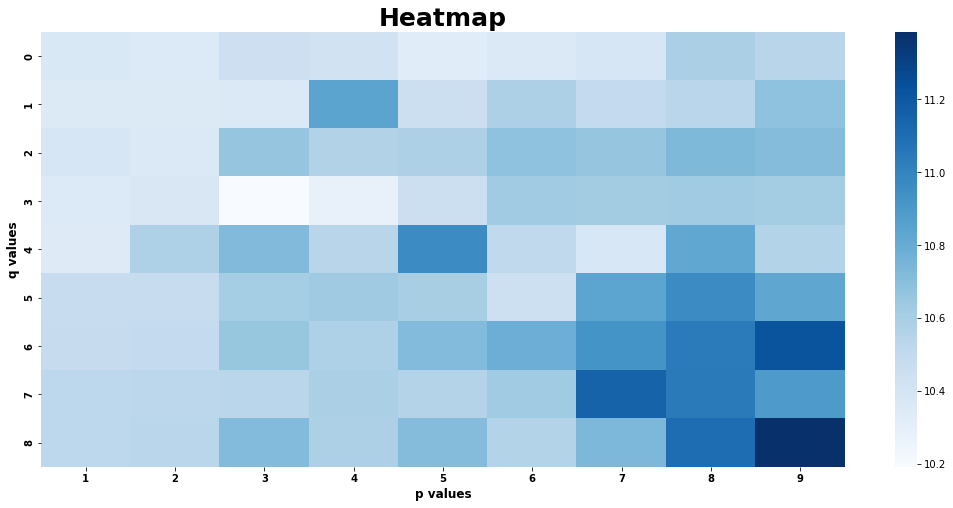

In [ ]:
# create a heatmap of the the p and q values

fig, ax = plt.subplots(figsize = (18, 8))
sns.heatmap(mae_df, cmap = "Blues")

plt.xlabel("p values", fontsize = 12, fontweight = 'bold')
plt.ylabel("q values", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("Heatmap", fontsize = 25, fontweight = 'bold')

plt.show()

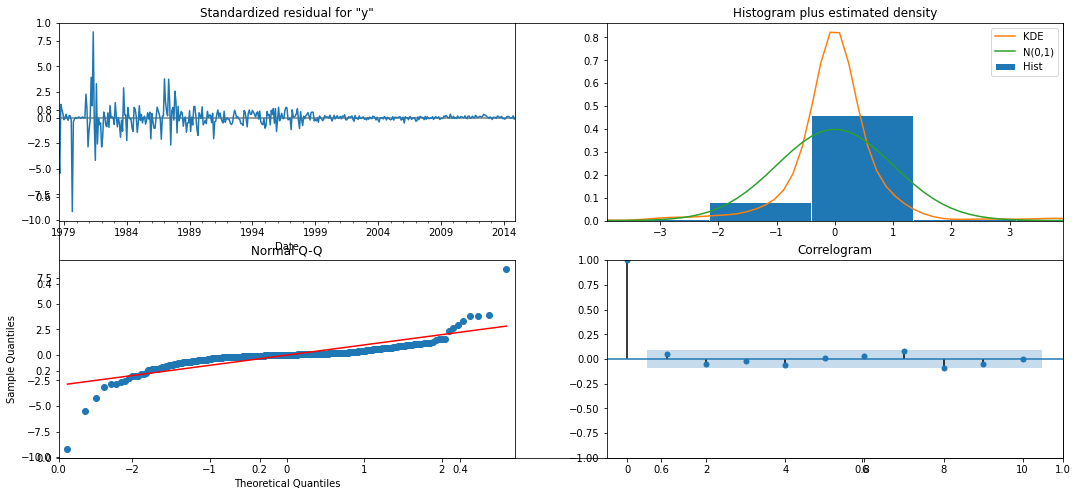

In [ ]:
# Train model
arima_model = ARIMA(y_train, order = (2, 1, 3)).fit() 

# create a diagnostic plot for best model

fig, ax = plt.subplots(figsize = (18, 8))
arima_model.plot_diagnostics(fig=fig)

plt.show()

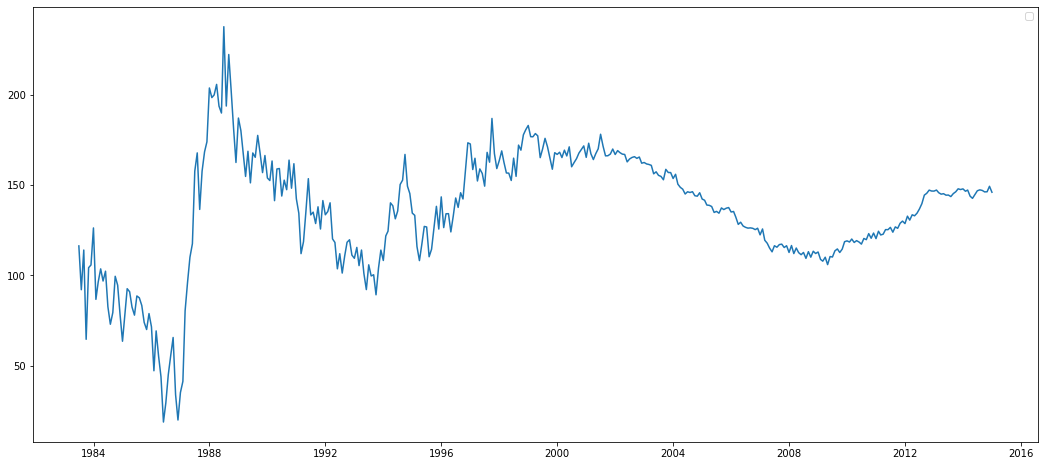

In [ ]:
ar_model.plot_predict(dynamic=False)
plt.show();

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  438
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1943.678
Date:                Thu, 18 Aug 2022   AIC                           3899.357
Time:                        07:50:52   BIC                           3923.836
Sample:                    07-31-1978   HQIC                          3909.017
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4854      0.022    -21.799      0.000      -0.529      -0.442
ar.L2         -0.9725      0.016    -59.268      0.000      -1.005      -0.940
ma.L1          0.0748      0.041      1.830      0.067      -0.005       0.155
ma.L2          0.8213      0.055     15.036      0.000       0.714       0.928
ma.L3         -0.3740      0.040     -9.447      0.000      -0.452      -0.296
sigma2       425.1135     20.620     20.616      0.000     384.698     465.529
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):             17068.24
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_model = pm.auto_arima(y_train, start_p = 1, start_q = 1,
                             test = 'adf', 
                             max_p = 5, max_q = 5,
                             start_P = 0,
                             max_d = 2,
                             seasonal = 12,
                             d = None,
                             D = 1,
                             trace = True,
                             error_action = 'ignore',
                             suppress_warnings = True,
                             stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3911.150, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4478.070, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3947.985, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4210.713, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5596.255, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3912.730, Time=0.48 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3912.603, Time=0.51 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4120.011, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3920.133, Time=0.33 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3911.004, Time=0.77 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3912.953, Time=1.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3912.948, Time=0.91 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3913.424, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3912.911, Time=0.40 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept

In [ ]:
auto_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (4, 0, 4),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [ ]:
best_params = auto_model.get_params()
best_model = ARIMA(y_train, order = best_params['order'], seasonal_order = best_params['seasonal_order'], trend = best_params['trend']).fit()

In [ ]:
y_pred = best_model.predict()

# Calculate training MAE
mae = mean_absolute_error(y_train, y_pred)

# Print mae
mae

10.283641187370089

## Supervised Models

In [ ]:
data_6 = data_5.drop(['Water', 'Date', 'Month', 'Year'], axis = 1)

In [ ]:
data_6.head()

Gas
0  5601
1  3670
2  1721
3  3303
4   167

In [ ]:
def lag_features(data, column, no):
    for i in range(no):
        data['Lag' + str(i + 1)] = data[column].shift(i + 1)
    return data

In [ ]:
data_6 = lag_features(data_6, 'Gas', 21)
data_6.head(3)

Gas    Lag1    Lag2  Lag3  Lag4  Lag5  Lag6  Lag7  Lag8  Lag9  ...  Lag12  \
0  5601     NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
1  3670  5601.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
2  1721  3670.0  5601.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   

   Lag13  Lag14  Lag15  Lag16  Lag17  Lag18  Lag19  Lag20  Lag21  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[3 rows x 22 columns]

In [ ]:
data_6.dropna(inplace = True)

In [ ]:
y = data_6['Gas']
X = data_6.drop('Gas', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1551787, 21)
y_train shape: (1551787,)
X_test shape: (387947, 21)
y_test shape: (387947,)


In [ ]:
xgb_model = XGBRegressor()

In [ ]:
xgb_model.fit(X_train, y_train)

[07:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
test_pred = xgb_model.predict(X_test)
error = mean_absolute_error(y_test, test_pred)
print(error)

951.4100637184163


In [ ]:
print(xgb_model.score(X_test,y_test))

0.21251014249519473


# Water Time Series Analysis


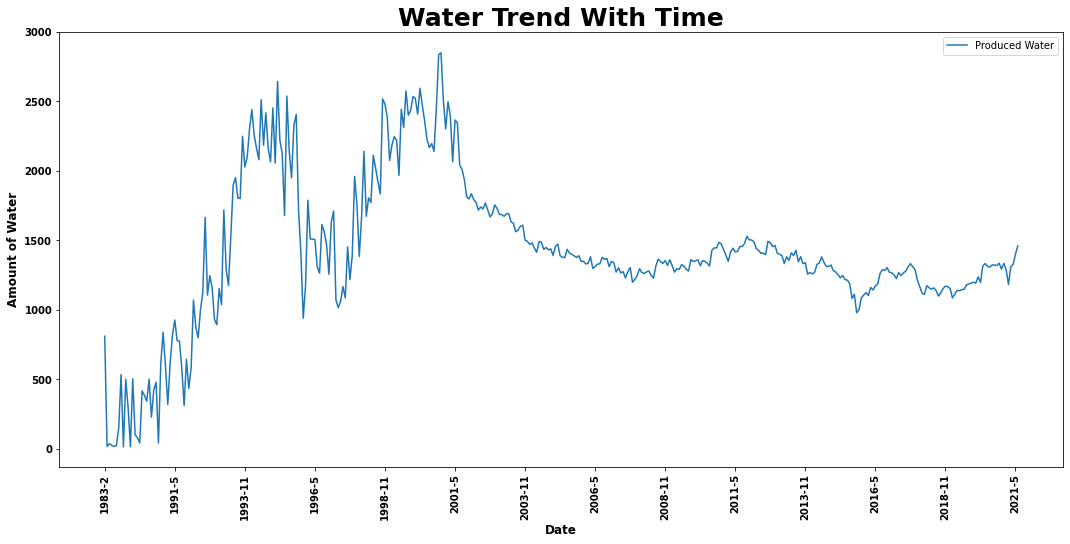

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(data_water_aggregate.index, data_water_aggregate['Water'], label = "Produced Water")
plt.yticks([0,500,1000,1500,2000,2500,3000], fontweight = 'bold')
plt.xticks(range(0,len(data_water_aggregate.index),30),rotation = 'vertical', fontweight = 'bold')
plt.ylabel('Amount of Water', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.title('Water Trend With Time', fontsize = 25, fontweight = 'bold', loc = 'center')
plt.legend(loc = "best")
plt.show()

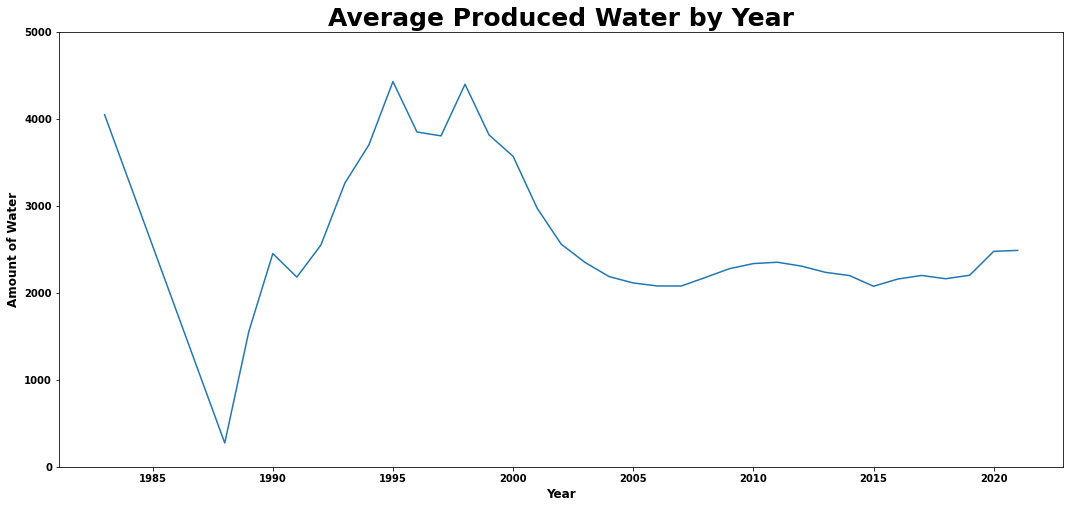

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(data_water.groupby('Year').mean()['Water'].index, data_water.groupby('Year').mean()['Water'])
plt.yticks([0,1000,2000,3000,4000,5000], fontweight = 'bold')
plt.xticks(rotation = 0, fontweight = 'bold')
plt.ylabel('Amount of Water', fontsize = 12, fontweight = 'bold')
plt.xlabel('Year', fontsize = 12, fontweight = 'bold')
plt.title('Average Produced Water by Year', fontsize = 25, fontweight = 'bold', loc = 'center')
plt.show()

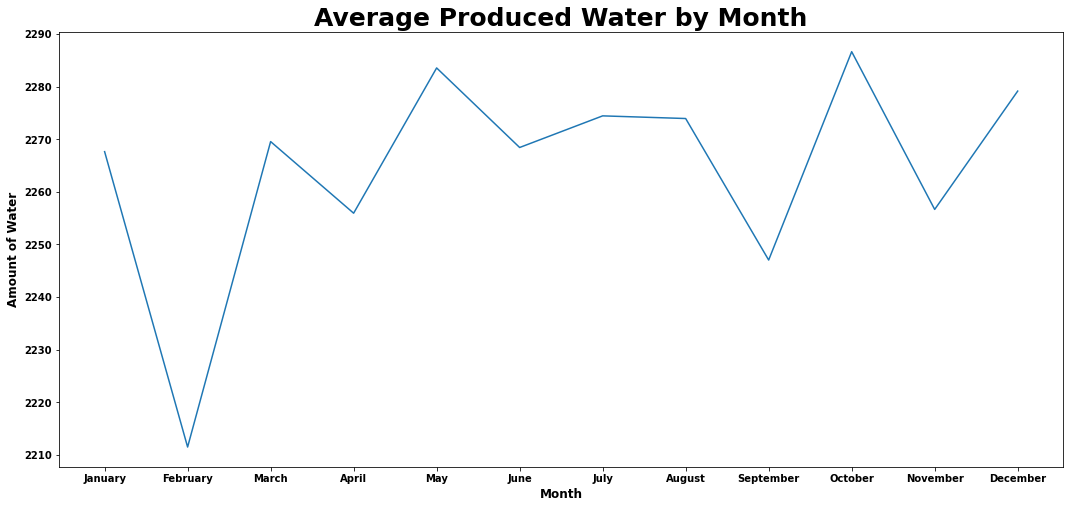

In [ ]:
month_name = list(calendar.month_name)[1:]
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(month_name, data_water.groupby('Month').mean()['Water'])
plt.yticks(fontweight = 'bold')
plt.xticks(month_name,rotation = 0, fontweight = 'bold')
plt.ylabel('Amount of Water', fontsize = 12, fontweight = 'bold')
plt.xlabel('Month', fontsize = 12, fontweight = 'bold')
plt.title('Average Produced Water by Month', fontsize = 25, fontweight = 'bold', loc = 'center')
plt.show()

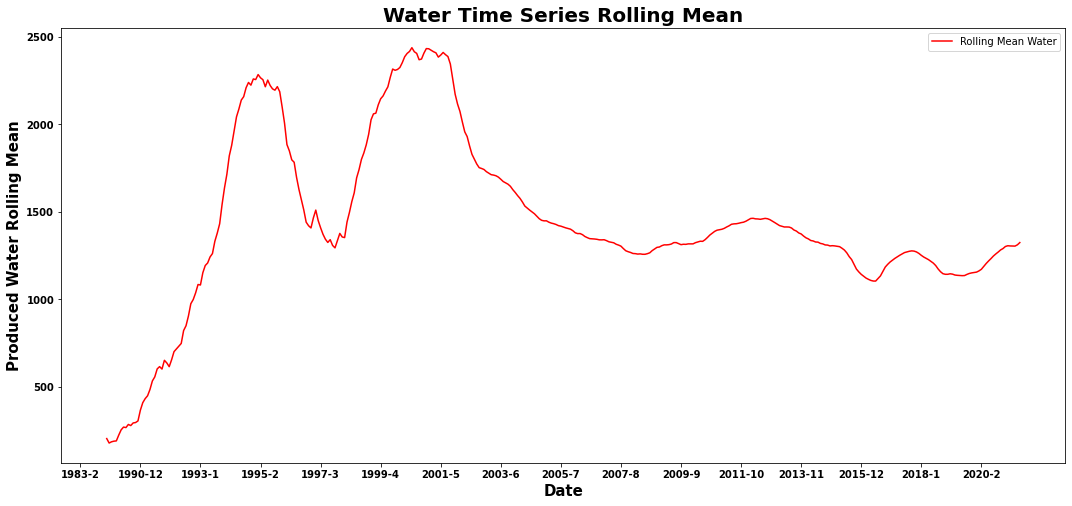

In [ ]:
# plot the rolling average of Water using a window size of the no of months in a year

rolling_mean_water = data_water_aggregate["Water"].rolling(12).mean()
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(rolling_mean_water, color = "red", label = "Rolling Mean Water")
plt.ylabel('Produced Water Rolling Mean',fontsize = 15, fontweight = 'bold')
plt.xlabel('Date', fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(range(0,len(data_water_aggregate['Water']),25), fontweight = 'bold', rotation = 0)
plt.title("Water Time Series Rolling Mean", fontsize = 20, fontweight = 'bold')
plt.legend(loc = "best")
plt.show()

In [ ]:
def viz_years(mask,title,ax,df_to_use,index):
    sns.lineplot(x = df_to_use[mask].index,y = df_to_use[mask], label = 'Production',ax=ax, color = 'blue')

    z = np.polyfit(range(0,len(df_to_use[mask].index)), df_to_use[mask], 1)
    p = np.poly1d(z)
    sns.lineplot(x = range(0,len(df_to_use[mask].index)),y = p(range(0,len(df_to_use[mask].index))),color = 'red',linestyle ='--', linewidth = 3, label = 'Trendline', ax = ax)

    ax.set_xticks(range(0,len(df_to_use[mask].index),index))
    ax.set_xticklabels(df_to_use[mask].index,rotation=90)
    ax.set_ylabel('Amount of Water', fontsize = 15, fontweight = 'bold')
    ax.set_xlabel('Date', fontsize = 15, fontweight = 'bold')
    ax.set_title(("{}").format(title), fontsize = 20, fontweight = 'bold')
    ax.legend(loc = 'best', fontsize = 14, title = 'Plot', title_fontsize= 15, markerfirst = True, fancybox = True)

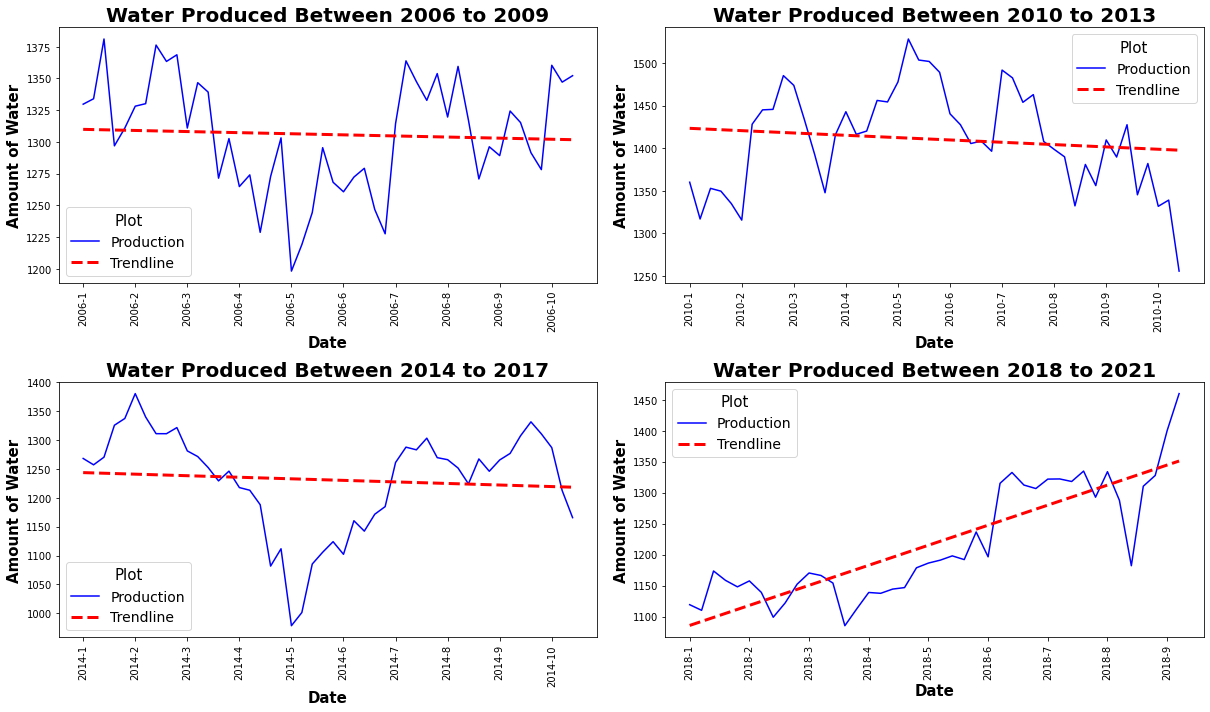

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (17,10))
years = {1:[2006,2009,ax[0,0]], 2:[2010,2013,ax[0,1]], 3:[2014,2017,ax[1,0]], 4:[2018,2021,ax[1,1]]}
for i in years.keys():
  mask = (data_water_aggregate["Year"] >= years[i][0]) & (data_water_aggregate["Year"] <= years[i][1])
  viz_years(mask,('Water Produced Between {} to {}').format(years[i][0],years[i][1]),years[i][2],data_water_aggregate['Water'],5)
plt.tight_layout()

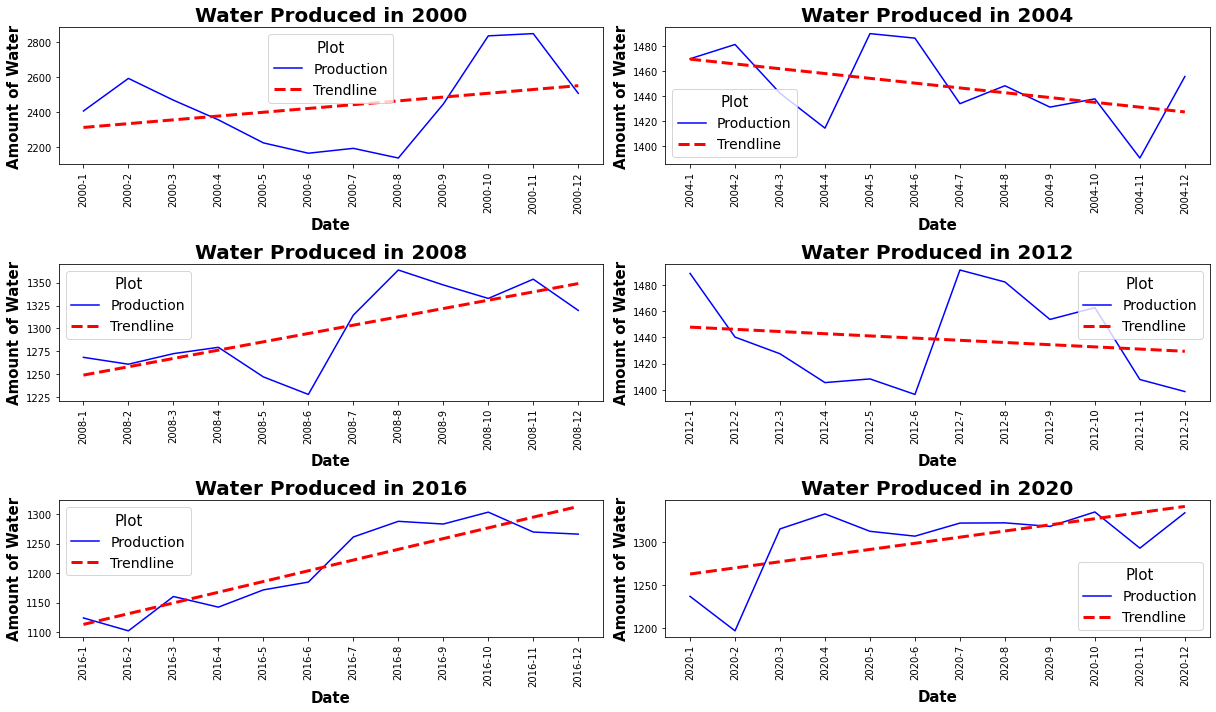

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (17,10))
years = {1:[2000,ax[0,0]], 2:[2004,ax[0,1]], 3:[2008,ax[1,0]], 4:[2012,ax[1,1]], 5:[2016,ax[2,0]], 6:[2020,ax[2,1]]}
for i in years.keys():
  mask_1 = (data_water_aggregate["Year"] == years[i][0])
  viz_years(mask_1,('Water Produced in {}').format(years[i][0]),years[i][1],data_water_aggregate['Water'],1)
plt.tight_layout()

#Water Series Feature Engineering

In [ ]:
# resample dataframe monthly
data_resampled = (data_water.set_index('Date')).resample('M', convention = 'end').mean().bfill(axis = 0)

# create Gas series
water_data = pd.DataFrame(data_resampled['Water'], index = data_resampled.index)

In [ ]:
water_data.head()

Water
Date              
1983-02-28  4048.0
1983-03-31   200.0
1983-04-30   200.0
1983-05-31   200.0
1983-06-30   200.0

**Test for Autocorrelation**:
Measure of how correlated time series data is at a given point in time with past values

In [ ]:
autocorrelation_lag1 = water_data["Water"].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.8632388539318002


In [ ]:
autocorrelation_lag6 = water_data["Water"].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag12 = water_data["Water"].autocorr(lag=12)
print("Twelve Month Lag: ", autocorrelation_lag12)

autocorrelation_lag36 = water_data["Water"].autocorr(lag=36)
print("Thirty Six Month Lag: ", autocorrelation_lag36)

Six Month Lag:  0.8307519776211557
Twelve Month Lag:  0.818792621064743
Thirty Six Month Lag:  0.6033138856738544


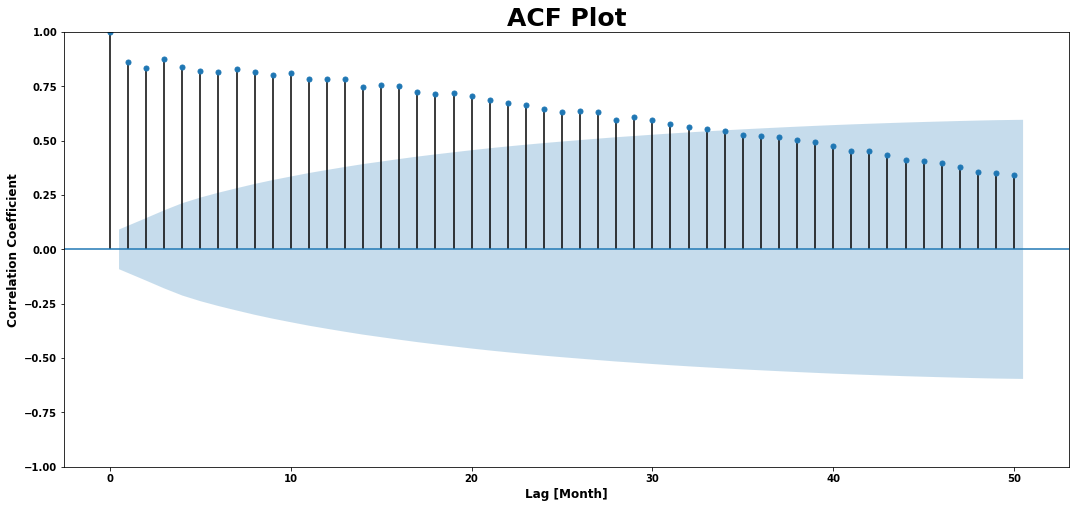

In [ ]:
# create an ACF plot of the Water column to see how present values are correlated with the past

fig, ax = plt.subplots(figsize = (18, 8))
plot_acf(water_data["Water"], ax = ax, lags= 50);

plt.xlabel("Lag [Month]", fontsize = 12, fontweight = 'bold')
plt.ylabel("Correlation Coefficient", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("ACF Plot", fontsize = 25, fontweight = 'bold')

plt.show()

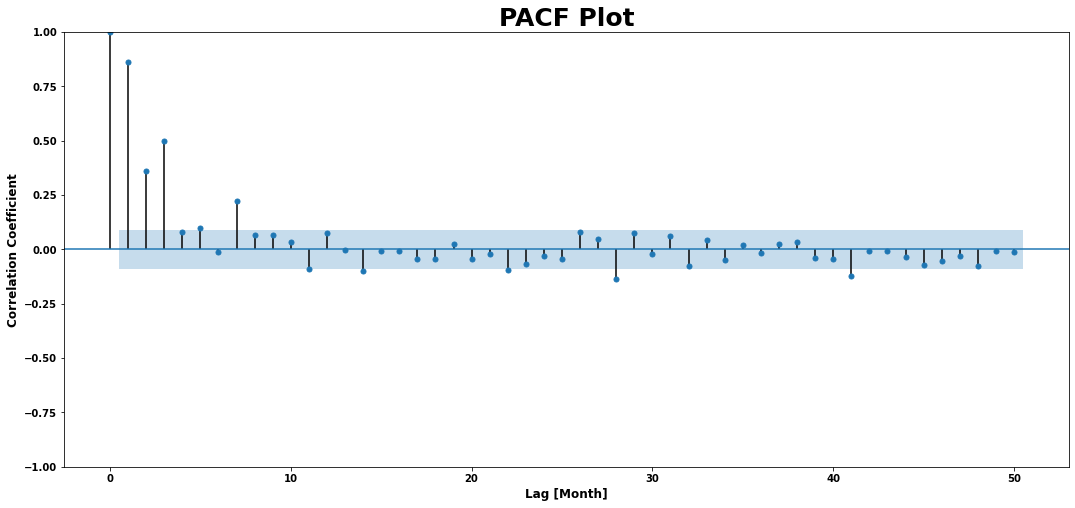

In [ ]:
# create an PACF plot of the Water column to see how present values are correlated with the past

fig, ax = plt.subplots(figsize = (18, 8))
plot_pacf(water_data["Water"], ax = ax, lags = 50);

plt.xlabel("Lag [Month]", fontsize = 12, fontweight = 'bold')
plt.ylabel("Correlation Coefficient", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("PACF Plot", fontsize = 25, fontweight = 'bold')

plt.show()

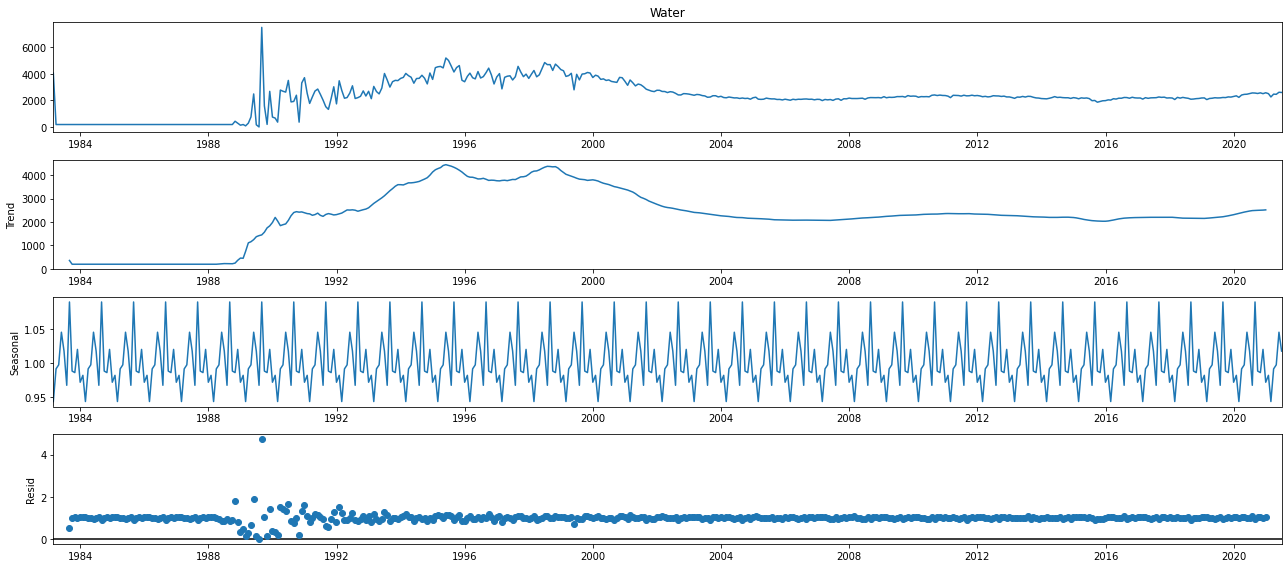

In [ ]:
df = water_data.copy()

# Seasonal decompose
decompose = seasonal_decompose(df['Water'], model='multiplicative', period=12)

decompose.plot()

plt.show()

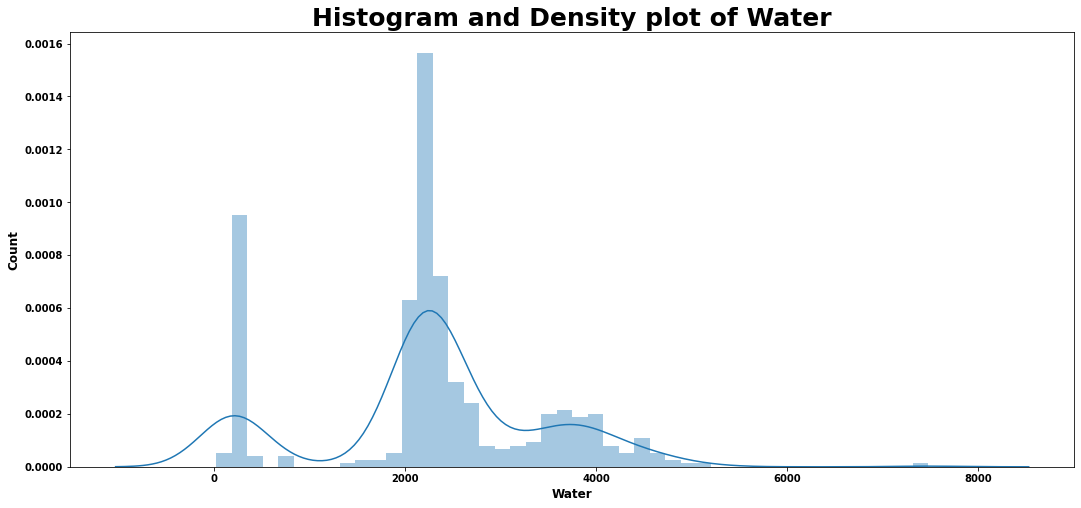

In [ ]:
# plot histogram and density plot of Water Series

fig, ax = plt.subplots(figsize = (18, 8))
sns.distplot(water_data['Water'])

plt.xlabel("Water", fontsize = 12, fontweight = 'bold')
plt.ylabel("Count", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("Histogram and Density plot of Water", fontsize = 25, fontweight = 'bold')

plt.show()

**Test for Stationarity**

In [ ]:
# ADF Test

result = adfuller(water_data['Water'], autolag = 'AIC')
print(f'ADF Statistics: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p_value: {result[1]}')

for key, value in result[4].items():
  print('Critical Values:')
  print(f'   {key}, {value}')

ADF Statistics: -1.8353635648127584
n_lags: 0.3630513162106135
p_value: 0.3630513162106135
Critical Values:
   1%, -3.4449982835447894
Critical Values:
   5%, -2.8679986379826814
Critical Values:
   10%, -2.5702102140862397


In [ ]:
water_log_trans = np.log((water_data['Water']))
water_diff_trans = np.diff(water_data['Water'])
water_diff_trans = np.append([0], water_diff_trans)
water_power_trans = np.sqrt(water_data['Water']).dropna()
water_yeo_trans, lam = yeojohnson(water_data['Water'])
water_boxcox_trans, lam = boxcox(water_data['Water'])

Lambda: 0.897929


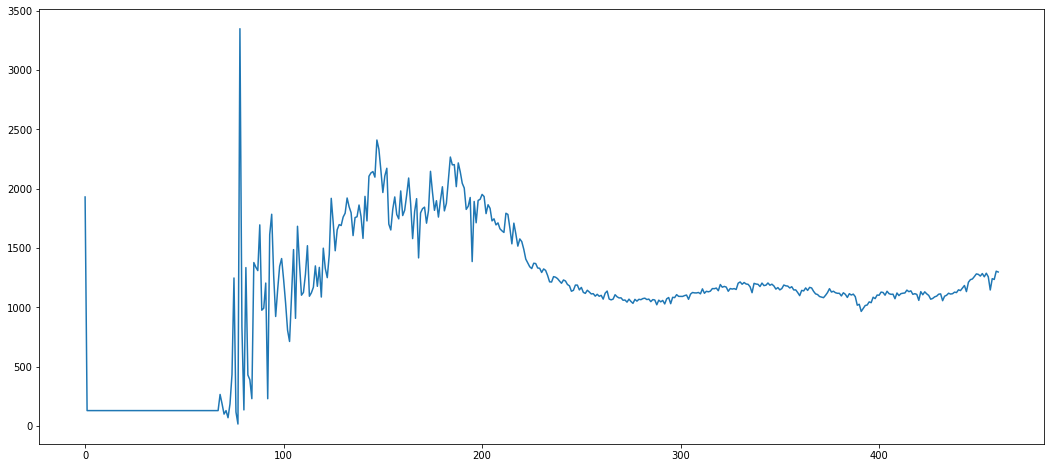

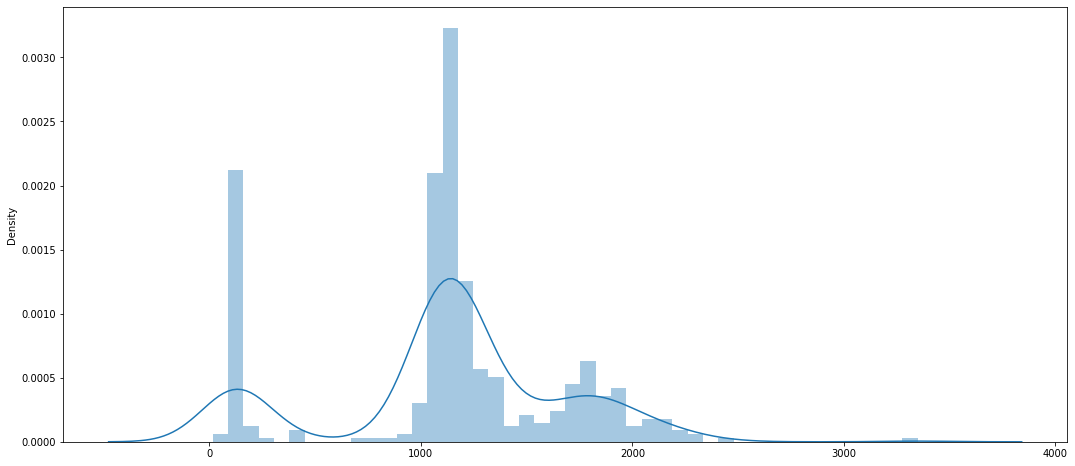

In [ ]:
# Box Cox Transform of Water Series
# set the lambda parameter to None (default) and let the function find a statistically tuned value

boxcox_transform_water, lam = boxcox(water_data['Water'])
print('Lambda: %f' % lam)

# line plot of gas
plt.plot(boxcox_transform_water)
plt.show()

# histogram and density plot of gas
sns.distplot(boxcox_transform_water)
plt.show()

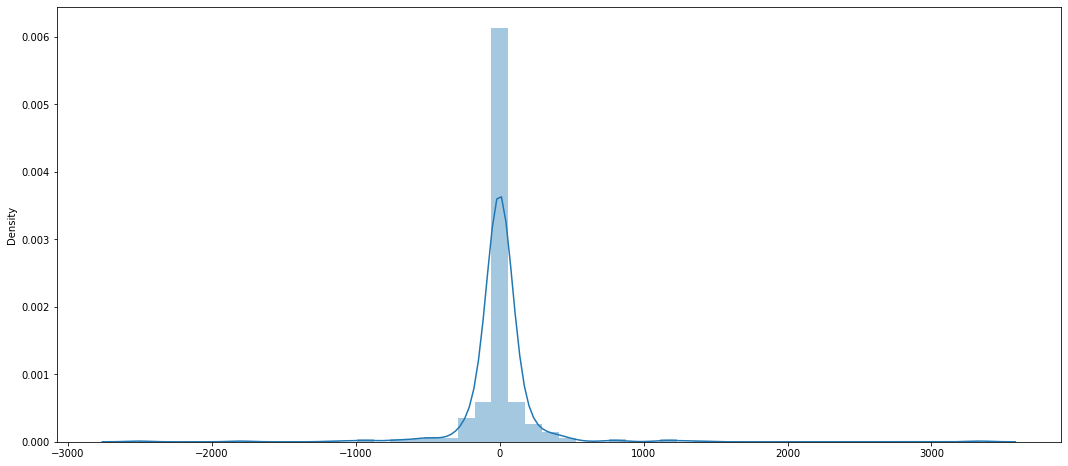

In [ ]:
# difference the dataset

water_transformed = pd.Series(boxcox_transform_water, index = water_data.index)
water_diff = water_transformed.diff()

sns.distplot(water_diff)
plt.show()

In [ ]:
# ADF Test for the square root transformed Water series

result = adfuller(water_log_trans, autolag = 'AIC')
print(f'ADF Statistics: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p_value: {result[1]}')

for key, value in result[4].items():
  print('Critical Values:')
  print(f'   {key}, {value}')

ADF Statistics: -2.7062273647226953
n_lags: 0.07296684833120509
p_value: 0.07296684833120509
Critical Values:
   1%, -3.4451642100030084
Critical Values:
   5%, -2.8680716196949327
Critical Values:
   10%, -2.5702491139112085


In [ ]:
# ADF Test for the differenced square root transformed Water series

result = adfuller(boxcox_transform_water, autolag = 'AIC')
print(f'ADF Statistics: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p_value: {result[1]}')

for key, value in result[4].items():
  print('Critical Values:')
  print(f'   {key}, {value}')

ADF Statistics: -2.0441760165906806
n_lags: 0.2675454504256273
p_value: 0.2675454504256273
Critical Values:
   1%, -3.4450642060791097
Critical Values:
   5%, -2.868027634065253
Critical Values:
   10%, -2.5702256691640515


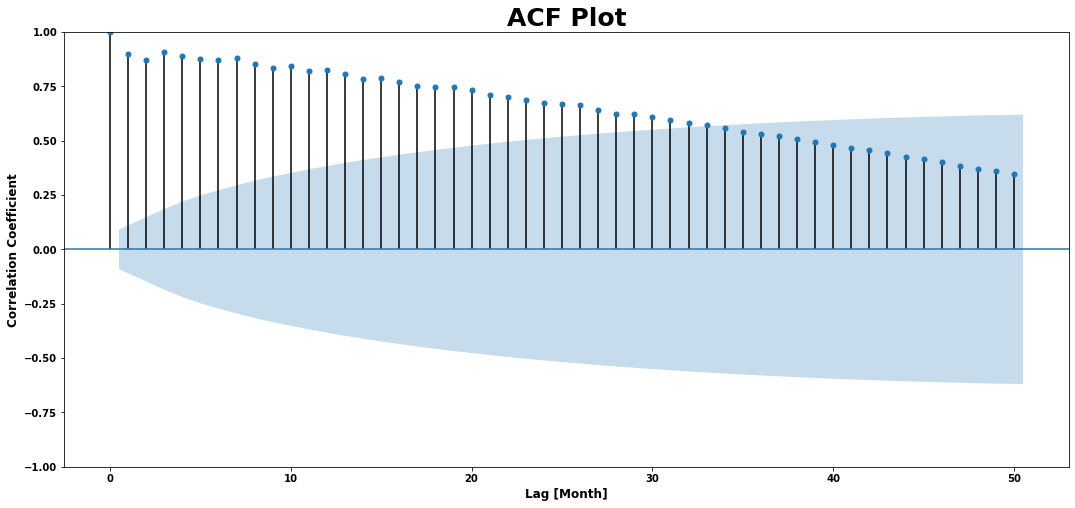

In [ ]:
# create an ACF plot of the square root transformed Water series

fig, ax = plt.subplots(figsize = (18, 8))
plot_acf(water_log_trans, ax = ax, lags =50);

plt.xlabel("Lag [Month]", fontsize = 12, fontweight = 'bold')
plt.ylabel("Correlation Coefficient", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("ACF Plot", fontsize = 25, fontweight = 'bold')

plt.show()

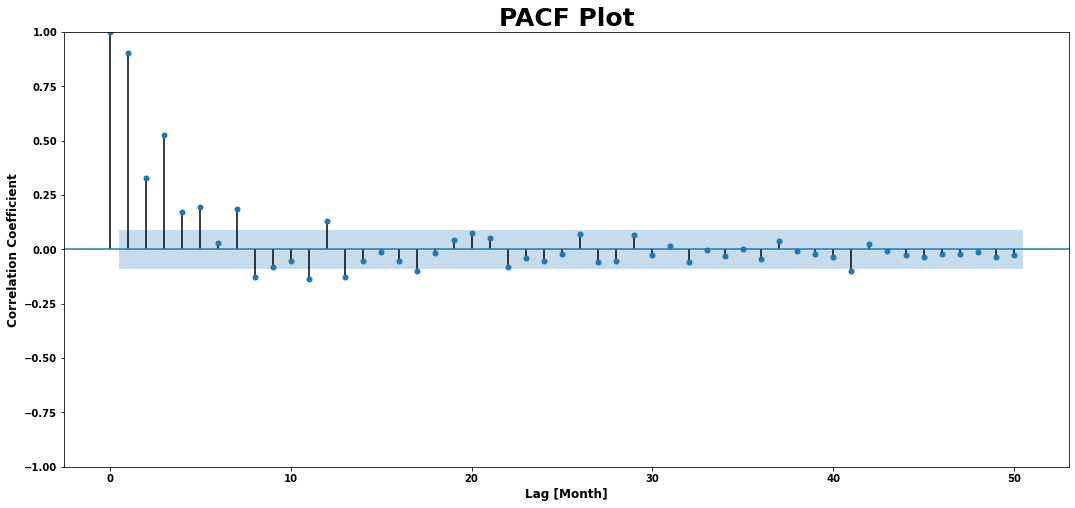

In [ ]:
# create a PACF plot of the square root transformed Water series

fig, ax = plt.subplots(figsize = (18, 8))
plot_pacf(water_log_trans, ax = ax, lags =50);

plt.xlabel("Lag [Month]", fontsize = 12, fontweight = 'bold')
plt.ylabel("Correlation Coefficient", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("PACF Plot", fontsize = 25, fontweight = 'bold')

plt.show()

In [ ]:
#def create_lag_features(y, no_of_lags, df):
 #   
 ##   for l in range(1, no_of_lags + 1):
  #      df[f"water_lag_{l}"] = y.shift(l)
  #  return df

In [ ]:
#water_lag_features = create_lag_features(data_water_aggregate["Water"], 10, data_water_aggregate)
#water_lag_features

In [ ]:
#fig, ax = #plt.subplots(figsize = (18,8))
#sns.regplot(data_water_aggregate['Water'], data_water_aggregate['water_lag_1'], scatter_kws = dict(alpha = 0.75, s = 3), line_kws = dict(color = 'C3'), lowess = True)

#plt.yticks(fontweight = 'bold')
#plt.xticks(fontweight = 'bold', rotation = 'vertical')
#plt.ylabel('Lag', fontsize = 15, fontweight = 'bold')
#plt.xlabel('Water', fontsize = 15, fontweight = 'bold')
#plt.title("Water vs Water Lag (1)", fontsize = 20, fontweight = 'bold')

#plt.show()

In [ ]:
#fig, ax = #plt.subplots(figsize = (18,8))
#sns.regplot(data_water_aggregate['Water'], data_water_aggregate['water_lag_10'], scatter_kws = dict(alpha = 0.75, s = 3), line_kws = dict(color = 'C3'), lowess = True)
#
#plt.yticks(fontweight = 'bold')
#plt.xticks(fontweight = 'bold', rotation = 'vertical')
#plt.ylabel('Lag', fontsize = 15, fontweight = 'bold')
#plt.xlabel('Water', fontsize = 15, fontweight = 'bold')
#plt.title("Water vs Water Lag (10)", fontsize = 20, fontweight = 'bold')

#plt.show()

Stationarity describes that the time-series has:


*   constant mean and mean is not time-dependent
*   constant variance and variance is not time-dependent
*   constant covariance and covariance is not time-dependent





**Augmented Dickey-Fuller (ADF)** test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

**Null Hypothesis (H0)**: Time series has a unit root. (Time series is not stationary).

**Alternate Hypothesis (H1)**: Time series has no unit root (Time series is stationary).

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

p-value > significance level (default: 0.05): non-stationary.
p-value <= significance level (default: 0.05): stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

ADF statistic > critical value: non-stationary.
ADF statistic < critical value: stationary.

Adfuller Test Statistic < Critical Value(5%) and p-value < 0.05. As a result, we will accept the Null hypothesis in favor of an Alternative. Hence the Gas series and Water series are stationary according to the Adfuller test


ADF concludes stationary and KPSS concludes non-stationary – The series is difference stationary. Differencing is to be used to make series stationary. Then the differenced series is checked for stationarity.

In [ ]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test 
## a type of Unit root test that tests for the stationarity of a given series around a deterministic trend

# Null Hypothesis (HO): Series is trend stationary or series has no unit root
# Alternate Hypothesis(HA): Series is non-stationary or series has a unit root
# significance level: 0.05

# Conditions to Fail to Reject Null Hypothesis(HO)
## If Test statistic < Critical Value and p-value > 0.05 (i.e., time series does not have a unit root, meaning it is trend stationary)

# Conditions to to Reject Null Hypothesis(HO)
## If Test statistic > Critical Value and p-value < 0.05 (i.e., time series has a unit root, meaning it is not trend stationary)

#def kpss_test(timeseries):
 #   print ('Results of KPSS Test:')
 #   kpsstest = kpss(timeseries, regression='c')
 #   kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
 #   for key, value in kpsstest[3].items():
 #       kpss_output['Critical Value (%s)'%key] = value
 #   print (kpss_output)

#Water Series Modelling


In [ ]:
water_log_trans = np.log((water_data['Water']))
water_diff_trans = np.diff(water_data['Water'])
water_diff_trans = np.append([0], water_diff_trans)
water_power_trans = np.sqrt(water_data['Water']).dropna()
water_yeo_trans, lam = yeojohnson(water_data['Water'])
water_boxcox_trans, lam = boxcox(water_data['Water'])
water_trans = {'Log Transform':water_log_trans,'Difference Transform':water_diff_trans,'Power Transform':water_power_trans,'Yeo-Johnson Transform':water_yeo_trans,'Boxcox Transform':water_boxcox_trans}

Log Transform
ADF Statistics: -2.7062273647226953
n_lags: 0.07296684833120509
p_value: 0.07296684833120509
Critical Values:
   1%, -3.4451642100030084
Critical Values:
   5%, -2.8680716196949327
Critical Values:
   10%, -2.5702491139112085
Mean Gas: 7.39
Baseline MAE: 0.8
Performing stepwise search to minimize aic
 ARIMA(7,1,7)(0,0,0)[0] intercept   : AIC=275.271, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=557.655, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=507.398, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=373.731, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=555.659, Time=0.02 sec
 ARIMA(6,1,7)(0,0,0)[0] intercept   : AIC=280.280, Time=2.92 sec
 ARIMA(7,1,6)(0,0,0)[0] intercept   : AIC=275.109, Time=2.55 sec
 ARIMA(6,1,6)(0,0,0)[0] intercept   : AIC=279.880, Time=2.37 sec
 ARIMA(7,1,5)(0,0,0)[0] intercept   : AIC=278.915, Time=2.37 sec
 ARIMA(8,1,6)(0,0,0)[0] intercept   : AIC=281.082, Time=3.04 sec
 ARIMA(6,1,5)(0,0,0)[0] intercept 

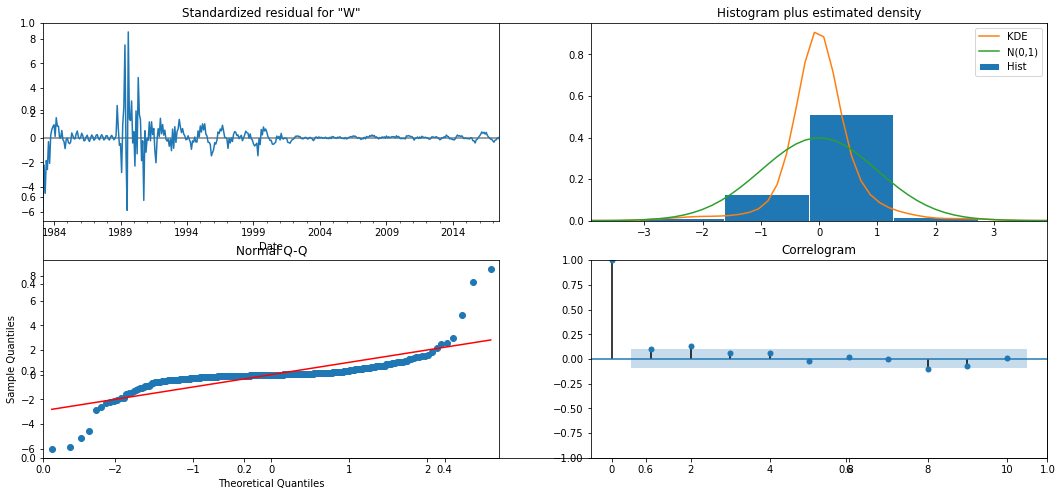

Difference Transform
ADF Statistics: -9.184440009509293
n_lags: 2.2070158702405975e-15
p_value: 2.2070158702405975e-15
Critical Values:
   1%, -3.444965543297668
Critical Values:
   5%, -2.8679842369272976
Critical Values:
   10%, -2.5702025382716047
Mean Gas: -4.44
Baseline MAE: 232.75
Performing stepwise search to minimize aic
 ARIMA(7,0,7)(0,0,0)[0]             : AIC=6367.474, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6550.171, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6491.915, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6408.345, Time=0.07 sec
 ARIMA(6,0,7)(0,0,0)[0]             : AIC=6366.060, Time=2.24 sec
 ARIMA(5,0,7)(0,0,0)[0]             : AIC=inf, Time=2.14 sec
 ARIMA(6,0,6)(0,0,0)[0]             : AIC=6366.447, Time=2.06 sec
 ARIMA(6,0,8)(0,0,0)[0]             : AIC=6364.708, Time=2.19 sec
 ARIMA(5,0,8)(0,0,0)[0]             : AIC=6362.815, Time=2.15 sec
 ARIMA(4,0,8)(0,0,0)[0]             : AIC=6361.252, Time=2.22 sec
 ARIMA(3,0,8)(

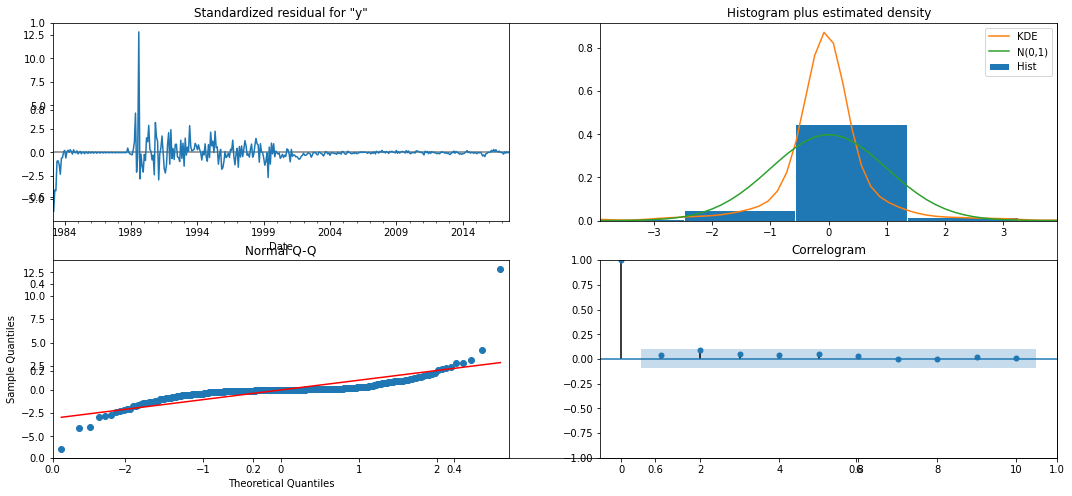

Power Transform
ADF Statistics: -2.370174344597275
n_lags: 0.15033200546035685
p_value: 0.15033200546035685
Critical Values:
   1%, -3.4451642100030084
Critical Values:
   5%, -2.8680716196949327
Critical Values:
   10%, -2.5702491139112085
Mean Gas: 44.78
Baseline MAE: 11.91
Performing stepwise search to minimize aic
 ARIMA(7,1,7)(0,0,0)[0] intercept   : AIC=2596.369, Time=2.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2828.323, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2771.690, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2657.052, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2826.336, Time=0.02 sec
 ARIMA(6,1,7)(0,0,0)[0] intercept   : AIC=2594.465, Time=2.70 sec
 ARIMA(5,1,7)(0,0,0)[0] intercept   : AIC=2593.117, Time=2.51 sec
 ARIMA(4,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(5,1,6)(0,0,0)[0] intercept   : AIC=2605.730, Time=2.25 sec
 ARIMA(5,1,8)(0,0,0)[0] intercept   : AIC=2589.498, Time=2.41 sec
 ARIMA(4,1,8)(0,0,0)[0] i

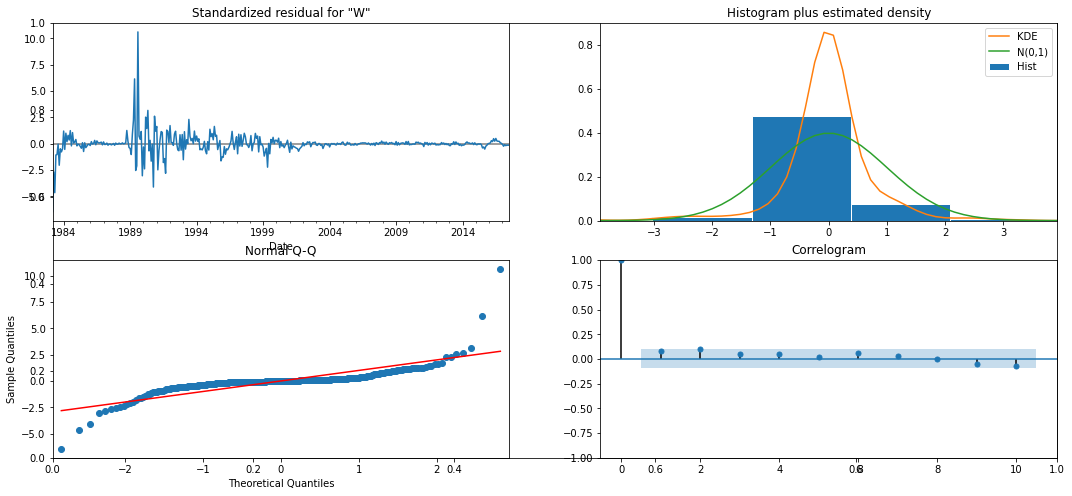

Yeo-Johnson Transform
ADF Statistics: -2.0438765807480537
n_lags: 0.26767208318399693
p_value: 0.26767208318399693
Critical Values:
   1%, -3.4450642060791097
Critical Values:
   5%, -2.868027634065253
Critical Values:
   10%, -2.5702256691640515
Mean Gas: 1131.53
Baseline MAE: 417.88
Performing stepwise search to minimize aic
 ARIMA(7,1,7)(0,0,0)[0] intercept   : AIC=5671.576, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5883.425, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5819.165, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5711.070, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5881.444, Time=0.02 sec
 ARIMA(6,1,7)(0,0,0)[0] intercept   : AIC=5669.952, Time=2.74 sec
 ARIMA(5,1,7)(0,0,0)[0] intercept   : AIC=5668.471, Time=2.56 sec
 ARIMA(4,1,7)(0,0,0)[0] intercept   : AIC=5669.082, Time=2.43 sec
 ARIMA(5,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(5,1,8)(0,0,0)[0] intercept   : AIC=5661.770, Time=2.76 sec
 ARIMA(4,1,8)(0,

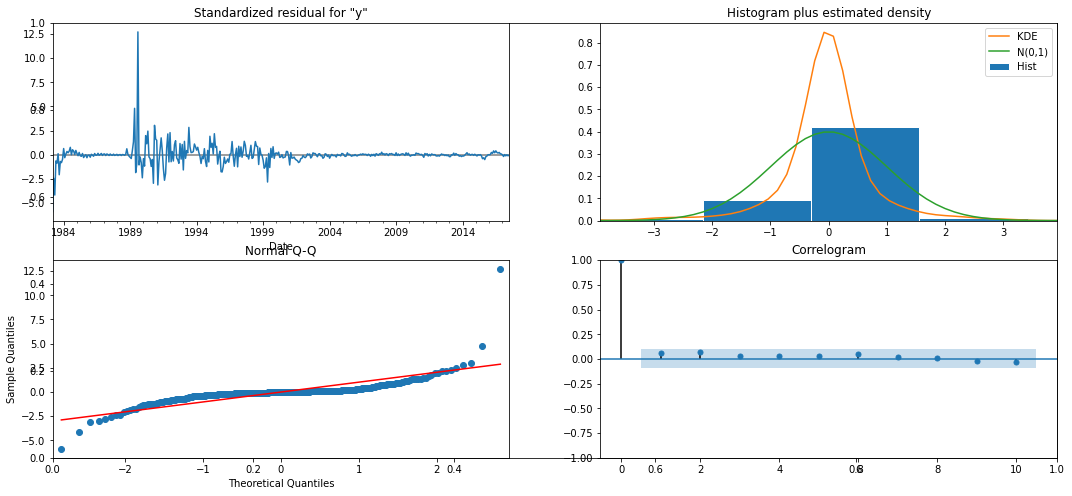

Boxcox Transform
ADF Statistics: -2.0441760165906806
n_lags: 0.2675454504256273
p_value: 0.2675454504256273
Critical Values:
   1%, -3.4450642060791097
Critical Values:
   5%, -2.868027634065253
Critical Values:
   10%, -2.5702256691640515
Mean Gas: 1127.57
Baseline MAE: 416.5
Performing stepwise search to minimize aic
 ARIMA(7,1,7)(0,0,0)[0] intercept   : AIC=5668.715, Time=6.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5880.581, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5816.341, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5708.242, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5878.600, Time=0.02 sec
 ARIMA(6,1,7)(0,0,0)[0] intercept   : AIC=5666.942, Time=2.92 sec
 ARIMA(5,1,7)(0,0,0)[0] intercept   : AIC=5665.563, Time=2.60 sec
 ARIMA(4,1,7)(0,0,0)[0] intercept   : AIC=5666.204, Time=2.31 sec
 ARIMA(5,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(5,1,8)(0,0,0)[0] intercept   : AIC=5658.993, Time=2.85 sec
 ARIMA(4,1,8)(0,0,0)[0] 

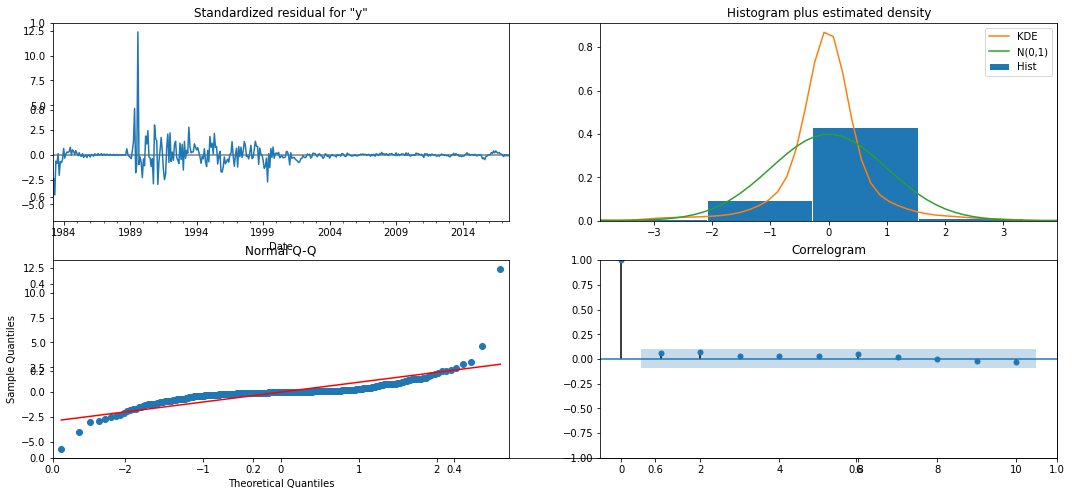

In [ ]:
for i in water_trans.keys():
  print(i)
  result = adfuller(water_trans[i], autolag = 'AIC')
  print(f'ADF Statistics: {result[0]}')
  print(f'n_lags: {result[1]}')
  print(f'p_value: {result[1]}')

  for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')
  y = pd.Series(water_trans[i], index = water_data.index).dropna()
  cutoff_test = int(len(y) * 0.90)
  y_train = y.iloc[:cutoff_test]
  y_test = y.iloc[cutoff_test:]
  y_train_mean = y_train.mean()
  y_pred_baseline = [y_train_mean] * len(y_train)
  mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
  print("Mean Gas:", round(y_train_mean, 2))
  print("Baseline MAE:", round(mae_baseline, 2))
  auto_model = pm.auto_arima(y_train, start_p = 7, start_q = 7,test = 'adf',max_p = 8, max_q = 8,start_P = 0,max_d = 2,seasonal = False,d = None, D = 1,
                             trace = True, error_action = 'ignore',suppress_warnings = True,stepwise = True)
  best_params = auto_model.get_params()
  best_model = ARIMA(y_train, order = best_params['order'], seasonal_order = best_params['seasonal_order'], trend = best_params['trend']).fit()
  print('AIC:',best_model.aic)
  fig, ax = plt.subplots(figsize = (18, 8))
  best_model.plot_diagnostics(fig=fig)
  plt.show()

In [ ]:
# Square root transform Water Series
#transformed_water, lam = boxcox(water_data['Water'])
#water_diff = water_data['Water'].diff().dropna()
# Create Series y for modelling
y = pd.Series(water_log_trans, index = water_data.index).dropna()

In [ ]:
cutoff_test = int(len(y) * 0.90)
y_train = y.iloc[:cutoff_test]
y_test = y.iloc[cutoff_test:]

In [ ]:
y_train.shape, y_test.shape

((414,), (47,))

In [ ]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Gas:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Gas: 7.39
Baseline MAE: 0.8


### AR Model

In [ ]:
# Create dictionary to store MAEs
dict_mae = dict()

# Create a range for possible p values
p_params = [p for p in range(1, 50)]

# Iterate through possible values for `p`
for p in p_params:

  # Create key-value pair in dict
  dict_mae[p] = list()

  # Note start time
  start_time = time.time()
  
  # Train model
  model = AutoReg(y_train, lags = p, old_names = False).fit()

  # Calculate model training time
  elapsed_time = round(time.time() - start_time, 2)
  print(f"Trained AR {p} in {elapsed_time} seconds.")

  # Generate in-sample (training) predictions
  y_pred = model.predict().dropna()

  # Calculate training MAE
  training_mae = mean_absolute_error(y_train[p:], y_pred)
  
  # Append MAE to list in dictionary
  dict_mae[p].append(training_mae)

print()
print(dict_mae)

Trained AR 1 in 0.01 seconds.
Trained AR 2 in 0.0 seconds.
Trained AR 3 in 0.0 seconds.
Trained AR 4 in 0.0 seconds.
Trained AR 5 in 0.0 seconds.
Trained AR 6 in 0.0 seconds.
Trained AR 7 in 0.0 seconds.
Trained AR 8 in 0.0 seconds.
Trained AR 9 in 0.0 seconds.
Trained AR 10 in 0.0 seconds.
Trained AR 11 in 0.0 seconds.
Trained AR 12 in 0.0 seconds.
Trained AR 13 in 0.0 seconds.
Trained AR 14 in 0.0 seconds.
Trained AR 15 in 0.0 seconds.
Trained AR 16 in 0.0 seconds.
Trained AR 17 in 0.01 seconds.
Trained AR 18 in 0.0 seconds.
Trained AR 19 in 0.01 seconds.
Trained AR 20 in 0.01 seconds.
Trained AR 21 in 0.01 seconds.
Trained AR 22 in 0.01 seconds.
Trained AR 23 in 0.01 seconds.
Trained AR 24 in 0.01 seconds.
Trained AR 25 in 0.01 seconds.
Trained AR 26 in 0.01 seconds.
Trained AR 27 in 0.01 seconds.
Trained AR 28 in 0.01 seconds.
Trained AR 29 in 0.01 seconds.
Trained AR 30 in 0.01 seconds.
Trained AR 31 in 0.01 seconds.
Trained AR 32 in 0.01 seconds.
Trained AR 33 in 0.01 seconds.
Tr

In [ ]:
ar_mae_df = pd.DataFrame(dict_mae).T
ar_mae_df.round(4)
ar_mae_df.head(20)

0
1   0.174000
2   0.145619
3   0.123724
4   0.122437
5   0.119255
6   0.120512
7   0.125370
8   0.125174
9   0.122984
10  0.123180
11  0.123611
12  0.122177
13  0.122281
14  0.122372
15  0.121749
16  0.122297
17  0.122260
18  0.121339
19  0.121465
20  0.122252

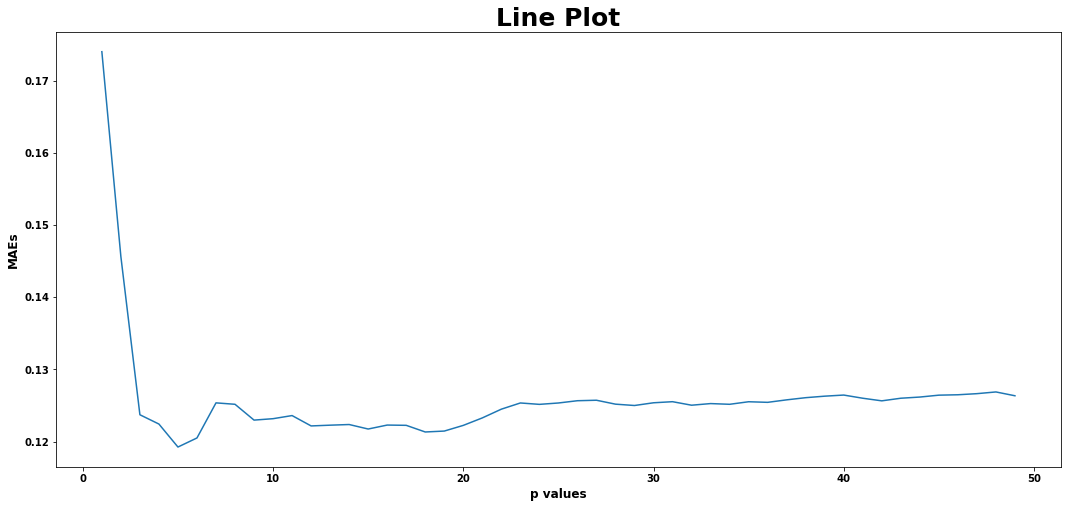

In [ ]:
# create a line plot of the p values

fig, ax = plt.subplots(figsize = (18, 8))
plt.plot(ar_mae_df)

plt.xlabel("p values", fontsize = 12, fontweight = 'bold')
plt.ylabel("MAEs", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("Line Plot", fontsize = 25, fontweight = 'bold')

plt.show()

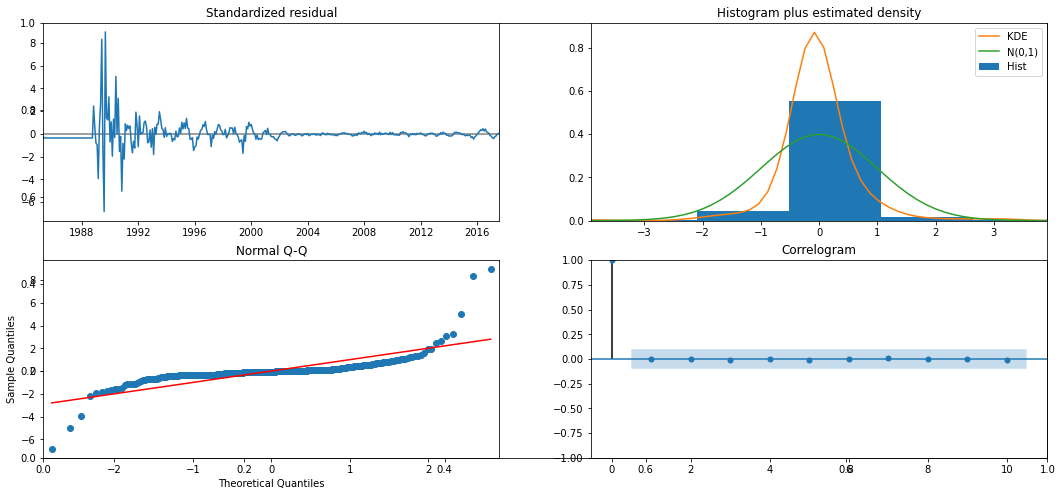

In [ ]:
# Train model
ar_model = model = AutoReg(y_train, lags = 25, old_names = False).fit()

# create a diagnostic plot for best model

fig, ax = plt.subplots(figsize = (18, 8))
ar_model.plot_diagnostics(fig=fig)

plt.show()

In [ ]:
# print model summary
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Water   No. Observations:                  414
Model:                    AutoReg(25)   Log Likelihood                 -64.159
Method:               Conditional MLE   S.D. of innovations              0.285
Date:                Thu, 18 Aug 2022   AIC                            182.318
Time:                        07:59:12   BIC                            289.335
Sample:                    03-31-1985   HQIC                           224.744
                         - 07-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3164      0.121      2.609      0.009       0.079       0.554
Water.L1       0.1411      0.051      2.783      0.005       0.042       0.240
Water.L2      -0.2715      0.051     -5.310      0.000      -0.372      -0.171
Water.L3       0.4033      0.053      7.618      0.000       0.300       0.507
Water.L4       0.1006      0.057      1.778      0.075      -0.010       0.211
Water.L5       0.3489      0.056      6.203      0.000       0.239       0.459
Water.L6       0.1581      0.059      2.687      0.007       0.043       0.273
Water.L7       0.3531      0.059      5.952      0.000       0.237       0.469
Water.L8       0.0860      0.062      1.394      0.163      -0.035       0.207
Water.L9      -0.0395      0.061     -0.646      0.518      -0.159       0.080
Water.L10      0.1450      0.061      2.383      0.017       0.026       0.264
Water.L11     -0.1657      0.061     -2.718      0.007      -0.285      -0.046
Water.L12      0.1996      0.061      3.257      0.001       0.079       0.320
Water.L13     -0.1654      0.062     -2.689      0.007      -0.286      -0.045
Water.L14     -0.0795      0.061     -1.296      0.195      -0.200       0.041
Water.L15     -0.1293      0.061     -2.123      0.034      -0.249      -0.010
Water.L16     -0.1273      0.061     -2.090      0.037      -0.247      -0.008
Water.L17     -0.1914      0.061     -3.128      0.002      -0.311      -0.071
Water.L18     -0.0858      0.061     -1.401      0.161      -0.206       0.034
Water.L19      0.0386      0.059      0.651      0.515      -0.078       0.155
Water.L20      0.0883      0.058      1.516      0.130      -0.026       0.202
Water.L21      0.1705      0.056      3.037      0.002       0.060       0.281
Water.L22     -0.0015      0.056     -0.027      0.979      -0.111       0.108
Water.L23      0.0353      0.052      0.677      0.498      -0.067       0.138
Water.L24     -0.0336      0.051     -0.661      0.508      -0.133       0.066
Water.L25     -0.0180      0.045     -0.403      0.687      -0.105       0.069
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1301           -0.1098j            1.1355           -0.4846
AR.2            -1.1301           +0.1098j            1.1355            0.4846
AR.3            -0.9365           -0.5552j            1.0887           -0.4148
AR.4            -0.9365           +0.5552j            1.0887            0.4148
AR.5            -0.8429           -0.6882j            1.0881           -0.3910
AR.6            -0.8429           +0.6882j            1.0881            0.3910
AR.7            -0.5089           -0.9802j            1.1044           -0.3262
AR.8            -0.5089           +0.9802j            1.1044            0.3262
AR

In [ ]:
y_test.index.min(), y_test.index.max()

(Timestamp('2017-08-31 00:00:00', freq='M'),
 Timestamp('2021-06-30 00:00:00', freq='M'))

In [ ]:
y_pred = ar_model.predict(y_train.index.min(),y_train.index.max()).dropna()

In [ ]:
df_pred_train = pd.DataFrame(
    {"y_train": y_train, "y_pred": y_pred}, index=y_train.index)

In [ ]:
df_pred_train.dropna(inplace=True)

In [ ]:
df_pred_train.head()

y_train    y_pred
Date                          
1985-03-31  5.298317  5.347599
1985-04-30  5.298317  5.401611
1985-05-31  5.298317  5.401611
1985-06-30  5.298317  5.401611
1985-07-31  5.298317  5.401611

In [ ]:
fig = px.line(df_pred_train, labels={"value": "Water"})
fig.show();

In [ ]:
# calculate test mean absolute error for model
y_pred_test = ar_model.predict(y_test.index.min(), y_test.index.max())
test_mae = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", test_mae)

Test MAE: 0.04148931321743575


In [ ]:
# create datafrane for the true values of the test set and model's predictions
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_test}, index=y_test.index)

In [ ]:
df_pred_test.head(6)

y_test    y_pred
Date                          
2017-08-31  7.724651  7.688972
2017-09-30  7.711574  7.662471
2017-10-31  7.718657  7.691750
2017-11-30  7.689611  7.689730
2017-12-31  7.694911  7.673632
2018-01-31  7.688968  7.693356

In [ ]:
# create a time series plot for the values in test_predictions using plotly express
fig = px.line(df_pred_test, labels={"value": "Water"})
fig.show();

In [ ]:
# perform walk-forward validation for the model for the entire test set y_test
y_pred_wfv = pd.Series()
history = y_train.copy()

for i in range(len(y_test)):
    r = AutoReg(history, 21, old_names = False).fit()

    next_pred = r.forecast()

    # store the model's predictions in the Series y_pred_wfv
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

In [ ]:
y_train.shape, history.shape

((414,), (461,))

In [ ]:
y_pred_wfv.head()

2017-08-31    7.692885
2017-09-30    7.670814
2017-10-31    7.687806
2017-11-30    7.696350
2017-12-31    7.687519
Freq: M, dtype: float64

In [ ]:
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 0.03


In [ ]:
# 
test1_predictions = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_wfv}, index = y_test.index)
fig = px.line(test1_predictions)
fig.show()

In [ ]:
# perform walk-forward validation for the model for the rest for the rest of 2021 and 2022

#future_pred_wfv = pd.Series()
#past_dates = history.copy()
#future_dates = pd.date_range(start = "2021-07-01", end = "2022-12-31").to_pydatetime().tolist()

#for date in future_dates:
 #   r = AutoReg(past_dates, 21, old_names = False).fit()

  #  next_pred = r.forecast()

    # store the model's predictions in the Series future_pred_wfv
   # future_pred_wfv = future_pred_wfv.append(next_pred)
    #past_dates = past_dates.append(pd.Series([next_pred], index = [date]))

In [ ]:
x = pd.Series()

date = "2017-03-31"

forecat = 234
series = pd.Series([forecat], index = [date])
x = x.append(series)
x

2017-03-31    234
dtype: int64

In [ ]:
#y_test[next_pred.index]

### ARIMA Model

In [ ]:
# Create ranges for possible p and q values
p_params = [p for p in range(1, 7, 1)]
q_params = [q for q in range(1, 7, 1)]

# Create dictionary to store MAEs
mae_grid = dict()

# Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict
    mae_grid[p] = list()

    # Iterate through possible values for `q`
    for q in q_params:
        # Combine hyperparameters for model
        order = (p, 1, q)

        # Note start time
        start_time = time.time()

        # Train model
        model = ARIMA(y_train, order=order).fit()

        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")

        # Generate in-sample (training) predictions
        y_pred = model.predict()

        # Calculate training MAE
        mae = mean_absolute_error(y_train, y_pred)
        
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)

Trained ARIMA (1, 1, 1) in 0.14 seconds.
Trained ARIMA (1, 1, 2) in 0.15 seconds.
Trained ARIMA (1, 1, 3) in 0.25 seconds.
Trained ARIMA (1, 1, 4) in 0.53 seconds.
Trained ARIMA (1, 1, 5) in 0.58 seconds.
Trained ARIMA (1, 1, 6) in 0.63 seconds.
Trained ARIMA (2, 1, 1) in 0.17 seconds.
Trained ARIMA (2, 1, 2) in 0.28 seconds.
Trained ARIMA (2, 1, 3) in 0.4 seconds.
Trained ARIMA (2, 1, 4) in 0.83 seconds.
Trained ARIMA (2, 1, 5) in 1.14 seconds.
Trained ARIMA (2, 1, 6) in 1.03 seconds.
Trained ARIMA (3, 1, 1) in 0.28 seconds.
Trained ARIMA (3, 1, 2) in 0.37 seconds.
Trained ARIMA (3, 1, 3) in 0.51 seconds.
Trained ARIMA (3, 1, 4) in 0.97 seconds.
Trained ARIMA (3, 1, 5) in 1.03 seconds.
Trained ARIMA (3, 1, 6) in 1.56 seconds.
Trained ARIMA (4, 1, 1) in 0.26 seconds.
Trained ARIMA (4, 1, 2) in 0.41 seconds.
Trained ARIMA (4, 1, 3) in 0.77 seconds.
Trained ARIMA (4, 1, 4) in 1.06 seconds.
Trained ARIMA (4, 1, 5) in 1.44 seconds.
Trained ARIMA (4, 1, 6) in 1.61 seconds.
Trained ARIMA (5,

In [ ]:
mae_grid_df = pd.DataFrame(mae_grid).T
mae_grid_df.round(4)
mae_grid_df.head(20)

0         1         2         3         4         5
1  0.150717  0.146490  0.162159  0.161227  0.160061  0.162932
2  0.146047  0.147435  0.162754  0.158033  0.165784  0.158887
3  0.146132  0.146682  0.160874  0.161485  0.160119  0.167035
4  0.146981  0.146054  0.160600  0.160908  0.164088  0.164449
5  0.147308  0.146212  0.164605  0.155411  0.166042  0.166234
6  0.148297  0.147610  0.149818  0.148883  0.168877  0.158523

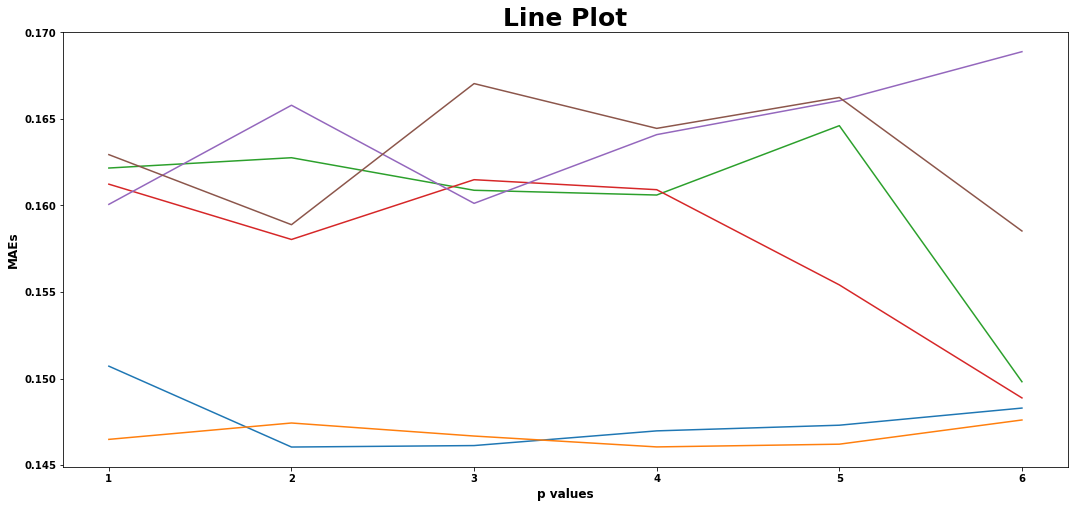

In [ ]:
# create a line plot of the p values

fig, ax = plt.subplots(figsize = (18, 8))
plt.plot(mae_grid_df)

plt.xlabel("p values", fontsize = 12, fontweight = 'bold')
plt.ylabel("MAEs", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("Line Plot", fontsize = 25, fontweight = 'bold')

plt.show()

In [ ]:
auto_model = pm.auto_arima(y_train, start_p = 7, start_q = 7,
                             test = 'adf', 
                             max_p = 8, max_q = 8,
                             start_P = 0,
                             max_d = 2,
                             seasonal = False,
                             d = None,
                             D = 1,
                             trace = True,
                             error_action = 'ignore',
                             suppress_warnings = True,
                             stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(7,1,7)(0,0,0)[0] intercept   : AIC=275.271, Time=3.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=557.655, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=507.398, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=373.731, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=555.659, Time=0.03 sec
 ARIMA(6,1,7)(0,0,0)[0] intercept   : AIC=280.280, Time=2.92 sec
 ARIMA(7,1,6)(0,0,0)[0] intercept   : AIC=275.109, Time=2.60 sec
 ARIMA(6,1,6)(0,0,0)[0] intercept   : AIC=279.880, Time=2.32 sec
 ARIMA(7,1,5)(0,0,0)[0] intercept   : AIC=278.915, Time=2.33 sec
 ARIMA(8,1,6)(0,0,0)[0] intercept   : AIC=281.082, Time=2.99 sec
 ARIMA(6,1,5)(0,0,0)[0] intercept   : AIC=281.969, Time=2.33 sec
 ARIMA(8,1,5)(0,0,0)[0] intercept   : AIC=280.986, Time=2.93 sec
 ARIMA(8,1,7)(0,0,0)[0] intercept   : AIC=279.448, Time=3.37 sec
 ARIMA(7,1,6)(0,0,0)[0]             : AIC=inf, Time=1.97 sec

Best model:  ARIMA(7,1,6)(0,0,0)[0] intercept
Tota

In [ ]:
auto_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (7, 1, 6),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [ ]:
best_params = auto_model.get_params()
best_model = ARIMA(y_train, order = best_params['order'], seasonal_order = best_params['seasonal_order'], trend = best_params['trend']).fit()

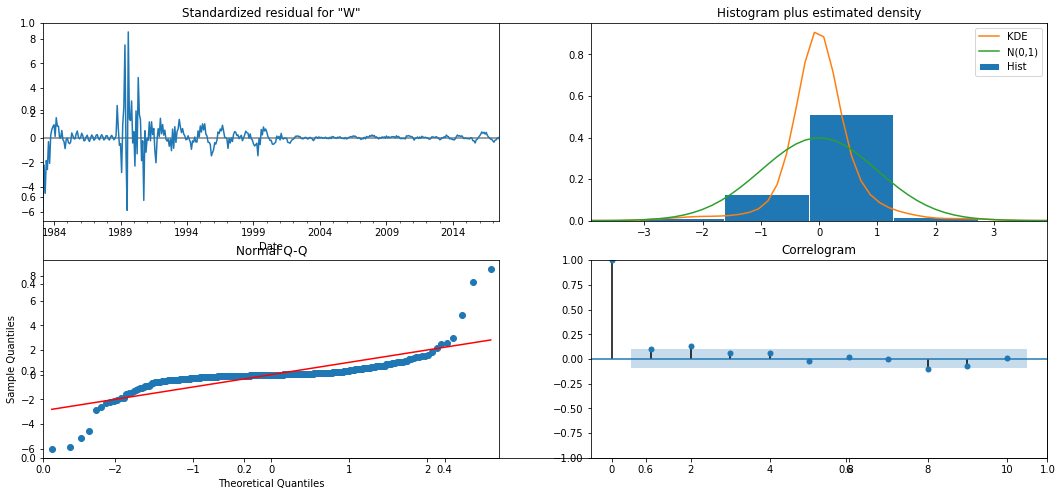

In [ ]:
fig, ax = plt.subplots(figsize = (18, 8))
best_model.plot_diagnostics(fig=fig)

plt.show()

In [ ]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Water   No. Observations:                  414
Model:                 ARIMA(7, 1, 6)   Log Likelihood                -120.157
Date:                Thu, 18 Aug 2022   AIC                            268.314
Time:                        08:01:17   BIC                            324.642
Sample:                    02-28-1983   HQIC                           290.592
                         - 07-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3989      0.112     -3.556      0.000      -0.619      -0.179
ar.L2         -0.5743      0.052    -11.118      0.000      -0.676      -0.473
ar.L3         -0.2759      0.134     -2.058      0.040      -0.539      -0.013
ar.L4          0.0921      0.070      1.323      0.186      -0.044       0.229
ar.L5          0.5170      0.097      5.327      0.000       0.327       0.707
ar.L6         -0.0171      0.046     -0.369      0.712      -0.108       0.074
ar.L7          0.2310      0.050      4.640      0.000       0.133       0.329
ma.L1         -0.4368      0.114     -3.835      0.000      -0.660      -0.214
ma.L2         -0.1397      0.118     -1.181      0.238      -0.371       0.092
ma.L3          0.2053      0.103      1.991      0.047       0.003       0.407
ma.L4         -0.4396      0.080     -5.509      0.000      -0.596      -0.283
ma.L5         -0.2664      0.094     -2.833      0.005      -0.451      -0.082
ma.L6          0.6767      0.083      8.186      0.000       0.515       0.839
sigma2         0.1044      0.004     23.328      0.000       0.096       0.113
===================================================================================
Ljung-Box (L1) (Q):                   4.38   Jarque-Bera (JB):             14821.22
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
y_pred = best_model.predict()

# Calculate training MAE
mae = mean_absolute_error(y_train, y_pred)

# Print mae
mae

0.16319112433544197

In [ ]:
arima_model = ARIMA(y_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)).fit()

# Generate in-sample (training) predictions
y_pred = arima_model.predict()

# Calculate training MAE
mae = mean_absolute_error(y_train, y_pred)

# Print mae
mae

0.13805419162300817

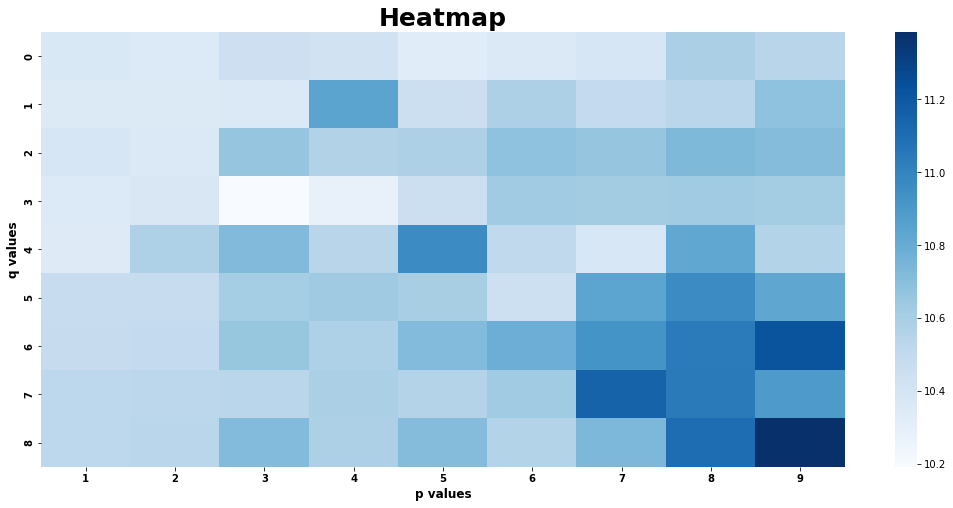

In [ ]:
#create a heatmap of the the p and q values

fig, ax = plt.subplots(figsize = (18, 8))
sns.heatmap(mae_df, cmap = "Blues")

plt.xlabel("p values", fontsize = 12, fontweight = 'bold')
plt.ylabel("q values", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("Heatmap", fontsize = 25, fontweight = 'bold')

plt.show()

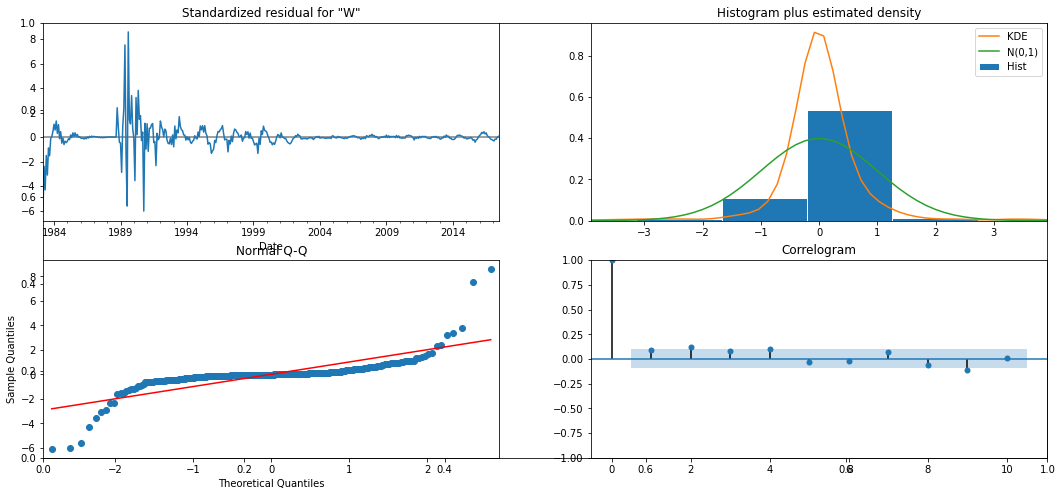

In [ ]:
# Train model
arima_model = ARIMA(y_train, order = (3, 1, 4)).fit() 

# create a diagnostic plot for best model

fig, ax = plt.subplots(figsize = (18, 8))
arima_model.plot_diagnostics(fig=fig)

plt.show()

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Water   No. Observations:                  414
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -131.988
Date:                Thu, 18 Aug 2022   AIC                            279.976
Time:                        08:01:22   BIC                            312.164
Sample:                    02-28-1983   HQIC                           292.707
                         - 07-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9140      0.065    -14.160      0.000      -1.041      -0.788
ar.L2          0.2024      0.053      3.831      0.000       0.099       0.306
ar.L3          0.2862      0.056      5.081      0.000       0.176       0.397
ma.L1          0.0839      0.067      1.251      0.211      -0.048       0.215
ma.L2         -1.3785      0.050    -27.359      0.000      -1.477      -1.280
ma.L3          0.0550      0.043      1.266      0.206      -0.030       0.140
ma.L4          0.7276      0.046     15.708      0.000       0.637       0.818
sigma2         0.1102      0.002     44.239      0.000       0.105       0.115
===================================================================================
Ljung-Box (L1) (Q):                   3.69   Jarque-Bera (JB):             15558.24
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
y_test.index.min(), y_test.index.max()

(Timestamp('2017-08-31 00:00:00', freq='M'),
 Timestamp('2021-06-30 00:00:00', freq='M'))

In [ ]:
y_pred = best_model.predict(y_train.index.min(),y_train.index.max()).dropna()

In [ ]:
df_pred_train = pd.DataFrame(
    {"y_train": y_train, "y_pred": y_pred}, index=y_train.index)

In [ ]:
df_pred_train.dropna(inplace=True)

In [ ]:
df_pred_train.head()

y_train    y_pred
Date                          
1983-02-28  8.305978  0.000000
1983-03-31  5.298317  8.305977
1983-04-30  5.298317  6.344786
1983-05-31  5.298317  7.033875
1983-06-30  5.298317  5.994824

In [ ]:
fig = px.line(df_pred_train, labels={"value": "Water"})
fig.show();

In [ ]:
# calculate test mean absolute error for model
y_pred_test = best_model.predict(y_test.index.min(), y_test.index.max())
test_mae = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", test_mae)

Test MAE: 0.10667034327583286


In [ ]:
# create datafrane for the true values of the test set and model's predictions
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_test}, index=y_test.index)

In [ ]:
df_pred_test.head(6)

y_test    y_pred
Date                          
2017-08-31  7.724651  7.674214
2017-09-30  7.711574  7.628229
2017-10-31  7.718657  7.661173
2017-11-30  7.689611  7.669115
2017-12-31  7.694911  7.636785
2018-01-31  7.688968  7.631738

In [ ]:
# create a time series plot for the values in test_predictions using plotly express
fig = px.line(df_pred_test, labels={"value": "Water"})
fig.show();

In [ ]:
# perform walk-forward validation for the model for the entire test set y_test
y_pred_wfv = pd.Series()
history = y_train.copy()

for i in range(len(y_test)):
    r = AutoReg(history, 21, old_names = False).fit()

    next_pred = r.forecast()

    # store the model's predictions in the Series y_pred_wfv
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

In [ ]:
y_train.shape, history.shape

((414,), (461,))

In [ ]:
y_pred_wfv.head()

2017-08-31    7.692885
2017-09-30    7.670814
2017-10-31    7.687806
2017-11-30    7.696350
2017-12-31    7.687519
Freq: M, dtype: float64

In [ ]:
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 0.03


In [ ]:
test1_predictions = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_wfv}, index = y_test.index)
fig = px.line(test1_predictions)
fig.show()

In [ ]:
x = pd.Series()

date = "2017-03-31"

forecat = 234
series = pd.Series([forecat], index = [date])
x = x.append(series)
x

2017-03-31    234
dtype: int64

## Supervised Models

In [ ]:
data_6 = data_5.drop(['Gas', 'Date', 'Month', 'Year'], axis = 1)

In [ ]:
data_6.head()

Water
0      0
1      0
2      0
3      0
4      0

In [ ]:
def lag_features(data, column, no):
    for i in range(no):
        data['Lag' + str(i + 1)] = data[column].shift(i + 1)
    return data

In [ ]:
data_6 = lag_features(data_6, 'Water', 42)
data_6.head(3)

Water  Lag1  Lag2  Lag3  Lag4  Lag5  Lag6  Lag7  Lag8  Lag9  ...  Lag33  \
21      0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
22      0   0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
23      0   0.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   

    Lag34  Lag35  Lag36  Lag37  Lag38  Lag39  Lag40  Lag41  Lag42  
21    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
22    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
23    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[3 rows x 43 columns]

In [ ]:
data_6.dropna(inplace = True)

In [ ]:
y = data_6['Water']
X = data_6.drop('Water', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1551753, 42)
y_train shape: (1551753,)
X_test shape: (387939, 42)
y_test shape: (387939,)


In [ ]:
xgb_model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
xgb_model.fit(X_train, y_train)

[09:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
test_pred = xgb_model.predict(X_test)
error = mean_absolute_error(y_test, test_pred)
print(error)

1248.2190223898713


In [ ]:
print(xgb_model.score(X_test,y_test))

0.045808711897207255


# Daily Time Series Analysis

## Gas Time Series Analysis

In [ ]:
data_5.head()

In [ ]:
Gas_data = data_5[['Date', 'Gas']]
Gas_data.head()

In [ ]:
day_data = Gas_data.groupby(pd.Grouper(key = 'Date', axis = 0, freq = '1D', sort = True)).mean().bfill(axis = 'rows')
day_data.head(5)

In [ ]:
day_data_1 = day_data.reset_index()
day_data_1['Year'] = day_data_1['Date'].dt.year
day_data_1['Month'] = day_data_1['Date'].dt.month

In [ ]:
day_data_1.head()

In [ ]:
day_data_2 = day_data_1.set_index('Date')

In [ ]:
# plot the GAS column

fig, ax = plt.subplots(figsize = (18,8))
plt.plot(day_data_2['Gas'], label = 'Production')

plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold', rotation = 'vertical')
plt.ylabel('Amount of Gas', fontsize = 15, fontweight = 'bold')
plt.xlabel('Date', fontsize = 15, fontweight = 'bold')
plt.title("Gas Produced from 1979 - 2020", fontsize = 20, fontweight = 'bold')
plt.show()

In [ ]:
# plot the rolling average of Gas using a window size of the no of months in a year

rolling_mean_gas = day_data_2['Gas'].rolling(12).mean()

fig, ax = plt.subplots(figsize = (18,8))
ax.plot(rolling_mean_gas, color = "red", label = "Rolling Mean #Gas")
plt.yticks(fontweight = 'bold')
plt.xticks(rotation = 'vertical', fontweight = 'bold')
plt.ylabel('Amount of Gas', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.title("Gas Time Series Rolling Mean", fontsize = 25, fontweight = 'bold')

plt.legend(loc = "best")
plt.show()

In [ ]:
def viz_years(mask, title, ax,df_to_use):
    sns.lineplot(x = df_to_use[mask].index,y = df_to_use[mask], label = 'Production',ax=ax, color = 'blue')

    ax.set_ylabel('Amount of Gas', fontsize = 15, fontweight = 'bold')
    ax.set_xlabel('Date', fontsize = 15, fontweight = 'bold')
    ax.set_title(("{}").format(title), fontsize = 20, fontweight = 'bold')

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (17, 10))
years = {1:[1990,ax[0,0]], 2:[2006,ax[0,1]], 3:[2012,ax[1,0]], 4:[2020,ax[1,1]]}

for i in years.keys():
  mask = (day_data_2["Year"] == years[i][0])
  viz_years(mask,('Gas Produced In {}').format(years[i][0]), years[i][1],day_data_2['Gas'])
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (18, 12))
years = {1:[2006,2009,ax[0,0]], 2:[2010,2013,ax[0,1]], 3:[2014,2017,ax[1,0]], 4:[2018,2021,ax[1,1]]}
for i in years.keys():
  mask = (day_data_2["Year"] >= years[i][0]) & (day_data_2["Year"] <= years[i][1])
  viz_years(mask,('Gas Produced Between {} to {}').format(years[i][0],years[i][1]),years[i][2],day_data_2['Gas'])
plt.tight_layout()

**Test for Autocorrelation:** Measure of how correlated time series data is at a given point in time with past values

In [ ]:
autocorrelation_lag1 = day_data_2["Gas"].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

In [ ]:
autocorrelation_lag6 = day_data_2["Gas"].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag12 = day_data_2["Gas"].autocorr(lag=12)
print("Twelve Month Lag: ", autocorrelation_lag12)

autocorrelation_lag36 = day_data_2["Gas"].autocorr(lag=36)
print("Thirty Six Month Lag: ", autocorrelation_lag36)

In [ ]:
# create an ACF plot of the Gas column to choose lag plots

fig, ax = plt.subplots(figsize = (18,8))
plot_acf(day_data_2["Gas"], ax = ax, lags = 100)

plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold', rotation = 'vertical')
plt.ylabel('Correlation Coefficient', fontsize = 15, fontweight = 'bold')
plt.xlabel('Lag [hours]', fontsize = 15, fontweight = 'bold')
plt.title("Autocorrelation Plot", fontsize = 20, fontweight = 'bold')

plt.show()

In [ ]:
# create a PACF plot of the Gas column to choose lag plots

fig, ax = plt.subplots(figsize = (18,8))
plot_pacf(day_data_2["Gas"], ax = ax, lags = 50)

plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold', rotation = 'vertical')
plt.ylabel('Correlation Coefficient', fontsize = 15, fontweight = 'bold')
plt.xlabel('Lag [hours]', fontsize = 15, fontweight = 'bold')
plt.title("Partial Autocorrelation Plot", fontsize = 20, fontweight = 'bold')

plt.show()

In [ ]:
# Seasonal decompose
decompose = seasonal_decompose(day_data_2["Gas"], model='multiplicative', period=12)

decompose.plot()

plt.show()

In [ ]:
# plot histogram and density plot of Gas Series

fig, ax = plt.subplots(figsize = (18, 8))
sns.distplot(day_data_2["Gas"])

plt.xlabel("Gas", fontsize = 12, fontweight = 'bold')
plt.ylabel("Count", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("Histogram and Density plot of Gas", fontsize = 25, fontweight = 'bold')

plt.show()

In [ ]:
# ADF Test

result = adfuller(day_data_2["Gas"], autolag = 'AIC')
print(f'ADF Statistics: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p_value: {result[1]}')

for key, value in result[4].items():
  print('Critical Values:')
  print(f'   {key}, {value}')

In [ ]:
# Box Cox Transform of Gas Series
# set the lambda parameter to None (default) and let the function find a statistically tuned value

boxcox_transform_gas, lam = boxcox(day_data_2["Gas"])
print('Lambda: %f' % lam)

# line plot of gas
plt.plot(boxcox_transform_gas)
plt.show()

# histogram and density plot of gas
sns.distplot(boxcox_transform_gas)
plt.show()

In [ ]:
# ADF Test

result = adfuller(boxcox_transform_gas, autolag = 'AIC')
print(f'ADF Statistics: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p_value: {result[1]}')

for key, value in result[4].items():
  print('Critical Values:')
  print(f'   {key}, {value}')

In [ ]:
# create an ACF plot of the square root transformed Gas series

fig, ax = plt.subplots(figsize = (18, 8))
plot_acf(boxcox_transform_gas, ax = ax, lags =50);

plt.xlabel("Lag [Month]", fontsize = 12, fontweight = 'bold')
plt.ylabel("Correlation Coefficient", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("ACF Plot", fontsize = 25, fontweight = 'bold')

plt.show()

In [ ]:
# create a PACF plot of the square root transformed Gas series

fig, ax = plt.subplots(figsize = (18, 8))
plot_pacf(boxcox_transform_gas, ax = ax, lags =50);

plt.xlabel("Lag [Month]", fontsize = 12, fontweight = 'bold')
plt.ylabel("Correlation Coefficient", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("PACF Plot", fontsize = 25, fontweight = 'bold')

plt.show()

## Gas Time Series Modelling

In [ ]:
day_data_3 = day_data_2.copy()
day_data_3["Gas"].head()

In [ ]:
# Square root transform Gas Series
transformed_gas, lam = boxcox(day_data_2["Gas"])

# Create Series y for modelling
y = pd.Series(transformed_gas, index = day_data_3.index)

In [ ]:
print(lam)

In [ ]:
y.head()

In [ ]:
cutoff_test = int(len(y) * 0.85)

y_train = y.iloc[:cutoff_test]
y_test = y.iloc[cutoff_test:]

In [ ]:
y_train.shape, y_test.shape

In [ ]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Gas:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

### AR Model

In [ ]:
# Create dictionary to store MAEs
dict_mae = dict()

# Create a range for possible p values
p_params = [p for p in range(1, 50)]

# Iterate through possible values for `p`
for p in p_params:

  # Create key-value pair in dict
  dict_mae[p] = list()

  # Note start time
  start_time = time.time()
  
  # Train model
  model = AutoReg(y_train, lags = p, old_names = False).fit()

  # Calculate model training time
  elapsed_time = round(time.time() - start_time, 2)
  print(f"Trained AR {p} in {elapsed_time} seconds.")

  # Generate in-sample (training) predictions
  y_pred = model.predict().dropna()

  # Calculate training MAE
  training_mae = mean_absolute_error(y_train[p:], y_pred)
  
  # Append MAE to list in dictionary
  dict_mae[p].append(training_mae)

print()
print(dict_mae)

In [ ]:
ar_mae_df = pd.DataFrame(dict_mae).T
ar_mae_df.round(4)
ar_mae_df.tail(6)

In [ ]:
# create a line plot of the p values

fig, ax = plt.subplots(figsize = (18, 8))
plt.plot(ar_mae_df)

plt.xlabel("p values", fontsize = 12, fontweight = 'bold')
plt.ylabel("MAEs", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.title("Line Plot", fontsize = 25, fontweight = 'bold')

plt.show()

In [ ]:
# Train model
ar_model = model = AutoReg(y_train, lags = 48, old_names = False).fit()

# create a diagnostic plot for best model

fig, ax = plt.subplots(figsize = (18, 8))
ar_model.plot_diagnostics(fig=fig)

plt.show()

In [ ]:
ar_model.summary()

In [ ]:
# store in-sample predictions in y_pred
y_pred = ar_model.predict(y_train.index.min(),y_train.index.max()).dropna()

In [ ]:
# create datafrane for the true values of the test set and model's predictions
df_pred_train = pd.DataFrame(
    {"y_train": y_train, "y_pred": y_pred}, index=y_train.index)

df_pred_train.dropna(inplace=True)

In [ ]:
df_pred_train.head()

In [ ]:
fig = px.line(df_pred_train, labels={"value": "Gas"})
fig.show();

In [ ]:
# calculate test mean absolute error for model
y_pred_test = ar_model.predict(y_test.index.min(), y_test.index.max())
test_mae = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", test_mae)

In [ ]:
# create datafrane for the true values of the test set and model's predictions
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_test}, index=y_test.index)

In [ ]:
df_pred_test.head(6)

In [ ]:
# create a time series plot for the values in test_predictions using plotly express
fig = px.line(df_pred_test, labels={"value": "Gas"})
fig.show();